## Library

In [224]:
import numpy as np
import pandas as pd
import zipfile
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
from scipy.stats import trim_mean

warnings.filterwarnings(action="ignore")

DATA_PATH = "/kaggle/input/coupon-purchase-prediction/"

## EDA
* coupon_detail_train/test.csv 쿠폰 구매 정보  
  ITEM_COUNT: 쿠폰 개수  
  I_DATE: 구매일자  
  SMALL_AREA_NAME: 지역 정보  
  PURCHASEID_hash: 구매 해시값(PK)  
  USER_ID_hash: 유저 해시값  
  COUPON_ID_hash: 쿠폰 해시값  
    
* coupon_list_train/test.csv 모든 쿠폰 정보  
  CAPSULE_TEXT: 장르  
  GENRE_NAME: 장르  
  PRICE_RATE: 원가 대비 할인율  
  CATALOG_PRICE: 원가  
  DISCOUNT_PRICE: 할인되는 금액  
  DISPFROM: 게시 시작날짜  
  DISPEND: 게시 종료날짜  
  DISPPERIOD: 게시기간  
  VALIDFROM: 사용가능 시작날짜  
  VALIDEND: 사용가능 종료날짜  
  VALIDPERIOD: 사용가능 기간  
  USABLE_DATE_MON: 월요일 사용가능 여부  
  USABLE_DATE_TUE: 화요일 사용가능 여부  
  USABLE_DATE_WED: 수요일 사용가능 여부  
  USABLE_DATE_THU: 목요일 사용가능 여부  
  USABLE_DATE_FRI: 금요일 사용가능 여부  
  USABLE_DATE_SAT: 토요일 사용가능 여부  
  USABLE_DATE_SUN: 일요일 사용가능 여부  
  USABLE_DATE_HOLIDAY: 공휴일 사용가능 여부  
  USABLE_DATE_BEFORE_HOLIDAY: 공휴일 외 사용가능 여부  
  large_area_name: 사용가능 지역  
  ken_name  
  small_area_name  
  COUPON_ID_hash: 쿠폰 해시값(PK)  
    
* user_list.csv 회원 정보  
  REG_DATE: 등록일자  
  SEX_ID: 성별  
  AGE: 나이  
  WITHDRAW_DATE: 탈퇴일자  
  PREF_NAME: 선호지역  
  USER_ID_hash: 유저 해시값(PK)  
    
* coupon_visit_train/test.csv 사용자의 웹사이트 방문, 구매 기록  
  PURCHASE_FLG: 구매여부  
  I_DATE: 방문일시  
  PAGE_SERIAL: 방문 페이지 번호  
  REFERRER_hash: 방문 참조값 해시값 (방문전 링크값인거 같은데 활용 어떻게 할지 잘 모르겠음)  
  VIEW_COUPON_ID_hash: 확인한 쿠폰값 해시값  
  USER_ID_hash: 유저 해시값  
  SESSION_ID_hash: 세션 해시값  
  PURCHASEID_hash: 구매 해시값  

### data overview

In [2]:
with zipfile.ZipFile(DATA_PATH + "coupon_detail_train.csv.zip", 'r') as zip_ref:
    # 압축 안의 파일 목록 확인
    file_list = zip_ref.namelist()
    print("압축 안의 파일:", file_list)
    # 첫 번째 CSV 파일을 DataFrame으로 읽기
    with zip_ref.open(file_list[0]) as file:
        df_detail = pd.read_csv(file)

# 결과 확인
df_detail.info()

압축 안의 파일: ['coupon_detail_train.csv']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168996 entries, 0 to 168995
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ITEM_COUNT       168996 non-null  int64 
 1   I_DATE           168996 non-null  object
 2   SMALL_AREA_NAME  168996 non-null  object
 3   PURCHASEID_hash  168996 non-null  object
 4   USER_ID_hash     168996 non-null  object
 5   COUPON_ID_hash   168996 non-null  object
dtypes: int64(1), object(5)
memory usage: 7.7+ MB


In [3]:
df_detail.head(1).T

0
ITEM_COUNT                                      1
I_DATE                        2012-03-28 15:06:06
SMALL_AREA_NAME                                兵庫
PURCHASEID_hash  c820a8882374a4e472f0984a8825893f
USER_ID_hash     d9dca3cb44bab12ba313eaa681f663eb
COUPON_ID_hash   34c48f84026e08355dc3bd19b427f09a

In [4]:
df_detail.min()

ITEM_COUNT                                        1
I_DATE                          2011-07-01 00:10:42
SMALL_AREA_NAME                                  キタ
PURCHASEID_hash    0000655d8c1e67679c3c1a8887a97d10
USER_ID_hash       0000b53e182165208887ba65c079fc21
COUPON_ID_hash     000eba9b783cec10658308b5836349f6
dtype: object

In [5]:
df_detail.max()

ITEM_COUNT                                       55
I_DATE                          2012-06-23 23:54:47
SMALL_AREA_NAME                                 鹿児島
PURCHASEID_hash    ffffc444664536443817d2578f0493a4
USER_ID_hash       ffff56dbf3c782c3532f88c6c79817ba
COUPON_ID_hash     fffa212f26e62e489ec16dbe55a88c57
dtype: object

In [6]:
with zipfile.ZipFile(DATA_PATH + "coupon_list_train.csv.zip", 'r') as zip_ref:
    # 압축 안의 파일 목록 확인
    file_list = zip_ref.namelist()
    print("압축 안의 파일:", file_list)
    # 첫 번째 CSV 파일을 DataFrame으로 읽기
    with zip_ref.open(file_list[0]) as file:
        df_list = pd.read_csv(file)

# 결과 확인
df_list.info()


압축 안의 파일: ['coupon_list_train.csv']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19413 entries, 0 to 19412
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CAPSULE_TEXT                19413 non-null  object 
 1   GENRE_NAME                  19413 non-null  object 
 2   PRICE_RATE                  19413 non-null  int64  
 3   CATALOG_PRICE               19413 non-null  int64  
 4   DISCOUNT_PRICE              19413 non-null  int64  
 5   DISPFROM                    19413 non-null  object 
 6   DISPEND                     19413 non-null  object 
 7   DISPPERIOD                  19413 non-null  int64  
 8   VALIDFROM                   13266 non-null  object 
 9   VALIDEND                    13266 non-null  object 
 10  VALIDPERIOD                 13266 non-null  float64
 11  USABLE_DATE_MON             12408 non-null  float64
 12  USABLE_DATE_TUE             12408 non-null  float64


In [7]:
df_list.head(1).T

0
CAPSULE_TEXT                                             グルメ
GENRE_NAME                                               グルメ
PRICE_RATE                                                50
CATALOG_PRICE                                           3000
DISCOUNT_PRICE                                          1500
DISPFROM                                 2011-07-08 12:00:00
DISPEND                                  2011-07-09 12:00:00
DISPPERIOD                                                 1
VALIDFROM                                         2011-07-10
VALIDEND                                          2011-12-08
VALIDPERIOD                                            151.0
USABLE_DATE_MON                                          1.0
USABLE_DATE_TUE                                          1.0
USABLE_DATE_WED                                          1.0
USABLE_DATE_THU                                          1.0
USABLE_DATE_FRI                                          0.0
USABLE_DATE_SAT                                          0.0
USABLE_DATE_SUN                                          1.0
USABLE_DATE_HOLIDAY                                      1.0
USABLE_DATE_BEFORE_HOLIDAY                               0.0
large_area_name                                           関東
ken_name                                                 埼玉県
small_area_name                                           埼玉
COUPON_ID_hash              6b263844241eea98c5a97f1335ea82af

In [8]:
with zipfile.ZipFile(DATA_PATH + "coupon_visit_train.csv.zip", 'r') as zip_ref:
    # 압축 안의 파일 목록 확인
    file_list = zip_ref.namelist()
    print("압축 안의 파일:", file_list)
    # 첫 번째 CSV 파일을 DataFrame으로 읽기
    with zip_ref.open(file_list[0]) as file:
        df_visit = pd.read_csv(file)

# 결과 확인
df_visit.info()

압축 안의 파일: ['coupon_visit_train.csv']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2833180 entries, 0 to 2833179
Data columns (total 8 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   PURCHASE_FLG         int64 
 1   I_DATE               object
 2   PAGE_SERIAL          int64 
 3   REFERRER_hash        object
 4   VIEW_COUPON_ID_hash  object
 5   USER_ID_hash         object
 6   SESSION_ID_hash      object
 7   PURCHASEID_hash      object
dtypes: int64(2), object(6)
memory usage: 172.9+ MB


In [9]:
df_visit.head(1).T

0
PURCHASE_FLG                                        0
I_DATE                            2012-03-28 14:15:00
PAGE_SERIAL                                         7
REFERRER_hash        7d3892e54acb559ae36c459978489330
VIEW_COUPON_ID_hash  34c48f84026e08355dc3bd19b427f09a
USER_ID_hash         d9dca3cb44bab12ba313eaa681f663eb
SESSION_ID_hash      673af822615593249e7c6a9a1a6bbb1a
PURCHASEID_hash                                   NaN

In [10]:
with zipfile.ZipFile(DATA_PATH + "user_list.csv.zip", 'r') as zip_ref:
    # 압축 안의 파일 목록 확인
    file_list = zip_ref.namelist()
    print("압축 안의 파일:", file_list)
    # 첫 번째 CSV 파일을 DataFrame으로 읽기
    with zip_ref.open(file_list[0]) as file:
        df_user = pd.read_csv(file)

# 결과 확인
df_user.info()

압축 안의 파일: ['user_list.csv']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22873 entries, 0 to 22872
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   REG_DATE       22873 non-null  object
 1   SEX_ID         22873 non-null  object
 2   AGE            22873 non-null  int64 
 3   WITHDRAW_DATE  922 non-null    object
 4   PREF_NAME      15617 non-null  object
 5   USER_ID_hash   22873 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.0+ MB


In [11]:
df_user.head(1).T

0
REG_DATE                    2012-03-28 14:14:18
SEX_ID                                        f
AGE                                          25
WITHDRAW_DATE                               NaN
PREF_NAME                                   NaN
USER_ID_hash   d9dca3cb44bab12ba313eaa681f663eb

### 결측치 확인

In [12]:
print(f"<구매정보>\n{df_detail.isnull().sum()}\n")
print(f"<전체쿠폰정보>\n{df_list.isnull().sum()}\n")
print(f"<유저방문정보>\n{df_visit.isnull().sum()}\n")
print(f"<고객정보>\n{df_user.isnull().sum()}\n")

<구매정보>
ITEM_COUNT         0
I_DATE             0
SMALL_AREA_NAME    0
PURCHASEID_hash    0
USER_ID_hash       0
COUPON_ID_hash     0
dtype: int64

<전체쿠폰정보>
CAPSULE_TEXT                     0
GENRE_NAME                       0
PRICE_RATE                       0
CATALOG_PRICE                    0
DISCOUNT_PRICE                   0
DISPFROM                         0
DISPEND                          0
DISPPERIOD                       0
VALIDFROM                     6147
VALIDEND                      6147
VALIDPERIOD                   6147
USABLE_DATE_MON               7005
USABLE_DATE_TUE               7005
USABLE_DATE_WED               7005
USABLE_DATE_THU               7005
USABLE_DATE_FRI               7005
USABLE_DATE_SAT               7005
USABLE_DATE_SUN               7005
USABLE_DATE_HOLIDAY           7005
USABLE_DATE_BEFORE_HOLIDAY    7005
large_area_name                  0
ken_name                         0
small_area_name                  0
COUPON_ID_hash                   0
dtyp

In [13]:
print(df_detail.shape)
print(df_list.shape)
print(df_visit.shape)
print(df_user.shape)

(168996, 6)
(19413, 24)
(2833180, 8)
(22873, 6)


## Preprocessing

In [14]:
# 날짜 정보들 datetime으로 dtype 변경
df_detail['I_DATE'] = pd.to_datetime(df_detail['I_DATE'].astype(str))
df_detail['I_MONTH'] = df_detail['I_DATE'].dt.to_period('M')
df_user['REG_DATE'] = pd.to_datetime(df_user['REG_DATE'])

In [15]:
print(df_detail['I_DATE'].dtype)
print(df_detail['I_MONTH'].dtype)
print(df_user['REG_DATE'].dtype)

datetime64[ns]
period[M]
datetime64[ns]


In [16]:
df_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168996 entries, 0 to 168995
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ITEM_COUNT       168996 non-null  int64         
 1   I_DATE           168996 non-null  datetime64[ns]
 2   SMALL_AREA_NAME  168996 non-null  object        
 3   PURCHASEID_hash  168996 non-null  object        
 4   USER_ID_hash     168996 non-null  object        
 5   COUPON_ID_hash   168996 non-null  object        
 6   I_MONTH          168996 non-null  period[M]     
dtypes: datetime64[ns](1), int64(1), object(4), period[M](1)
memory usage: 9.0+ MB


In [17]:
df_list['PURCHASE_PRICE'] = df_list['CATALOG_PRICE'] - df_list['DISCOUNT_PRICE']

In [18]:
df_list.head(3)

CAPSULE_TEXT GENRE_NAME  PRICE_RATE  CATALOG_PRICE  DISCOUNT_PRICE  \
0          グルメ        グルメ          50           3000            1500   
1          グルメ        グルメ          51           2080            1000   
2          グルメ        グルメ          50           7000            3500   

              DISPFROM              DISPEND  DISPPERIOD   VALIDFROM  \
0  2011-07-08 12:00:00  2011-07-09 12:00:00           1  2011-07-10   
1  2011-07-01 12:00:00  2011-07-02 12:00:00           1  2011-07-03   
2  2011-07-12 12:00:00  2011-07-15 12:00:00           3  2011-07-16   

     VALIDEND  ...  USABLE_DATE_FRI  USABLE_DATE_SAT  USABLE_DATE_SUN  \
0  2011-12-08  ...              0.0              0.0              1.0   
1  2011-12-04  ...              1.0              1.0              1.0   
2  2012-01-11  ...              1.0              1.0              1.0   

   USABLE_DATE_HOLIDAY  USABLE_DATE_BEFORE_HOLIDAY  large_area_name  ken_name  \
0                  1.0                         0.0               関東       埼玉県   
1                  1.0                         1.0               関東       千葉県   
2                  1.0                         1.0               関東       千葉県   

   small_area_name                    COUPON_ID_hash  PURCHASE_PRICE  
0               埼玉  6b263844241eea98c5a97f1335ea82af            1500  
1               千葉  cc031f250e8bad1e24060263b9fc0ddd            1080  
2               千葉  ba5e9b7453ca52ff711635a5d2e8102d            3500  

[3 rows x 25 columns]

### Merging: df_detail(구매기록) + df_list(쿠폰정보)

In [19]:
df_detail.head(3)

ITEM_COUNT              I_DATE SMALL_AREA_NAME  \
0           1 2012-03-28 15:06:06              兵庫   
1           1 2011-07-04 23:52:54     銀座・新橋・東京・上野   
2           1 2011-07-16 00:52:49       恵比寿・目黒・品川   

                    PURCHASEID_hash                      USER_ID_hash  \
0  c820a8882374a4e472f0984a8825893f  d9dca3cb44bab12ba313eaa681f663eb   
1  1b4eb2435421ede98c8931c42e8220ec  560574a339f1b25e57b0221e486907ed   
2  36b5f9ba46c44b65587d0b16f2e4c77f  560574a339f1b25e57b0221e486907ed   

                     COUPON_ID_hash  I_MONTH  
0  34c48f84026e08355dc3bd19b427f09a  2012-03  
1  767673b7a777854a92b73b0934ddfae7  2011-07  
2  4f3b5b91d9831192557c056022fdc1f2  2011-07

In [20]:
df_list.head(3)

CAPSULE_TEXT GENRE_NAME  PRICE_RATE  CATALOG_PRICE  DISCOUNT_PRICE  \
0          グルメ        グルメ          50           3000            1500   
1          グルメ        グルメ          51           2080            1000   
2          グルメ        グルメ          50           7000            3500   

              DISPFROM              DISPEND  DISPPERIOD   VALIDFROM  \
0  2011-07-08 12:00:00  2011-07-09 12:00:00           1  2011-07-10   
1  2011-07-01 12:00:00  2011-07-02 12:00:00           1  2011-07-03   
2  2011-07-12 12:00:00  2011-07-15 12:00:00           3  2011-07-16   

     VALIDEND  ...  USABLE_DATE_FRI  USABLE_DATE_SAT  USABLE_DATE_SUN  \
0  2011-12-08  ...              0.0              0.0              1.0   
1  2011-12-04  ...              1.0              1.0              1.0   
2  2012-01-11  ...              1.0              1.0              1.0   

   USABLE_DATE_HOLIDAY  USABLE_DATE_BEFORE_HOLIDAY  large_area_name  ken_name  \
0                  1.0                         0.0               関東       埼玉県   
1                  1.0                         1.0               関東       千葉県   
2                  1.0                         1.0               関東       千葉県   

   small_area_name                    COUPON_ID_hash  PURCHASE_PRICE  
0               埼玉  6b263844241eea98c5a97f1335ea82af            1500  
1               千葉  cc031f250e8bad1e24060263b9fc0ddd            1080  
2               千葉  ba5e9b7453ca52ff711635a5d2e8102d            3500  

[3 rows x 25 columns]

In [21]:
# PK확인
df_list.shape[0], len(df_list['COUPON_ID_hash'].unique())

(19413, 19413)

In [22]:
# PK확인
df_detail.shape[0], len(df_detail['PURCHASEID_hash'].unique())

(168996, 168996)

In [23]:
df = pd.merge(
    df_detail[['ITEM_COUNT','I_DATE','I_MONTH','SMALL_AREA_NAME','USER_ID_hash','COUPON_ID_hash', 'PURCHASEID_hash']],
    df_list[['GENRE_NAME','PRICE_RATE','PURCHASE_PRICE','COUPON_ID_hash']],
    on='COUPON_ID_hash',
    how='left'
)

In [24]:
df.head()

ITEM_COUNT              I_DATE  I_MONTH SMALL_AREA_NAME  \
0           1 2012-03-28 15:06:06  2012-03              兵庫   
1           1 2011-07-04 23:52:54  2011-07     銀座・新橋・東京・上野   
2           1 2011-07-16 00:52:49  2011-07       恵比寿・目黒・品川   
3           1 2011-07-16 00:54:53  2011-07       恵比寿・目黒・品川   
4           1 2011-07-16 00:55:52  2011-07       恵比寿・目黒・品川   

                       USER_ID_hash                    COUPON_ID_hash  \
0  d9dca3cb44bab12ba313eaa681f663eb  34c48f84026e08355dc3bd19b427f09a   
1  560574a339f1b25e57b0221e486907ed  767673b7a777854a92b73b0934ddfae7   
2  560574a339f1b25e57b0221e486907ed  4f3b5b91d9831192557c056022fdc1f2   
3  560574a339f1b25e57b0221e486907ed  4f3b5b91d9831192557c056022fdc1f2   
4  560574a339f1b25e57b0221e486907ed  4f3b5b91d9831192557c056022fdc1f2   

                    PURCHASEID_hash GENRE_NAME  PRICE_RATE  PURCHASE_PRICE  
0  c820a8882374a4e472f0984a8825893f         宅配          78            5625  
1  1b4eb2435421ede98c8931c42e8220ec         宅配          50            1680  
2  36b5f9ba46c44b65587d0b16f2e4c77f        グルメ          50             160  
3  2f30f46937cc9004774e576914b2aa1a        グルメ          50             160  
4  4d000c64a55ac573d0ae1a8f03677f50        グルメ          50             160

In [25]:
df.shape

(168996, 10)

In [26]:
df_detail['ITEM_COUNT'].max()

55

In [27]:
# PK확인
df_user.shape[0], len(df_user['USER_ID_hash'].unique())

(22873, 22873)

In [28]:
df = pd.merge(
    df,
    df_user[['SEX_ID','AGE','USER_ID_hash']],
    on='USER_ID_hash',
    how='left'
)

In [29]:
df.head().T

0  \
ITEM_COUNT                                      1   
I_DATE                        2012-03-28 15:06:06   
I_MONTH                                   2012-03   
SMALL_AREA_NAME                                兵庫   
USER_ID_hash     d9dca3cb44bab12ba313eaa681f663eb   
COUPON_ID_hash   34c48f84026e08355dc3bd19b427f09a   
PURCHASEID_hash  c820a8882374a4e472f0984a8825893f   
GENRE_NAME                                     宅配   
PRICE_RATE                                     78   
PURCHASE_PRICE                               5625   
SEX_ID                                          f   
AGE                                            25   

                                                1  \
ITEM_COUNT                                      1   
I_DATE                        2011-07-04 23:52:54   
I_MONTH                                   2011-07   
SMALL_AREA_NAME                       銀座・新橋・東京・上野   
USER_ID_hash     560574a339f1b25e57b0221e486907ed   
COUPON_ID_hash   767673b7a777854a92b73b0934ddfae7   
PURCHASEID_hash  1b4eb2435421ede98c8931c42e8220ec   
GENRE_NAME                                     宅配   
PRICE_RATE                                     50   
PURCHASE_PRICE                               1680   
SEX_ID                                          f   
AGE                                            34   

                                                2  \
ITEM_COUNT                                      1   
I_DATE                        2011-07-16 00:52:49   
I_MONTH                                   2011-07   
SMALL_AREA_NAME                         恵比寿・目黒・品川   
USER_ID_hash     560574a339f1b25e57b0221e486907ed   
COUPON_ID_hash   4f3b5b91d9831192557c056022fdc1f2   
PURCHASEID_hash  36b5f9ba46c44b65587d0b16f2e4c77f   
GENRE_NAME                                    グルメ   
PRICE_RATE                                     50   
PURCHASE_PRICE                                160   
SEX_ID                                          f   
AGE                                            34   

                                                3  \
ITEM_COUNT                                      1   
I_DATE                        2011-07-16 00:54:53   
I_MONTH                                   2011-07   
SMALL_AREA_NAME                         恵比寿・目黒・品川   
USER_ID_hash     560574a339f1b25e57b0221e486907ed   
COUPON_ID_hash   4f3b5b91d9831192557c056022fdc1f2   
PURCHASEID_hash  2f30f46937cc9004774e576914b2aa1a   
GENRE_NAME                                    グルメ   
PRICE_RATE                                     50   
PURCHASE_PRICE                                160   
SEX_ID                                          f   
AGE                                            34   

                                                4  
ITEM_COUNT                                      1  
I_DATE                        2011-07-16 00:55:52  
I_MONTH                                   2011-07  
SMALL_AREA_NAME                         恵比寿・目黒・品川  
USER_ID_hash     560574a339f1b25e57b0221e486907ed  
COUPON_ID_hash   4f3b5b91d9831192557c056022fdc1f2  
PURCHASEID_hash  4d000c64a55ac573d0ae1a8f03677f50  
GENRE_NAME                                    グルメ  
PRICE_RATE                                     50  
PURCHASE_PRICE                                160  
SEX_ID                                          f  
AGE                                            34

In [30]:
df.shape

(168996, 12)

In [31]:
df.isnull().sum()

ITEM_COUNT         0
I_DATE             0
I_MONTH            0
SMALL_AREA_NAME    0
USER_ID_hash       0
COUPON_ID_hash     0
PURCHASEID_hash    0
GENRE_NAME         0
PRICE_RATE         0
PURCHASE_PRICE     0
SEX_ID             0
AGE                0
dtype: int64

In [32]:
df['I_DATE'].dtype

dtype('<M8[ns]')

## RFM
구간분할 방식  
1. Quantile (33%, 66%)	상·중·하 분위로 3등분	균형적인 그룹 분할  
2. Natural break (분포기반)	실제 데이터 변곡점 기반 (예: 1회, 2~4회, 5회 이상)	해석력 높음  
3. Business rule	비즈니스적으로 의미 있는 기준	해석 명확

In [33]:
last = df['I_DATE'].max() + pd.DateOffset(days=1) # 마지막 거래일자 다음날을 기준일로 설정

rfm_df = df.groupby(['USER_ID_hash']).agg({
    'I_DATE': lambda x:(last-pd.to_datetime(x.max())).days,
    'PURCHASEID_hash': lambda x:x.nunique(),
    'PURCHASE_PRICE': sum
})
rfm_df.rename(columns={'거래날짜':'Recency', '거래':'Frequency', '지불금액':'Monetary'},inplace=True)

rfm_df.head(3)

I_DATE  PURCHASEID_hash  PURCHASE_PRICE
USER_ID_hash                                                             
0000b53e182165208887ba65c079fc21     275                1            4920
00035b86e6884589ec8d28fbf2fe7757      87                1            1620
0005b1068d5f2b8f2a7c978fcfe1ca06     311                2           53660

In [34]:
last = df['I_DATE'].max() + pd.DateOffset(days=1) # 마지막 거래일자 다음날을 기준일로 설정

rfm_df = df.groupby(['USER_ID_hash']).agg({
    'I_DATE': lambda x:(last-pd.to_datetime(x.max())).days,
    'PURCHASEID_hash': lambda x:x.nunique(),
    'PURCHASE_PRICE': sum
})
rfm_df.rename(columns={'I_DATE':'Recency', 'PURCHASEID_hash':'Frequency', 'PURCHASE_PRICE':'Monetary'},inplace=True)

rfm_df.head(3)

Recency  Frequency  Monetary
USER_ID_hash                                                  
0000b53e182165208887ba65c079fc21      275          1      4920
00035b86e6884589ec8d28fbf2fe7757       87          1      1620
0005b1068d5f2b8f2a7c978fcfe1ca06      311          2     53660

In [35]:
rfm_df.shape

(22782, 3)

### RFM 검증: Scatter plot
* 데이터 많을때는 찍지 말것
* RFM 분석을 하기 전에 실제 데이터가 그 가정을 따르는지를 확인용 (분석 전 진단용 시각화)
* 고객 행동이 전형적인 RFM 패턴을 따름 (R낮을수록 F,M이 높음)
* 고객 행동이 예측 가능한 구조이므로 RFM segmentation의 설명력이 올라감

In [ ]:
# 건수 많을 때는 전체 데이터셋으로 scatterplot 그리는 것 지양

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(data=rfm_df, x='Recency', y='Frequency')
plt.title('Recency vs Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.scatterplot(data=rfm_df, x='Recency', y='Monetary')
plt.title('Recency vs Monetary')
plt.xlabel('Recency')
plt.ylabel('Monetary')

plt.subplot(1, 3, 3)
sns.scatterplot(data=rfm_df, x='Frequency', y='Monetary')
plt.title('Frequency vs Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary')

plt.tight_layout()
plt.show()

## RFM 분석결과

### Recency
* 0\~25일: 대다수의 고객 집중
* 25\~100일: 완만한 감소
* 100일\~: 거의 변화없음

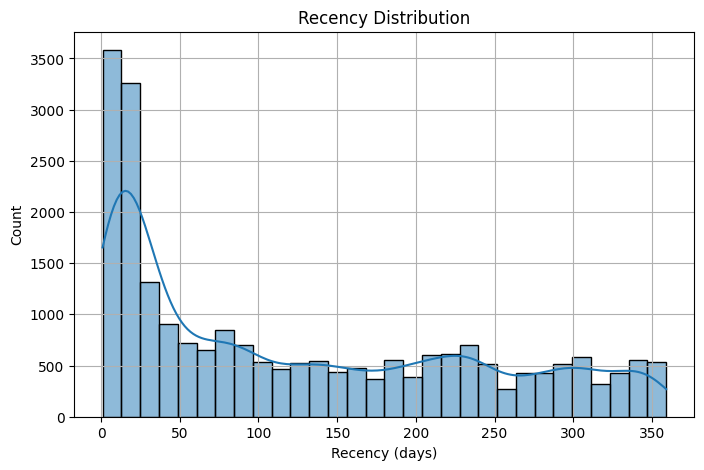

In [37]:
plt.figure(figsize=(8, 5))
sns.histplot(data=rfm_df, x='Recency', bins=30, kde=True)
plt.title('Recency Distribution')
plt.xlabel('Recency (days)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Log-scaled Recency Distribution')

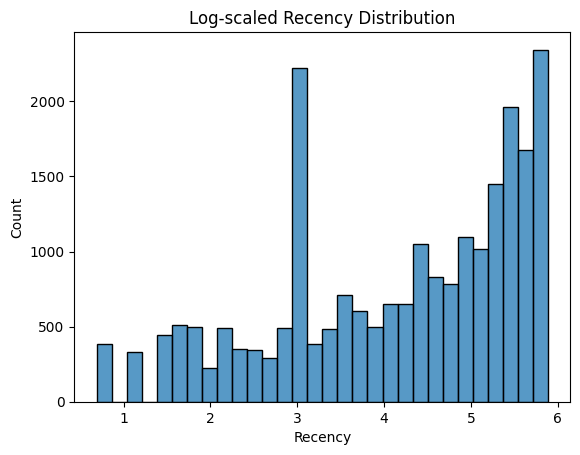

In [38]:
sns.histplot(np.log1p(rfm_df['Recency']), bins=30)
plt.title("Log-scaled Recency Distribution")

### Frequency
* 0\~5일: 대다수의 고객 집중
* 5\~40일: 완만한 감소
* 40일\~: 거의 변화없음

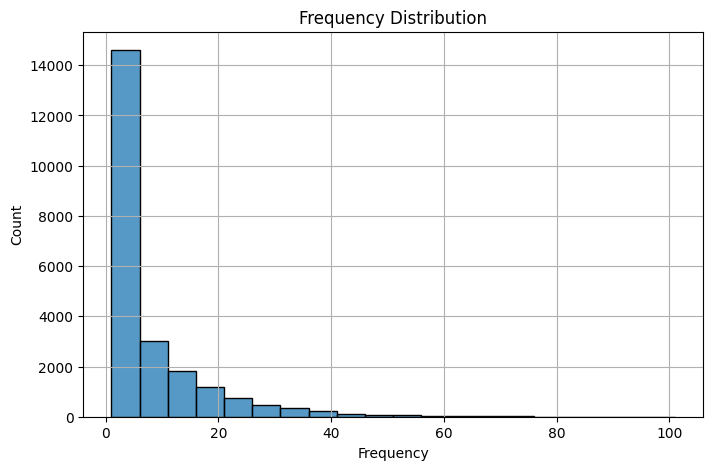

In [39]:
plt.figure(figsize=(8, 5))
sns.histplot(data=rfm_df, x='Frequency', bins=20, kde=False)
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.grid(True)
plt.show()

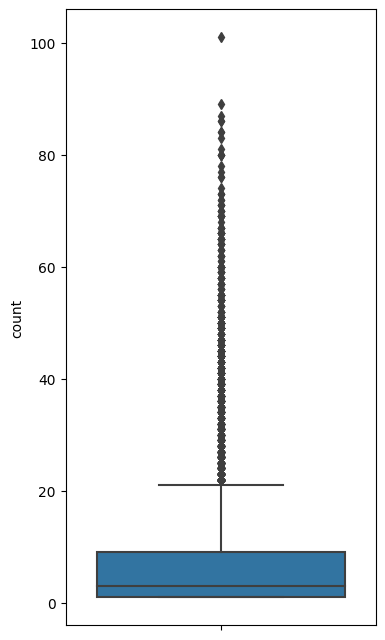

In [40]:
plt.figure(figsize=(4,8))
sns.boxplot(data=rfm_df, y='Frequency')
plt.ylabel('count')
plt.show()

### Monetary
* 0\~0.7 (0\~70,000): 대다수의 고객 집중
* 0.7\~3.3 (70,000\~330,000): 완만한 감소
* 3.3\~ (330,000\~): 거의 변화없음

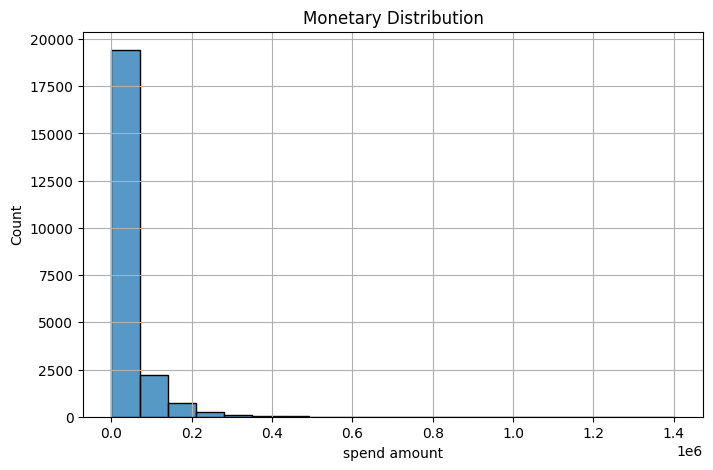

In [41]:
plt.figure(figsize=(8, 5))
sns.histplot(data=rfm_df, x='Monetary', bins=20, kde=False)
plt.title('Monetary Distribution')
plt.xlabel('spend amount')
plt.ylabel('Count')
plt.grid(True)
plt.show()

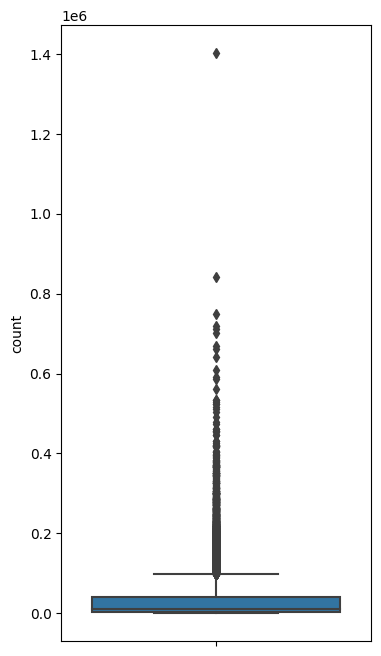

In [42]:
plt.figure(figsize=(4,8))
sns.boxplot(data=rfm_df, y='Monetary')
plt.ylabel('count')
plt.show()

## RFM 점수계산

### recency grading

In [43]:
'''
def assign_R(recency):
    if recency <= 30:
        return 5
    elif recency <= 60:
        return 4
    elif recency <= 90:
        return 3
    elif recency <= 180:
        return 2
    elif recency <= 365:
        return 1
    else:
        return 0
'''
# 일반적인 비즈니스 분할방식 30,60,90,180,365

'\ndef assign_R(recency):\n    if recency <= 30:\n        return 5\n    elif recency <= 60:\n        return 4\n    elif recency <= 90:\n        return 3\n    elif recency <= 180:\n        return 2\n    elif recency <= 365:\n        return 1\n    else:\n        return 0\n'

In [44]:
def assign_R(recency):
    if recency <= 25:
        return 3
    elif recency <= 100:
        return 2
    else:
        return 1

# rfm_df['R'] = assign_R(rfm['Recency'])는 틀림. 함수에 Recency값 전체를 넣기 때문
rfm_df['R'] = rfm_df['Recency'].apply(assign_R)

In [45]:
rfm_df.head()

Recency  Frequency  Monetary  R
USER_ID_hash                                                     
0000b53e182165208887ba65c079fc21      275          1      4920  1
00035b86e6884589ec8d28fbf2fe7757       87          1      1620  2
0005b1068d5f2b8f2a7c978fcfe1ca06      311          2     53660  1
000cc06982785a19e2a2fdb40b1c9d59       31         21     54606  2
0013518e41c416cd6a181d277dd8ca0b       59          4     33095  2

In [46]:
rfm_df.groupby('R').count()

Recency  Frequency  Monetary
R                              
1    10579      10579     10579
2     5236       5236      5236
3     6967       6967      6967

In [47]:
rfm_df.groupby('R').mean()

Recency  Frequency      Monetary
R                                     
1  229.055865   2.774648  11739.648738
2   59.063407   8.041253  37185.428380
3   11.974738  14.000144  62250.820726

### frequency grading

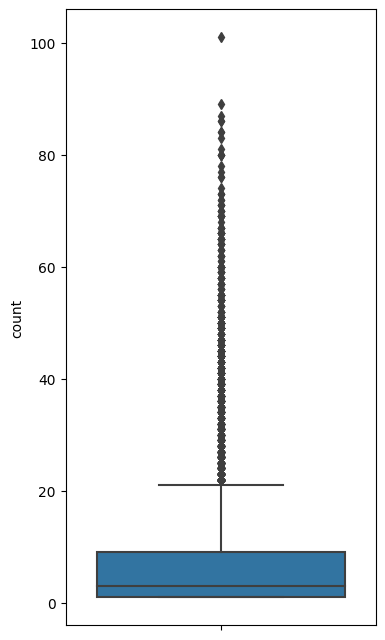

In [48]:
plt.figure(figsize=(4,8))
sns.boxplot(data=rfm_df, y='Frequency')
plt.ylabel('count')
plt.show()

In [49]:
rfm_df[rfm_df['Frequency'] >= 20].shape

(2322, 4)

In [50]:
rfm_df['Frequency'].min(), rfm_df['Frequency'].max(), rfm_df['Frequency'].mean().round(2), rfm_df['Frequency'].median()

(1, 101, 7.42, 3.0)

In [51]:
rfm_df['Frequency_adj'] = rfm_df['Frequency'].apply(lambda x: 21 if x>=21 else x)

In [52]:
# quantile binning(값이 비슷하게)
q_binned = pd.qcut(rfm_df['Frequency_adj'], q=3)
q_binned.value_counts().sort_index()

Frequency_adj
(0.999, 2.0]    9677
(2.0, 6.0]      5706
(6.0, 21.0]     7399
Name: count, dtype: int64

In [53]:
# quantile binning(값이 비슷하게)
u_binned = pd.cut(rfm_df['Frequency_adj'], bins=20)
u_binned.value_counts().sort_index()

Frequency_adj
(0.98, 2.0]     9677
(2.0, 3.0]      2257
(3.0, 4.0]      1576
(4.0, 5.0]      1092
(5.0, 6.0]       781
(6.0, 7.0]       703
(7.0, 8.0]       542
(8.0, 9.0]       543
(9.0, 10.0]      443
(10.0, 11.0]     412
(11.0, 12.0]     390
(12.0, 13.0]     353
(13.0, 14.0]     342
(14.0, 15.0]     339
(15.0, 16.0]     265
(16.0, 17.0]     293
(17.0, 18.0]     226
(18.0, 19.0]     226
(19.0, 20.0]     186
(20.0, 21.0]    2136
Name: count, dtype: int64

In [54]:
# rfm_df['F'] = pd.cut(rfm_df['Frequency_adj'], bins=5, labels=[1,2,3,4,5])

In [55]:
def assign_F(frequency):
    if frequency <= 5:
        return 1
    elif frequency <= 40:
        return 2
    else:
        return 3

rfm_df['F'] = rfm_df['Frequency'].apply(assign_F)

In [56]:
rfm_df['F'].value_counts()

F
1    14602
2     7802
3      378
Name: count, dtype: int64

### Monetary grading

In [57]:
def assign_M(Monetary):
    if Monetary <= 70000:
        return 1
    elif Monetary <= 330000:
        return 2
    else:
        return 3

rfm_df['M'] = rfm_df['Monetary'].apply(assign_M)

In [58]:
rfm_df['M'].value_counts()

M
1    19410
2     3274
3       98
Name: count, dtype: int64

### RFM score 생성

In [59]:
rfm_df['RFM_Score'] = rfm_df['R'] + rfm_df['F'] + rfm_df['M']

rfm_df.sample(5)

Recency  Frequency  Monetary  R  \
USER_ID_hash                                                        
d8b9a56a6c0caa829a213f126e0ca81d      340          1      1035  1   
1463cd4ba4b5fa93265249975f39a423       45         31     59818  2   
fd8a9c46bc32560a4965ada82e889a95        6         11     20592  3   
34d6d044a5d87ce149f267f274d94ee1      352          1      1545  1   
498a05ae6b8c422b21d546a399f6c63d       19         17    104008  3   

                                  Frequency_adj  F  M  RFM_Score  
USER_ID_hash                                                      
d8b9a56a6c0caa829a213f126e0ca81d              1  1  1          3  
1463cd4ba4b5fa93265249975f39a423             21  2  1          5  
fd8a9c46bc32560a4965ada82e889a95             11  2  1          6  
34d6d044a5d87ce149f267f274d94ee1              1  1  1          3  
498a05ae6b8c422b21d546a399f6c63d             17  2  2          7

In [60]:
rfm_df.groupby(['RFM_Score'])[['Recency', 'Frequency', 'Monetary']].mean()

Recency  Frequency       Monetary
RFM_Score                                      
3          237.135086   1.880819    7230.259570
4           89.193102   4.030147   15999.076860
5           37.872563   6.777534   25252.610136
6           21.633254  14.184117   57400.210291
7           10.872501  23.108050  128740.473798
8            8.156463  49.700680  216824.010204
9            6.086207  60.896552  462755.879310

In [61]:
rfm_df['RFM_Score'].value_counts().sort_index()


RFM_Score
3    9431
4    3682
5    4104
6    3362
7    1851
8     294
9      58
Name: count, dtype: int64

## RFM 기반 고객 분류
* 3\~4: 이탈고객
* 5\~7: 잠재활성가능고객
* 8\~9: 충성고객
---
다만 중간층고객을 R/F/M 각각의 세부수치로 할지 그냥 RFM score로 할지는 고민중  
RFM score로만 하기에는 score:5인 집단이 조금 애매함  
그렇다고 세부수치로 하기에는 정확한 근거가 없음. RFM score별 집단 평균으로 해봤는데 평균이라 그런지 분류가 제대로 안 됨

In [62]:
# 예시코드
'''
def classify_customer(row):
    r, f, m = row['R'], row['F'], row['M']

     # VIP
    if r >= 5 and f >= 5 and m >= 5:
        return 'VIP'
    # VIP이탈고객: Recency 점수가 3 이하이며, 나머지 점수가 4 이상
    elif r <= 3 and (f >= 4 and m >= 4):
        return 'VIP이탈고객'
    elif f >= 4 and r >= 4 and m >= 4:
        return '충성고객'
    elif f >= 3 and r >= 3 and m >= 3:
        return '충성예정고객'
    elif r <= 2 and f >= 3:
        return '충성이탈예정고객'
    else:
        return '일반고객'  # 이외의 경우를 위한 기본값
'''
# rfm_df['고객등급'] = rfm_df.apply(classify_customer, axis=1)

"\ndef classify_customer(row):\n    r, f, m = row['R'], row['F'], row['M']\n\n     # VIP\n    if r >= 5 and f >= 5 and m >= 5:\n        return 'VIP'\n    # VIP이탈고객: Recency 점수가 3 이하이며, 나머지 점수가 4 이상\n    elif r <= 3 and (f >= 4 and m >= 4):\n        return 'VIP이탈고객'\n    elif f >= 4 and r >= 4 and m >= 4:\n        return '충성고객'\n    elif f >= 3 and r >= 3 and m >= 3:\n        return '충성예정고객'\n    elif r <= 2 and f >= 3:\n        return '충성이탈예정고객'\n    else:\n        return '일반고객'  # 이외의 경우를 위한 기본값\n"

In [63]:
def classify_customer(df):
    score = df['RFM_Score']
    r, f, m = df['Recency'], df['Frequency'], df['Monetary']
    
     # VIP
    if score >= 8:
        return '충성고객'
    # elif r<=38 and f>=14 and m>=57400:
    #     return '중간고객'
    elif score >= 5:
        return '일반고객'
    else :
        return '저활성고객'

rfm_df['고객등급'] = rfm_df.apply(classify_customer, axis=1)

In [64]:
rfm_df.head()

Recency  Frequency  Monetary  R  \
USER_ID_hash                                                        
0000b53e182165208887ba65c079fc21      275          1      4920  1   
00035b86e6884589ec8d28fbf2fe7757       87          1      1620  2   
0005b1068d5f2b8f2a7c978fcfe1ca06      311          2     53660  1   
000cc06982785a19e2a2fdb40b1c9d59       31         21     54606  2   
0013518e41c416cd6a181d277dd8ca0b       59          4     33095  2   

                                  Frequency_adj  F  M  RFM_Score   고객등급  
USER_ID_hash                                                             
0000b53e182165208887ba65c079fc21              1  1  1          3  저활성고객  
00035b86e6884589ec8d28fbf2fe7757              1  1  1          4  저활성고객  
0005b1068d5f2b8f2a7c978fcfe1ca06              2  1  1          3  저활성고객  
000cc06982785a19e2a2fdb40b1c9d59             21  2  1          5   일반고객  
0013518e41c416cd6a181d277dd8ca0b              4  1  1          4  저활성고객

In [65]:
rfm_df.groupby(['고객등급'])[['Recency', 'Frequency', 'Monetary']].mean()

Recency  Frequency       Monetary
고객등급                                       
일반고객    26.648599  12.694537   57412.776216
저활성고객  195.594448   2.484329    9692.456265
충성고객     7.815341  51.545455  257346.875000

In [66]:
rfm_df['고객등급'].value_counts()

고객등급
저활성고객    13113
일반고객      9317
충성고객       352
Name: count, dtype: int64

## VIP 세그먼트 특징
* 구매행동지표  
  총구매금액  
  건당평균구매금액: 소비타입(고가/저가선호)  
  평균할인율: 소비타입(할인민감층/할인둔감층)  
  구매카테고리개수: 카테고리 다양도  
  구매지역패턴: 지역 다양도(small_area_name, 가장 세부적이므로 선호지역의 다양성을 확인하기 좋음)  
  재구매주기  
  ~~사용가능주기선호: 장기/단기 선호~~ 결측치 많음  
* 인구통계  
  성별  
  연령대  
  가입일
---
구매행동지표 -> df_detail(coupon_detail_train/test.csv), df_list(coupon_list_train/test.csv)  
인구통계 -> df_user(user_list.csv)

In [67]:
# VIP 먼저 특징분석
vip_df = rfm_df[rfm_df['고객등급']=='충성고객'][['Recency', 'Frequency', 'Monetary', '고객등급']].copy()

In [68]:
vip_df.sample()

Recency  Frequency  Monetary  고객등급
USER_ID_hash                                                        
c0accf6f6fc407ae3e47ec251ba8a32a       19         52    115499  충성고객

In [69]:
vip_df['고객등급'].unique()

array(['충성고객'], dtype=object)

In [70]:
# USER_ID_hash가 index이므로 column으로 잠시 변환
vip_df = vip_df.reset_index()

In [71]:
vip_df.sample()

USER_ID_hash  Recency  Frequency  Monetary  고객등급
139  6a8ebf017082b8c8cb861b66701bc923        3         41    132625  충성고객

### Merging(df_detail, df_list): 구매기록

In [72]:
vip_df.shape[0], len(vip_df['USER_ID_hash'].unique())

(352, 352)

In [73]:
vip_purchase = vip_df.merge(df_detail[['ITEM_COUNT', 'I_DATE', 'USER_ID_hash', 'COUPON_ID_hash', 'PURCHASEID_hash']], 
                      on='USER_ID_hash', how='left')

In [74]:
vip_purchase.shape[0], len(vip_purchase['PURCHASEID_hash'].unique())

(18144, 18144)

In [75]:
vip_purchase = vip_purchase.merge(df_list[['GENRE_NAME', 'PRICE_RATE', 'PURCHASE_PRICE', 'VALIDPERIOD', 'small_area_name', 'COUPON_ID_hash']],
                                 on='COUPON_ID_hash', how='left')

In [76]:
vip_purchase.shape[0], len(vip_purchase['PURCHASEID_hash'].unique())

(18144, 18144)

In [77]:
vip_purchase.sample(3).T

8662   \
USER_ID_hash     79adcbf6bf11e271018bd8198c814869   
Recency                                        15   
Frequency                                      42   
Monetary                                    79063   
고객등급                                         충성고객   
ITEM_COUNT                                      1   
I_DATE                        2012-01-03 18:17:04   
COUPON_ID_hash   4b79e642538dd99c4f0296853693fb8e   
PURCHASEID_hash  c2c907cced82557fe7c3056bd6de82f5   
GENRE_NAME                                    グルメ   
PRICE_RATE                                     67   
PURCHASE_PRICE                               2000   
VALIDPERIOD                                 120.0   
small_area_name                       銀座・新橋・東京・上野   

                                            7719   \
USER_ID_hash     6efaaf49854f6a1fbd0cde4635314527   
Recency                                        11   
Frequency                                      61   
Monetary                                   232997   
고객등급                                         충성고객   
ITEM_COUNT                                      1   
I_DATE                        2012-05-04 00:38:31   
COUPON_ID_hash   99adf65e2bda3e7e2373360698f88218   
PURCHASEID_hash  c34ad91fdd33796d8e9a31a245725b43   
GENRE_NAME                                     宅配   
PRICE_RATE                                     70   
PURCHASE_PRICE                               5180   
VALIDPERIOD                                   NaN   
small_area_name                                群馬   

                                            11778  
USER_ID_hash     a5cd788ba3996a66dc94998b0be99ff2  
Recency                                         5  
Frequency                                      60  
Monetary                                   369301  
고객등급                                         충성고객  
ITEM_COUNT                                      2  
I_DATE                        2012-01-09 12:07:44  
COUPON_ID_hash   c2ad3a18f84d8a1c56230a337f61d789  
PURCHASEID_hash  c623ec1082e5229b9ddce1ac5b1c403e  
GENRE_NAME                                     宅配  
PRICE_RATE                                     63  
PURCHASE_PRICE                               3500  
VALIDPERIOD                                   NaN  
small_area_name                    新宿・高田馬場・中野・吉祥寺

In [78]:
vip_purchase['GENRE_NAME'].unique()

array(['宅配', 'グルメ', 'ギフトカード', 'その他のクーポン', 'レジャー', 'ホテル・旅館', 'エステ', 'レッスン',
       'ヘアサロン', 'ネイル・アイ', 'リラクゼーション', 'ビューティー', '健康・医療'], dtype=object)

In [79]:
genre_en = {
    '宅配': 'Delivery service',
    'グルメ': 'Food',
    'ギフトカード': 'Gift card',
    'その他のクーポン': 'Other coupon',
    'レッスン': 'Lesson',
    'ホテル・旅館': 'Hotel and Japanese hotel',
    'エステ': 'Spa',
    'レジャー': 'Leisure',
    'ヘアサロン': 'Hair salon',
    'ネイル・アイ': 'Nail and eye salon',
    'リラクゼーション': 'Relaxation',
    'ビューティー': 'Beauty',
    '健康・医療': 'Health and medical'
}

vip_purchase['GENRE_NAME'] = vip_purchase['GENRE_NAME'].map(genre_en)

In [80]:
vip_purchase['GENRE_NAME'].unique()

array(['Delivery service', 'Food', 'Gift card', 'Other coupon', 'Leisure',
       'Hotel and Japanese hotel', 'Spa', 'Lesson', 'Hair salon',
       'Nail and eye salon', 'Relaxation', 'Beauty', 'Health and medical'],
      dtype=object)

In [81]:
vip_purchase['small_area_name'].unique()

array(['銀座・新橋・東京・上野', '滋賀', '兵庫', '静岡', '沖縄', '千葉', '新宿・高田馬場・中野・吉祥寺',
       '恵比寿・目黒・品川', '渋谷・青山・自由が丘', '横浜', '北海道', '池袋・神楽坂・赤羽', '埼玉', '愛媛',
       'キタ', '京都', '岡山', '愛知', '和歌山', 'ミナミ他', '福岡', '香川', '川崎・湘南・箱根他',
       '赤坂・六本木・麻布', '奈良', '岐阜', '宮城', '新潟', '三重', '群馬', '茨城', '広島', '佐賀',
       '立川・町田・八王子他', '長野', '石川', '長崎', '福井', '山口', '秋田', '宮崎', '栃木', '富山',
       '徳島', '鳥取', '青森', '鹿児島', '福島', '大分', '高知', '島根', '山形', '山梨', '岩手',
       '熊本'], dtype=object)

In [82]:
df_list['large_area_name'].unique()

array(['関東', '関西', '東海', '北海道', '九州・沖縄', '東北', '四国', '中国', '北信越'],
      dtype=object)

In [83]:
df_list['ken_name'].unique()

array(['埼玉県', '千葉県', '東京都', '京都府', '愛知県', '神奈川県', '北海道', '福岡県', '栃木県',
       '大阪府', '宮城県', '福島県', '大分県', '高知県', '広島県', '新潟県', '岡山県', '愛媛県',
       '香川県', '徳島県', '兵庫県', '岐阜県', '宮崎県', '長崎県', '石川県', '山形県', '静岡県',
       '青森県', '沖縄県', '秋田県', '長野県', '岩手県', '熊本県', '山口県', '佐賀県', '奈良県',
       '三重県', '群馬県', '和歌山県', '山梨県', '鳥取県', '鹿児島県', '福井県', '滋賀県', '富山県',
       '島根県', '茨城県'], dtype=object)

In [84]:
small_area_en = {
    '銀座・新橋・東京・上野': 'Ginza / Shimbashi / Tokyo / Ueno',
    '滋賀': 'Shiga',
    '兵庫': 'Hyogo',
    '静岡': 'Shizuoka',
    '沖縄': 'Okinawa',
    '千葉': 'Chiba',
    '新宿・高田馬場・中野・吉祥寺': 'Shinjuku / Takadanobaba / Nakano / Kichijoji',
    '恵比寿・目黒・品川': 'Ebisu / Meguro / Shinagawa',
    '渋谷・青山・自由が丘': 'Shibuya / Aoyama / Jiyugaoka',
    '横浜': 'Yokohama',
    '北海道': 'Hokkaido',
    '池袋・神楽坂・赤羽': 'Ikebukuro / Kagurazaka / Akabane',
    '埼玉': 'Saitama',
    '愛媛': 'Ehime',
    'キタ': 'Kita',
    '京都': 'Kyoto',
    '岡山': 'Okayama',
    '愛知': 'Aichi',
    '和歌山': 'Wakayama',
    'ミナミ他': 'Minami area',
    '福岡': 'Fukuoka',
    '香川': 'Kagawa',
    '川崎・湘南・箱根他': 'Kawasaki / Shonan / Hakone',
    '赤坂・六本木・麻布': 'Akasaka / Roppongi / Azabu',
    '奈良': 'Nara',
    '岐阜': 'Gifu',
    '宮城': 'Miyagi',
    '新潟': 'Niigata',
    '三重': 'Mie',
    '群馬': 'Gunma',
    '茨城': 'Ibaraki',
    '広島': 'Hiroshima',
    '佐賀': 'Saga',
    '立川・町田・八王子他': 'Tachikawa / Machida / Hachioji',
    '長野': 'Nagano',
    '石川': 'Ishikawa',
    '長崎': 'Nagasaki',
    '福井': 'Fukui',
    '山口': 'Yamaguchi',
    '秋田': 'Akita',
    '宮崎': 'Miyazaki',
    '栃木': 'Tochigi',
    '富山': 'Toyama',
    '徳島': 'Tokushima',
    '鳥取': 'Tottori',
    '青森': 'Aomori',
    '鹿児島': 'Kagoshima',
    '福島': 'Fukushima',
    '大分': 'Oita',
    '高知': 'Kochi',
    '島根': 'Shimane',
    '山形': 'Yamagata',
    '山梨': 'Yamanashi',
    '岩手': 'Iwate',
    '熊本': 'Kumamoto'
}
vip_purchase['small_area_name'] = vip_purchase['small_area_name'].map(small_area_en)

In [85]:
vip_purchase['small_area_name'].unique()

array(['Ginza / Shimbashi / Tokyo / Ueno', 'Shiga', 'Hyogo', 'Shizuoka',
       'Okinawa', 'Chiba', 'Shinjuku / Takadanobaba / Nakano / Kichijoji',
       'Ebisu / Meguro / Shinagawa', 'Shibuya / Aoyama / Jiyugaoka',
       'Yokohama', 'Hokkaido', 'Ikebukuro / Kagurazaka / Akabane',
       'Saitama', 'Ehime', 'Kita', 'Kyoto', 'Okayama', 'Aichi',
       'Wakayama', 'Minami area', 'Fukuoka', 'Kagawa',
       'Kawasaki / Shonan / Hakone', 'Akasaka / Roppongi / Azabu', 'Nara',
       'Gifu', 'Miyagi', 'Niigata', 'Mie', 'Gunma', 'Ibaraki',
       'Hiroshima', 'Saga', 'Tachikawa / Machida / Hachioji', 'Nagano',
       'Ishikawa', 'Nagasaki', 'Fukui', 'Yamaguchi', 'Akita', 'Miyazaki',
       'Tochigi', 'Toyama', 'Tokushima', 'Tottori', 'Aomori', 'Kagoshima',
       'Fukushima', 'Oita', 'Kochi', 'Shimane', 'Yamagata', 'Yamanashi',
       'Iwate', 'Kumamoto'], dtype=object)

In [86]:
vip_purchase.sample(3).T

1973  \
USER_ID_hash     1b88806115f2c79f9bdb5a71ecbc1428   
Recency                                         5   
Frequency                                      41   
Monetary                                   144941   
고객등급                                         충성고객   
ITEM_COUNT                                      2   
I_DATE                        2012-03-13 17:32:27   
COUPON_ID_hash   a8d4da23fc51126862f965f41cbb0bb8   
PURCHASEID_hash  033dac9426b31f7b643b5bcad1f779ec   
GENRE_NAME                                   Food   
PRICE_RATE                                     52   
PURCHASE_PRICE                               5520   
VALIDPERIOD                                 177.0   
small_area_name                              Kita   

                                             1939  \
USER_ID_hash     1b6dfa0d3fa8089d53f3136566424f57   
Recency                                         1   
Frequency                                      50   
Monetary                                    85181   
고객등급                                         충성고객   
ITEM_COUNT                                      1   
I_DATE                        2012-05-22 17:36:29   
COUPON_ID_hash   a729cadcc75aa5ad23650876d747276f   
PURCHASEID_hash  498d3ee1e26ed4faa1842e1c8b0c8a72   
GENRE_NAME                       Delivery service   
PRICE_RATE                                     50   
PURCHASE_PRICE                               1200   
VALIDPERIOD                                   NaN   
small_area_name                              Kita   

                                             696   
USER_ID_hash     07a30c8fba9dff8d8077a76eeb98ae55  
Recency                                         4  
Frequency                                      47  
Monetary                                   267417  
고객등급                                         충성고객  
ITEM_COUNT                                      1  
I_DATE                        2011-09-01 22:57:46  
COUPON_ID_hash   76a46d957a033782818b19ead189fc1a  
PURCHASEID_hash  ae400e96839a9b70b944d8c610baa917  
GENRE_NAME                                Leisure  
PRICE_RATE                                     50  
PURCHASE_PRICE                               1200  
VALIDPERIOD                                  94.0  
small_area_name        Ebisu / Meguro / Shinagawa

In [87]:
vip_purchase['I_DATE'].dtype

dtype('<M8[ns]')

In [88]:
vip_purchase['I_DATE'] = pd.to_datetime(vip_purchase['I_DATE'])

In [89]:
vip_purchase['I_DATE'].dtype

dtype('<M8[ns]')

### VIP 구매행동지표 계산
* 구매행동지표 (8가지)  
  구매횟수  
  구매쿠폰개수  
  총구매금액  
  평균구매금액  
  평균할인율  
  카테고리다양도  
  지역다양도  
  재구매주기

In [90]:
vip_total_amount = vip_purchase.groupby('USER_ID_hash')['PURCHASE_PRICE'].sum()
vip_avg_amount = vip_purchase.groupby('USER_ID_hash')['PURCHASE_PRICE'].mean()
vip_avg_discount = vip_purchase.groupby('USER_ID_hash')['PRICE_RATE'].mean()
vip_order_count = vip_purchase.groupby('USER_ID_hash')['PURCHASEID_hash'].nunique()
vip_item_count = vip_purchase.groupby('USER_ID_hash')['ITEM_COUNT'].sum()
vip_category_unique = vip_purchase.groupby('USER_ID_hash')['GENRE_NAME'].nunique()
vip_area_unique = vip_purchase.groupby('USER_ID_hash')['small_area_name'].nunique()
def avg_repurchase_cycle(date):
    date = date.sort_values() # 날짜 정렬
    '''
    date.diff() # 인접 날짜끼리 차이 계산..! 이런 간단한 함수가 있었다니
    dropna() # 근데 처음과 끝은 인접날짜가 없으므로 NaT 널값이 나옴. 그거 제거
    dt.days() # 계산한 날짜차이를 days로 변환
    '''
    if len(date) <= 1: # 구매 횟수 1회인 경우는 계산불가
        return None
    return (date.diff().dropna().dt.days.mean())

vip_purchase_cycle = vip_purchase.groupby('USER_ID_hash')['I_DATE'].apply(avg_repurchase_cycle)

In [91]:
vip_metrics = pd.DataFrame({
    'USER_ID_hash': vip_total_amount.index,
    '구매횟수': vip_order_count.values,
    '구매쿠폰개수': vip_item_count.values,
    '총구매금액': vip_total_amount.values,
    '평균구매금액': vip_avg_amount.values,
    '평균할인율': vip_avg_discount.values,
    '카테고리다양도': vip_category_unique.values,
    '지역다양도': vip_area_unique.values,
    '재구매주기': vip_purchase_cycle.values,
    # '평균사용기간': g_valid_period.values
})

In [92]:
vip_metrics.sample(2).T

31   \
USER_ID_hash  181218b142dd9a936e2cfb7b950bd37c   
구매횟수                                        48   
구매쿠폰개수                                      73   
총구매금액                                   324863   
평균구매금액                             6767.979167   
평균할인율                                64.354167   
카테고리다양도                                      6   
지역다양도                                       10   
재구매주기                                 5.148936   

                                           315  
USER_ID_hash  e748852e59bd1b93e004d049c52c5d15  
구매횟수                                        22  
구매쿠폰개수                                      25  
총구매금액                                   347555  
평균구매금액                            15797.954545  
평균할인율                                73.045455  
카테고리다양도                                      4  
지역다양도                                        8  
재구매주기                                 4.428571

In [93]:
vip_metrics[vip_metrics['구매횟수']==0].count()

USER_ID_hash    0
구매횟수            0
구매쿠폰개수          0
총구매금액           0
평균구매금액          0
평균할인율           0
카테고리다양도         0
지역다양도           0
재구매주기           0
dtype: int64

### Merging(df_user): 인구통계 + 구매행동지표(vip_metrics)

In [94]:
vip_df.shape[0], len(vip_df['USER_ID_hash'].unique())

(352, 352)

In [95]:
vip_df = vip_df.merge(df_user[['SEX_ID', 'AGE', 'USER_ID_hash']], 
                     on='USER_ID_hash', how='left')

In [96]:
vip_df.shape[0], len(vip_df['USER_ID_hash'].unique())

(352, 352)

In [97]:
vip_df.sample(3)

USER_ID_hash  Recency  Frequency  Monetary  고객등급  \
280  ce3e620b982b6826808cf3d824c0f2c3        7         42    118559  충성고객   
85   47123337a137cce6801019b5d0b9c96c        4         45    141962  충성고객   
305  e113ae4e8d62234b910541b2119735b7        2         73    311413  충성고객   

    SEX_ID  AGE  
280      m   58  
85       f   33  
305      f   42

In [98]:
vip_df = vip_df.merge(vip_metrics, on='USER_ID_hash', how='left')

In [99]:
vip_df.shape[0], len(vip_df['USER_ID_hash'].unique())

(352, 352)

In [100]:
vip_df.sample(3).T

239  \
USER_ID_hash  ab8e19a4da7231b76af73fe7acb20dd6   
Recency                                      4   
Frequency                                   52   
Monetary                                271260   
고객등급                                      충성고객   
SEX_ID                                       f   
AGE                                         32   
구매횟수                                        52   
구매쿠폰개수                                      69   
총구매금액                                   271260   
평균구매금액                             5216.538462   
평균할인율                                65.596154   
카테고리다양도                                      8   
지역다양도                                       14   
재구매주기                                 2.313725   

                                           94   \
USER_ID_hash  4c291608d92880f0bdbdf0ded1eacda3   
Recency                                      3   
Frequency                                   27   
Monetary                                462076   
고객등급                                      충성고객   
SEX_ID                                       f   
AGE                                         39   
구매횟수                                        27   
구매쿠폰개수                                      32   
총구매금액                                   462076   
평균구매금액                            17113.925926   
평균할인율                                66.518519   
카테고리다양도                                      7   
지역다양도                                       10   
재구매주기                                 4.346154   

                                           225  
USER_ID_hash  a52a3c977748da9f8329d963a1ea93b6  
Recency                                      9  
Frequency                                   84  
Monetary                                296834  
고객등급                                      충성고객  
SEX_ID                                       f  
AGE                                         53  
구매횟수                                        84  
구매쿠폰개수                                     148  
총구매금액                                   296834  
평균구매금액                             3533.738095  
평균할인율                                58.595238  
카테고리다양도                                      6  
지역다양도                                       14  
재구매주기                                 3.807229

In [101]:
vip_df['AGE_GROUP'] = (vip_df['AGE']//10)*10

In [102]:
vip_df.sample(3).T

66   \
USER_ID_hash  35e4ff19384e944ad1fd86f1e3aa2495   
Recency                                     19   
Frequency                                   47   
Monetary                                214310   
고객등급                                      충성고객   
SEX_ID                                       f   
AGE                                         37   
구매횟수                                        47   
구매쿠폰개수                                      59   
총구매금액                                   214310   
평균구매금액                             4559.787234   
평균할인율                                70.191489   
카테고리다양도                                      8   
지역다양도                                       12   
재구매주기                                 6.826087   
AGE_GROUP                                   30   

                                           47   \
USER_ID_hash  277be93b23d592089bdda55294547841   
Recency                                     17   
Frequency                                   36   
Monetary                                368859   
고객등급                                      충성고객   
SEX_ID                                       m   
AGE                                         46   
구매횟수                                        36   
구매쿠폰개수                                      64   
총구매금액                                   368859   
평균구매금액                            10246.083333   
평균할인율                                56.694444   
카테고리다양도                                      7   
지역다양도                                       18   
재구매주기                                 5.428571   
AGE_GROUP                                   40   

                                           238  
USER_ID_hash  ab61e6a39639dacf81682cdc24ed1045  
Recency                                      2  
Frequency                                   47  
Monetary                                561407  
고객등급                                      충성고객  
SEX_ID                                       f  
AGE                                         48  
구매횟수                                        47  
구매쿠폰개수                                      87  
총구매금액                                   561407  
평균구매금액                            11944.829787  
평균할인율                                 70.06383  
카테고리다양도                                      7  
지역다양도                                       11  
재구매주기                                 5.130435  
AGE_GROUP                                   40

In [103]:
vip_df["AGE_GROUP"].value_counts()

AGE_GROUP
50    122
40     99
30     62
60     43
20     19
70      7
Name: count, dtype: int64

In [104]:
vip_df.groupby('AGE_GROUP')[[
    '구매횟수','구매쿠폰개수','총구매금액','평균구매금액','평균할인율','카테고리다양도','재구매주기'
]].mean().round(2)

구매횟수  구매쿠폰개수      총구매금액   평균구매금액  평균할인율  카테고리다양도  재구매주기
AGE_GROUP                                                          
20         51.26   68.63  249911.26  4967.93  61.32     7.16   5.57
30         52.95   71.89  264616.53  5673.99  62.07     6.45   5.56
40         51.81   76.05  247896.73  5289.53  60.82     5.92   6.11
50         52.25   82.88  255042.19  5075.33  59.96     5.63   5.85
60         48.02   73.65  279459.44  6246.60  60.54     4.72   6.02
70         45.43   76.14  251126.00  6192.08  60.27     4.71   7.03

### VIP 분석 시각화
1. Rader Chart: minmax, standard 적용
2. Heat Map: 각 지표는 서로 다른 단위라 지표간 비교는 불가  
   “구매금액_log = 0.35 → 전체 VIP 중 하위 35% 수준” (O)  
   “구매쿠폰개수 = 0.56 → 전체 VIP 중 상위 56% 수준” (O)  
   "구매금액_log = 0.35, 구매쿠폰개수 = 0.56 → 구매금액이 적고 쿠폰을 많이 샀다” (X)  
3. Parallel Coordinates

In [105]:
import matplotlib.font_manager as fm

font_path = '/kaggle/input/font-kr/MALGUN.TTF'
fm.fontManager.addfont(font_path)
fontprop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = fontprop.get_name()
plt.rcParams['axes.unicode_minus'] = False

In [106]:
print(fontprop.get_name())

Malgun Gothic


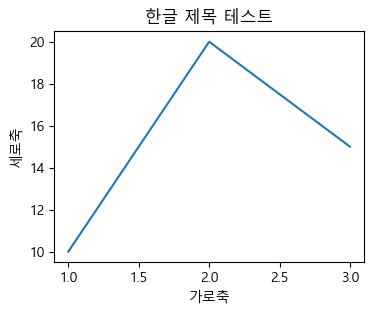

In [107]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 3))
plt.plot([1, 2, 3], [10, 20, 15])
plt.title('한글 제목 테스트')
plt.xlabel('가로축')
plt.ylabel('세로축')
plt.show()

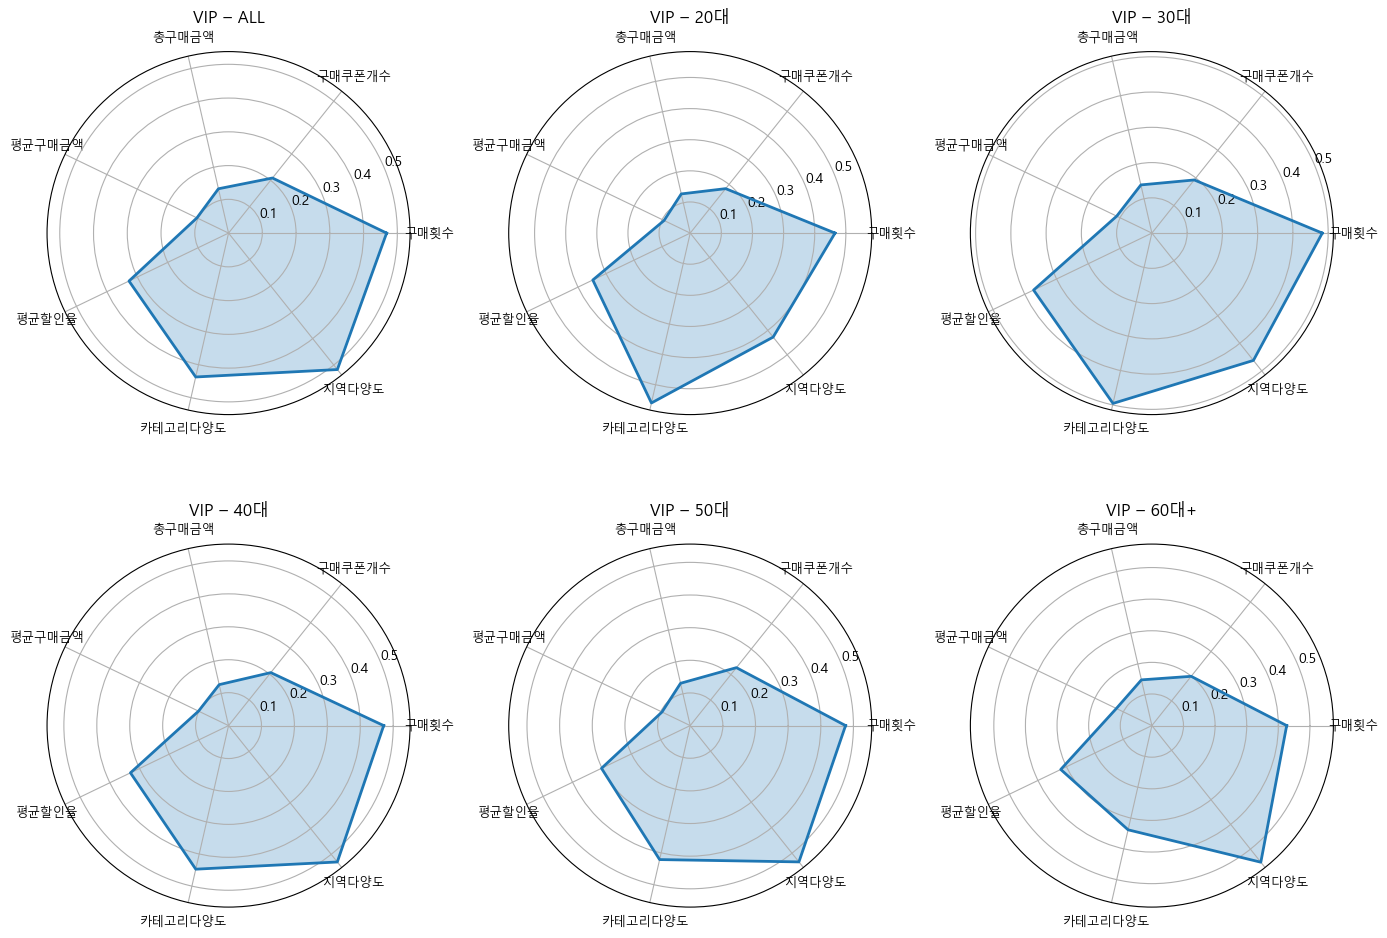

In [108]:
cols_vip = [
    "구매횟수",
    "구매쿠폰개수",
    "총구매금액",
    "평균구매금액",
    "평균할인율",
    "카테고리다양도",
    "지역다양도"
]

vip_rader = vip_df.copy()

def age_group_func(age):
    if age < 30: return "20대"
    elif age < 40: return "30대"
    elif age < 50: return "40대"
    elif age < 60: return "50대"
    else: return "60대+"
vip_rader["AGE_GROUP2"] = vip_rader["AGE_GROUP"].apply(age_group_func)

groups = ["ALL", "20대", "30대", "40대", "50대", "60대+"]


# Rader Chart
def plot_radar(ax, values, labels, title):
    N = len(labels)

    # 각도 계산
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]

    # 마지막 점을 첫 점으로 반복해서 폴리곤 닫기
    values = np.concatenate((values, [values[0]]))

    # 그리기
    ax.plot(angles, values, linewidth=2)
    ax.fill(angles, values, alpha=0.25)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=9)
    ax.set_title(title, fontsize=12)

# 다른 지표간 비교를 위해 Scaling
scaler = MinMaxScaler()
# 이상치 너무 큰 값이 있으면 눌리는 현상이 나옴
minmax_scaled_all = scaler.fit_transform(vip_rader[cols_vip])
minmax_scaled_df = pd.DataFrame(minmax_scaled_all, columns=cols_vip)
minmax_scaled_df["AGE_GROUP2"] = vip_rader["AGE_GROUP2"]

# 그래프 그리기
fig, axes = plt.subplots(2, 3, figsize=(14, 10), subplot_kw=dict(polar=True))
axes = axes.flatten()

for idx, group in enumerate(groups):
    ax = axes[idx]
    if group == "ALL":
        radar_values = minmax_scaled_df[cols_vip].mean().values
    else:
        radar_values = minmax_scaled_df[minmax_scaled_df["AGE_GROUP2"] == group][cols_vip].mean().values

    plot_radar(ax, radar_values, cols_vip, f"VIP – {group}")

plt.tight_layout()
plt.show()

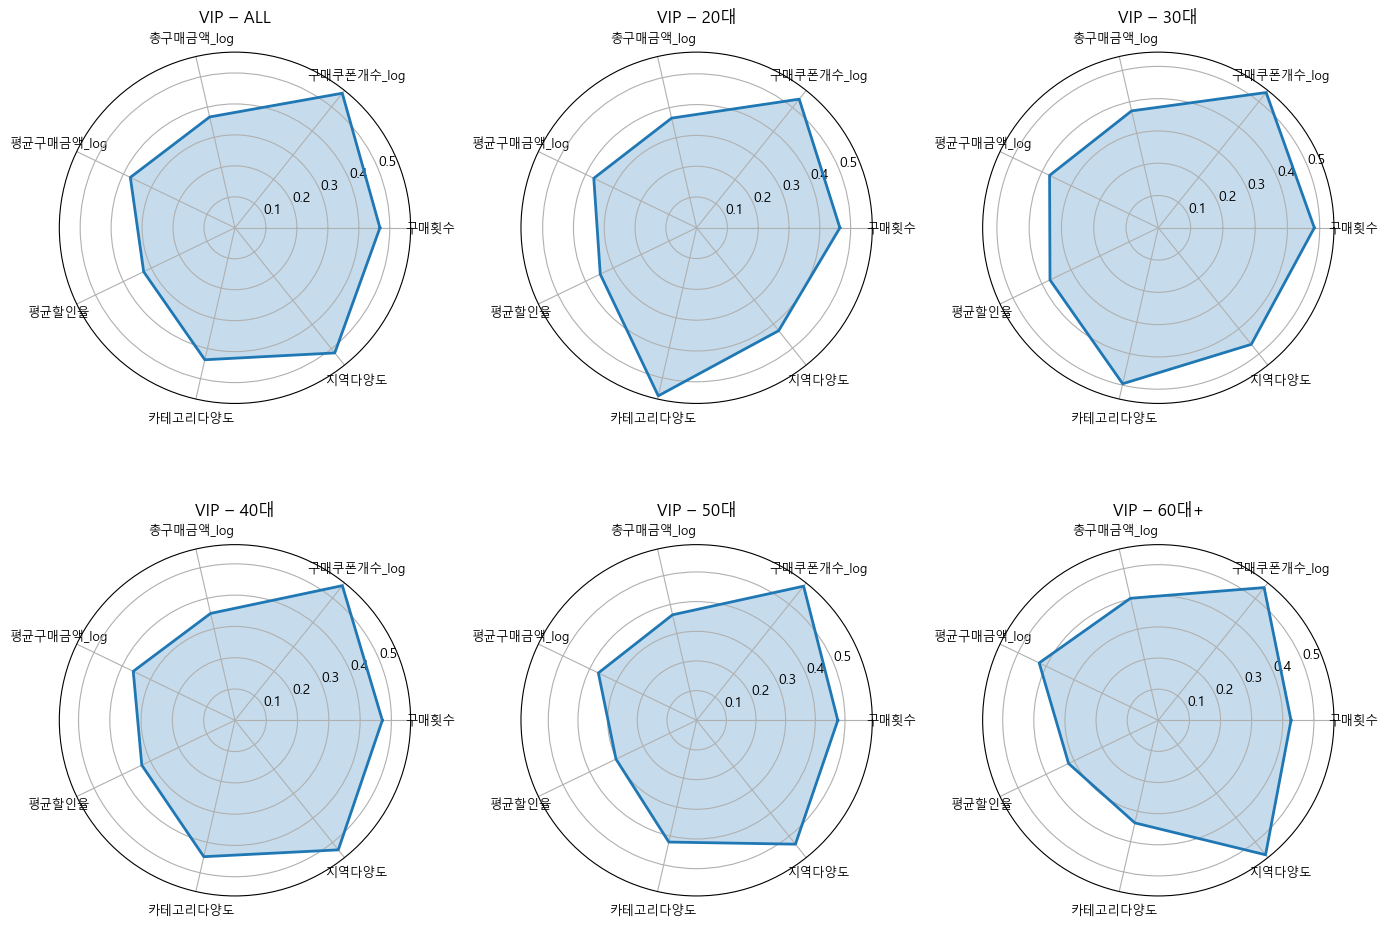

In [109]:
cols_vip_mod = [
    "구매횟수",
    "구매쿠폰개수_log",
    "총구매금액_log",
    "평균구매금액_log",
    "평균할인율",
    "카테고리다양도",
    "지역다양도"
]

vip_rader = vip_df.copy()

def age_group_func(age):
    if age < 20: return "10대"
    elif age < 30: return "20대"
    elif age < 40: return "30대"
    elif age < 50: return "40대"
    elif age < 60: return "50대"
    else: return "60대+"
vip_rader["AGE_GROUP2"] = vip_rader["AGE_GROUP"].apply(age_group_func)

groups = ["ALL", "20대", "30대", "40대", "50대", "60대+"]


# 다른 지표간 비교를 위해 Scaling
scaler = MinMaxScaler()
# 이상치 너무 큰 값이 있으면 눌리는 현상이 나옴
vip_rader["총구매금액_log"] = np.log1p(vip_rader["총구매금액"])
vip_rader["평균구매금액_log"] = np.log1p(vip_rader["평균구매금액"])
vip_rader["구매쿠폰개수_log"] = np.log1p(vip_rader["구매쿠폰개수"])

minmax_scaled_all = scaler.fit_transform(vip_rader[cols_vip_mod])
minmax_scaled_df = pd.DataFrame(minmax_scaled_all, columns=cols_vip_mod)
minmax_scaled_df["AGE_GROUP2"] = vip_rader["AGE_GROUP2"]

# 그래프 그리기
fig, axes = plt.subplots(2, 3, figsize=(14, 10), subplot_kw=dict(polar=True))
axes = axes.flatten()

for idx, group in enumerate(groups):
    ax = axes[idx]
    if group == "ALL":
        radar_values = minmax_scaled_df[cols_vip_mod].mean().values
    else:
        radar_values = minmax_scaled_df[minmax_scaled_df["AGE_GROUP2"] == group][cols_vip_mod].mean().values

    plot_radar(ax, radar_values, cols_vip_mod, f"VIP – {group}")

plt.tight_layout()
plt.show()

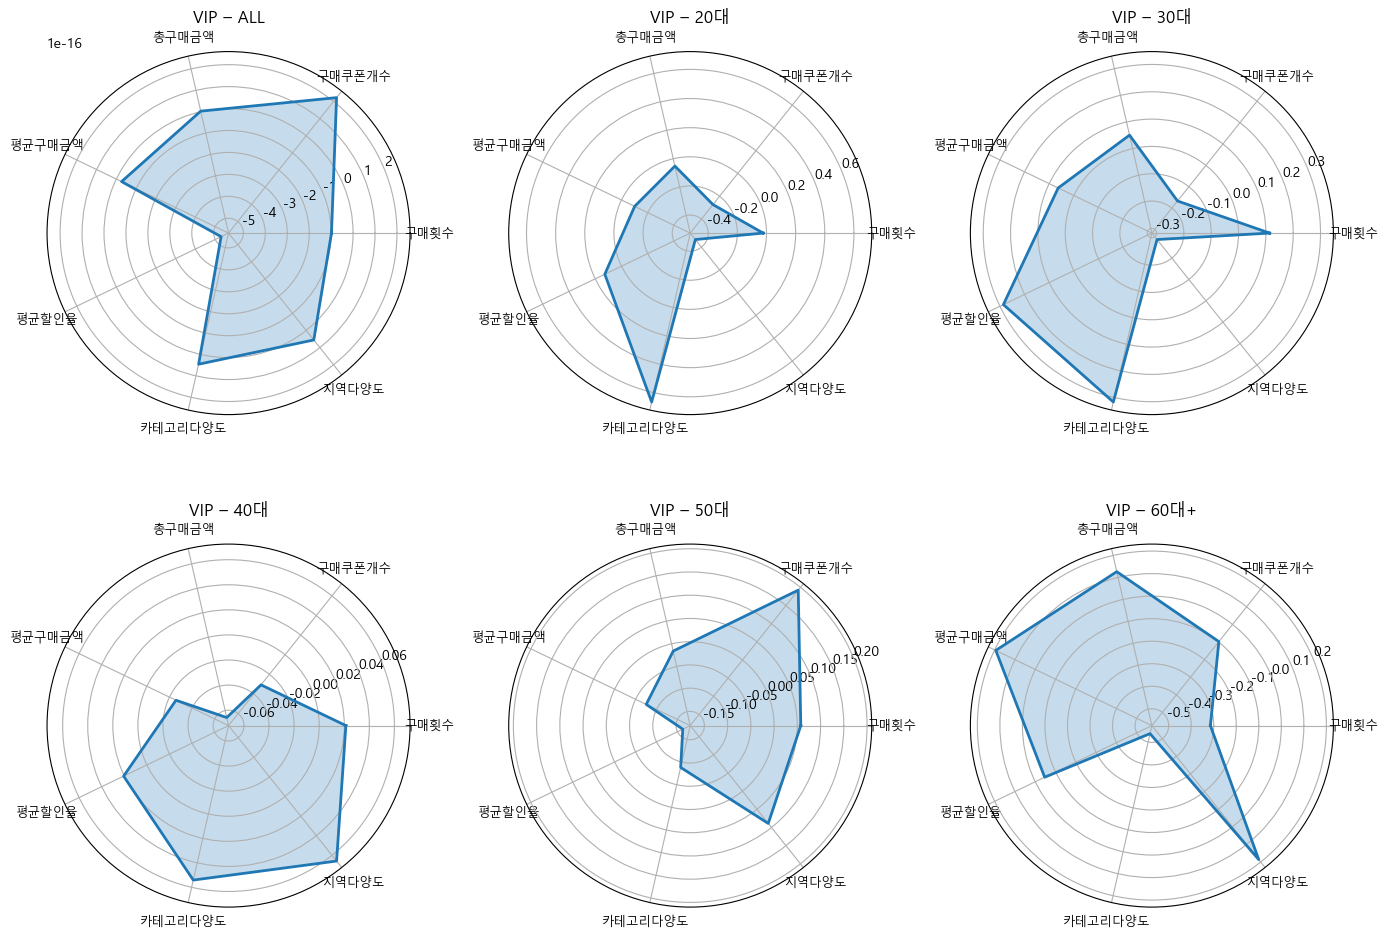

In [110]:
# Standard Scaler (연령대간 비교 불가. 각 연령대 내에서 지표들이 평균대비 얼마나 크고 작은지만 가능)
scaler = StandardScaler()
standard_scaled_all = scaler.fit_transform(vip_rader[cols_vip])
standard_scaled_df = pd.DataFrame(standard_scaled_all, columns=cols_vip)
standard_scaled_df["AGE_GROUP2"] = vip_rader["AGE_GROUP2"]

# 그래프 그리기
fig, axes = plt.subplots(2, 3, figsize=(14, 10), subplot_kw=dict(polar=True))
axes = axes.flatten()

for idx, group in enumerate(groups):
    ax = axes[idx]
    if group == "ALL":
        radar_values = standard_scaled_df[cols_vip].mean().values
    else:
        radar_values = standard_scaled_df[standard_scaled_df["AGE_GROUP2"] == group][cols_vip].mean().values

    plot_radar(ax, radar_values, cols_vip, f"VIP – {group}")

plt.tight_layout()
plt.show()

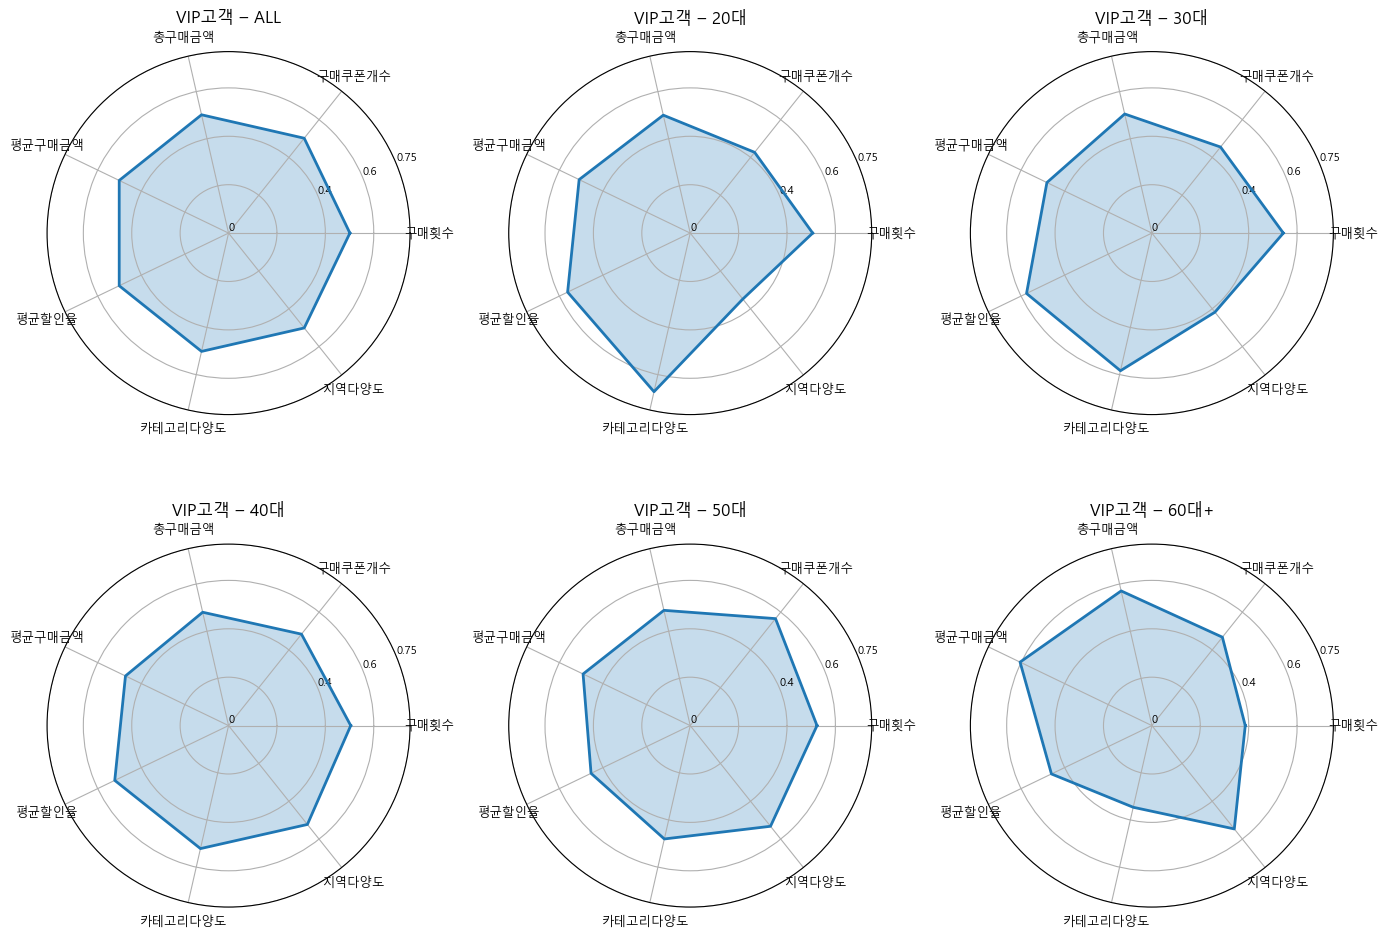

In [111]:
# 다른 지표간 비교를 위해 Percentile Scaling 적용
for col in cols_vip:
    vip_rader[col + "_pct"] = vip_rader[col].rank(pct=True)

# 새 Scaling 컬럼
cols_pct = [c + "_pct" for c in cols_vip]

fig, axes = plt.subplots(2, 3, figsize=(14, 10), subplot_kw=dict(polar=True))
axes = axes.flatten()


def plot_radar_fixed_range(ax, values, labels, title):
    N = len(labels)

    # 각도 계산
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]

    # 마지막 점을 첫 점으로 반복해서 폴리곤 닫기
    values = np.concatenate((values, [values[0]]))

    # 그리기
    ax.plot(angles, values, linewidth=2)
    ax.fill(angles, values, alpha=0.25)

    # 라벨
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=9)
    ax.set_title(title, fontsize=12)

    # 범위 고정
    ax.set_ylim(0, 0.75)                       # 최소 0, 최대 1로 고정
    ax.set_yticks([0, 0.2, 0.4, 0.6, 0.75]) # 동일 tick
    ax.set_yticklabels(["0", "", "0.4", "0.6", "0.75"], fontsize=8)

for idx, group in enumerate(groups):
    ax = axes[idx]

    if group == "ALL":
        radar_values = vip_rader[cols_pct].mean().values
    else:
        radar_values = vip_rader[vip_rader["AGE_GROUP2"] == group][cols_pct].mean().values

    plot_radar_fixed_range(ax, radar_values, cols_vip, f"VIP고객 – {group}")

plt.tight_layout()
plt.show()

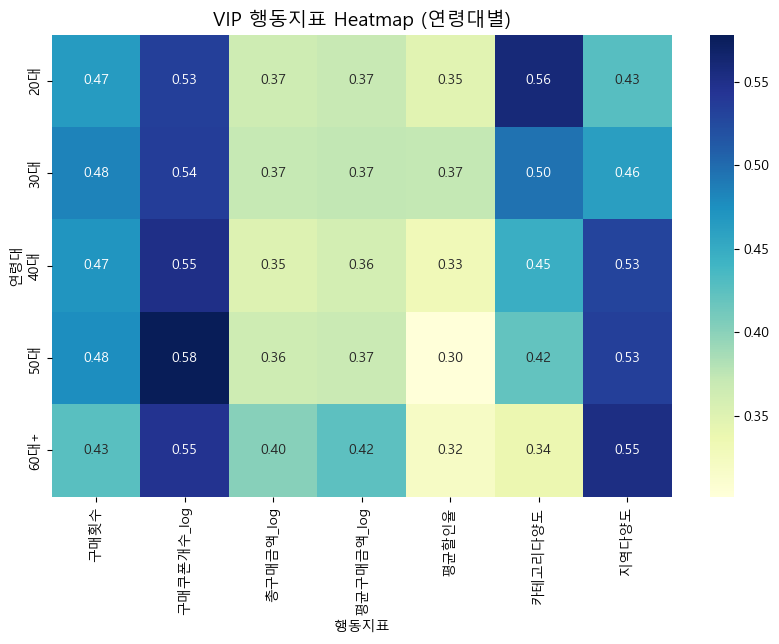

In [112]:
pivot = minmax_scaled_df.groupby("AGE_GROUP2")[cols_vip_mod].mean()

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("VIP 행동지표 Heatmap (연령대별)", fontsize=14)
plt.ylabel("연령대")
plt.xlabel("행동지표")
plt.show()

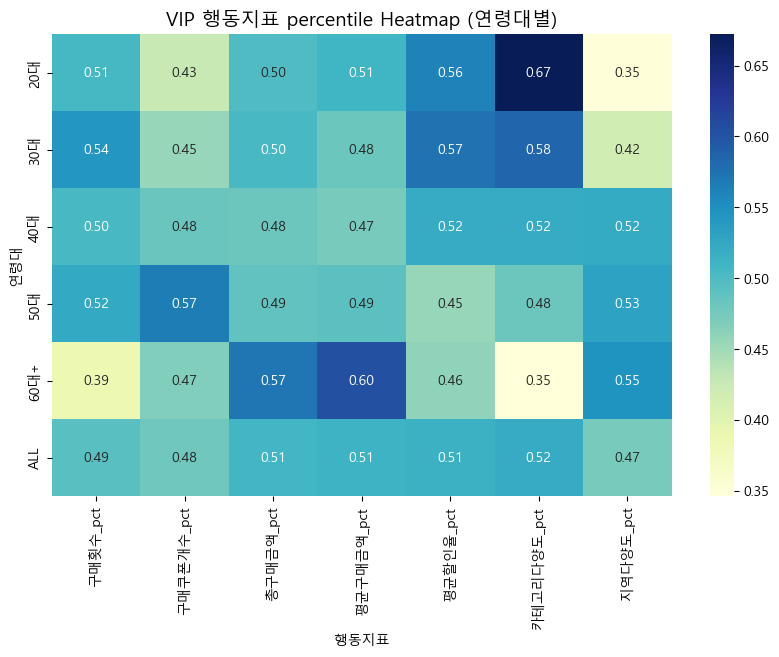

In [113]:
pivot = vip_rader.groupby("AGE_GROUP2")[cols_pct].mean()
pivot.loc["ALL"] = pivot[cols_pct].mean()

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("VIP 행동지표 percentile Heatmap (연령대별)", fontsize=14)
plt.ylabel("연령대")
plt.xlabel("행동지표")
plt.show()

## 일반고객 세그먼트 특징
* 구매행동지표  
  총구매금액  
  건당평균구매금액: 소비타입(고가/저가선호)  
  평균할인율: 소비타입(할인민감층/할인둔감층)  
  구매카테고리개수: 카테고리 다양도  
  구매지역패턴: 지역 다양도(small_area_name, 가장 세부적이므로 선호지역의 다양성을 확인하기 좋음)  
  재구매주기  
  ~~사용가능주기선호: 장기/단기 선호~~ 결측치 많음  
* 인구통계  
  성별  
  연령대  
  가입일
---
구매행동지표 -> df_detail(coupon_detail_train/test.csv), df_list(coupon_list_train/test.csv)  
인구통계 -> df_user(user_list.csv)

In [114]:
medium_df = rfm_df[rfm_df['고객등급']=='일반고객'][['Recency', 'Frequency', 'Monetary', '고객등급']].copy()

In [115]:
medium_df = medium_df.reset_index()

### Merging(df_detail, df_list): 구매기록

In [116]:
medium_df.shape[0], len(medium_df['USER_ID_hash'].unique())

(9317, 9317)

In [117]:
medium_purchase = medium_df.merge(df_detail[['ITEM_COUNT', 'I_DATE', 'USER_ID_hash', 'COUPON_ID_hash', 'PURCHASEID_hash']], 
                      on='USER_ID_hash', how='left')

In [118]:
medium_purchase.shape[0], len(medium_purchase['PURCHASEID_hash'].unique())

(118275, 118275)

In [119]:
medium_purchase = medium_purchase.merge(df_list[['GENRE_NAME', 'PRICE_RATE', 'PURCHASE_PRICE', 'VALIDPERIOD', 'small_area_name', 'COUPON_ID_hash']],
                                 on='COUPON_ID_hash', how='left')

In [120]:
medium_purchase.shape[0], len(medium_purchase['PURCHASEID_hash'].unique())

(118275, 118275)

In [121]:
medium_purchase['GENRE_NAME'] = medium_purchase['GENRE_NAME'].map(genre_en)
medium_purchase['GENRE_NAME'].unique()

array(['Gift card', 'Delivery service', 'Hair salon', 'Other coupon',
       'Food', 'Leisure', 'Relaxation', 'Hotel and Japanese hotel', 'Spa',
       'Lesson', 'Nail and eye salon', 'Health and medical', 'Beauty'],
      dtype=object)

In [122]:
medium_purchase['small_area_name'] = medium_purchase['small_area_name'].map(small_area_en)
medium_purchase['small_area_name'].unique()

array(['Ginza / Shimbashi / Tokyo / Ueno', 'Kita', 'Hokkaido',
       'Shinjuku / Takadanobaba / Nakano / Kichijoji',
       'Ebisu / Meguro / Shinagawa', 'Minami area', 'Yokohama', 'Hyogo',
       'Ikebukuro / Kagurazaka / Akabane', 'Gifu', 'Ibaraki', 'Kagawa',
       'Saitama', 'Shibuya / Aoyama / Jiyugaoka', 'Fukuoka', 'Nagano',
       'Tottori', 'Okayama', 'Aichi', 'Tachikawa / Machida / Hachioji',
       'Tochigi', 'Yamagata', 'Tokushima', 'Saga', 'Nara', 'Chiba',
       'Akasaka / Roppongi / Azabu', 'Yamaguchi', 'Shizuoka', 'Kyoto',
       'Kawasaki / Shonan / Hakone', 'Shiga', 'Miyagi', 'Hiroshima',
       'Gunma', 'Niigata', 'Nagasaki', 'Kagoshima', 'Akita', 'Aomori',
       'Iwate', 'Oita', 'Kumamoto', 'Fukui', 'Mie', 'Kochi', 'Fukushima',
       'Okinawa', 'Yamanashi', 'Wakayama', 'Ishikawa', 'Toyama', 'Ehime',
       'Shimane', 'Miyazaki'], dtype=object)

In [123]:
medium_purchase['I_DATE'].dtype

dtype('<M8[ns]')

In [124]:
medium_purchase['I_DATE'] = pd.to_datetime(medium_purchase['I_DATE'])

In [125]:
medium_purchase['I_DATE'].dtype

dtype('<M8[ns]')

### 일반고객 연령별 카테고리 구성비중
* 이 세그먼트 고객 중 몇 %가 이 카테고리를 1번이라도 사용했는가?  
  -> 고객들이 어떤 카테고리에 “관심”이 있는지  
* 거래량 & 금액 기준 카테고리 사용률: 실제로 어떤 카테고리에서 돈이 나오는지

In [126]:
medium_purchase.shape[0], len(medium_purchase['PURCHASEID_hash'].unique())

(118275, 118275)

In [127]:
medium_purchase.sample(3).T

16546   \
USER_ID_hash     240f0b9bc2e3a957007915dbcbca8ef2   
Recency                                        39   
Frequency                                      37   
Monetary                                   131168   
고객등급                                         일반고객   
ITEM_COUNT                                      1   
I_DATE                        2011-11-28 12:59:26   
COUPON_ID_hash   d3b327747f44e1f92ec0ebb2e889f3df   
PURCHASEID_hash  ab6933b587d4582a42699dacb484c583   
GENRE_NAME                       Delivery service   
PRICE_RATE                                     55   
PURCHASE_PRICE                               2420   
VALIDPERIOD                                   NaN   
small_area_name                           Saitama   

                                           112044  \
USER_ID_hash     f1d0945f058f502d462fdfc374b9dfcc   
Recency                                        24   
Frequency                                      27   
Monetary                                    49008   
고객등급                                         일반고객   
ITEM_COUNT                                      1   
I_DATE                        2012-02-18 15:55:39   
COUPON_ID_hash   3ccfc9afb55f1dd95e073008828d4ccd   
PURCHASEID_hash  205fc324822a5e89e13ac6a42bbd1bc6   
GENRE_NAME                       Delivery service   
PRICE_RATE                                     50   
PURCHASE_PRICE                               1000   
VALIDPERIOD                                   NaN   
small_area_name  Ginza / Shimbashi / Tokyo / Ueno   

                                           51007   
USER_ID_hash     707b4da728faea48227680a002f3c7b4  
Recency                                         1  
Frequency                                       8  
Monetary                                    32407  
고객등급                                         일반고객  
ITEM_COUNT                                      1  
I_DATE                        2012-05-17 17:23:34  
COUPON_ID_hash   3e3eac3c3d75bf660d65dfe349f53338  
PURCHASEID_hash  d89f792ecbafff42ba63c0286657ec77  
GENRE_NAME                       Delivery service  
PRICE_RATE                                     50  
PURCHASE_PRICE                               1650  
VALIDPERIOD                                   NaN  
small_area_name                            Nagano

In [128]:
# AGE_GROUP join (연령 정보 추가)
medium_purchase = medium_purchase.merge(
    df_user[['USER_ID_hash', 'AGE']],
    on='USER_ID_hash',
    how='left'
)
medium_purchase.shape[0], len(medium_purchase['PURCHASEID_hash'].unique())

(118275, 118275)

In [129]:
medium_purchase['AGE_GROUP'] = (medium_purchase['AGE']//10)*10
medium_purchase["AGE_GROUP"] = medium_purchase["AGE_GROUP"].apply(age_group_func)

In [130]:
medium_purchase.sample(3).T

65009  \
USER_ID_hash     8ca1f8e00f793dd747eb9e6aacf351c8   
Recency                                        45   
Frequency                                      10   
Monetary                                    41715   
고객등급                                         일반고객   
ITEM_COUNT                                      1   
I_DATE                        2011-12-21 19:12:01   
COUPON_ID_hash   472ab356d1d97d987410c85a87c29475   
PURCHASEID_hash  325f5b64030147a17f2837c41a2919a9   
GENRE_NAME               Hotel and Japanese hotel   
PRICE_RATE                                     50   
PURCHASE_PRICE                               3300   
VALIDPERIOD                                 178.0   
small_area_name                          Miyazaki   
AGE                                            37   
AGE_GROUP                                     30대   

                                                        94576  \
USER_ID_hash                 cb850d31fffba5508cccec15db43ee29   
Recency                                                    88   
Frequency                                                  13   
Monetary                                                20317   
고객등급                                                     일반고객   
ITEM_COUNT                                                  1   
I_DATE                                    2011-08-25 11:56:56   
COUPON_ID_hash               e73b49314d673e55dd16732ef10adc9f   
PURCHASEID_hash              50c570f672834934029837fbe14226a7   
GENRE_NAME                                          Gift card   
PRICE_RATE                                                 90   
PURCHASE_PRICE                                            900   
VALIDPERIOD                                               NaN   
small_area_name  Shinjuku / Takadanobaba / Nakano / Kichijoji   
AGE                                                        42   
AGE_GROUP                                                 40대   

                                            51655  
USER_ID_hash     721b49d26cb5a6917ba6282a54b0c126  
Recency                                        20  
Frequency                                      24  
Monetary                                    89200  
고객등급                                         일반고객  
ITEM_COUNT                                      2  
I_DATE                        2012-02-10 23:19:19  
COUPON_ID_hash   9af0c77b1f6b11ff82d4648288008aaf  
PURCHASEID_hash  67e617823f3799081686faa0df3c27d5  
GENRE_NAME                       Delivery service  
PRICE_RATE                                     54  
PURCHASE_PRICE                                825  
VALIDPERIOD                                   NaN  
small_area_name                       Minami area  
AGE                                            64  
AGE_GROUP                                    60대+

In [131]:
# 사용자 기반(User-based) 연령대별 카테고리 관심도 (1번이상  구매)
medium_user_category = (
    medium_purchase.groupby(['AGE_GROUP', 'USER_ID_hash', 'GENRE_NAME'])['PURCHASEID_hash']
        .nunique()
        .reset_index()
)

medium_user_category['used'] = 1

# pivot → 연령대 × 카테고리 (사용자 비율)
medium_user_category_interest = (
    medium_user_category
        .pivot_table(index=['AGE_GROUP', 'USER_ID_hash'],
                     columns='GENRE_NAME',
                     values='used',
                     fill_value=0)
        .groupby(level=0)  # AGE_GROUP 단위로 묶기
        .mean()            # 사용자 평균 → 사용자 비율(User %)
        .sort_index()
)

In [132]:
print("1번이상 구매한 카테고리들")
medium_user_category_interest.loc['60대+'].sort_values(ascending=False)

1번이상 구매한 카테고리들


GENRE_NAME
Delivery service            0.822967
Other coupon                0.663158
Food                        0.628708
Hotel and Japanese hotel    0.591388
Leisure                     0.305263
Gift card                   0.280383
Relaxation                  0.065072
Hair salon                  0.053589
Spa                         0.034450
Lesson                      0.017225
Nail and eye salon          0.017225
Health and medical          0.005742
Beauty                      0.002871
Name: 60대+, dtype: float64

In [133]:
medium_user_category_volume = (
    medium_purchase.groupby(['AGE_GROUP', 'GENRE_NAME'])['PURCHASEID_hash']
                .nunique()   # 구매 건수 기준
                .groupby(level=0)
                .apply(lambda x: x / x.sum())   # 연령대별 정규화
)

In [134]:
print("구매량 기준 카테고리 정렬")
medium_user_category_volume.loc['60대+'].sort_values(ascending=False)

구매량 기준 카테고리 정렬


AGE_GROUP  GENRE_NAME              
60대+       Delivery service            0.378919
           Food                        0.253919
           Hotel and Japanese hotel    0.174324
           Other coupon                0.098311
           Leisure                     0.040676
           Gift card                   0.028108
           Relaxation                  0.009392
           Hair salon                  0.007838
           Spa                         0.004054
           Nail and eye salon          0.002027
           Lesson                      0.001419
           Health and medical          0.000608
           Beauty                      0.000405
Name: PURCHASEID_hash, dtype: float64

In [135]:
medium_user_category_revenue = (
    medium_purchase.groupby(['AGE_GROUP', 'GENRE_NAME'])['PURCHASE_PRICE']
        .sum()
        .reset_index()
)

medium_revenue_share = (
    medium_user_category_revenue
        .groupby('AGE_GROUP')
        .apply(lambda x: x.set_index('GENRE_NAME')['PURCHASE_PRICE'] /
                        x['PURCHASE_PRICE'].sum())
        .unstack(level='AGE_GROUP')
        .fillna(0)
)

In [136]:
print(medium_revenue_share.index)

Index(['Beauty', 'Delivery service', 'Food', 'Gift card', 'Hair salon',
       'Health and medical', 'Hotel and Japanese hotel', 'Leisure', 'Lesson',
       'Nail and eye salon', 'Other coupon', 'Relaxation', 'Spa'],
      dtype='object', name='GENRE_NAME')


In [137]:
medium_revenue_share

AGE_GROUP                      10대       20대       30대       40대       50대  \
GENRE_NAME                                                                   
Beauty                    0.000000  0.003158  0.001847  0.001152  0.000874   
Delivery service          0.142090  0.212564  0.317161  0.371364  0.415461   
Food                      0.033522  0.091282  0.098984  0.116298  0.125415   
Gift card                 0.072135  0.021412  0.021823  0.015648  0.010231   
Hair salon                0.097102  0.115914  0.072411  0.047609  0.026442   
Health and medical        0.331239  0.012462  0.014296  0.008754  0.010229   
Hotel and Japanese hotel  0.029890  0.154862  0.164607  0.212581  0.274596   
Leisure                   0.026556  0.010524  0.013640  0.014726  0.013877   
Lesson                    0.000000  0.099612  0.093404  0.070893  0.031075   
Nail and eye salon        0.029066  0.054578  0.031534  0.021020  0.006778   
Other coupon              0.217140  0.048946  0.059577  0.043145  0.032579   
Relaxation                0.000000  0.050837  0.036062  0.030265  0.020937   
Spa                       0.021260  0.123849  0.074654  0.046544  0.031506   

AGE_GROUP                     60대+  
GENRE_NAME                          
Beauty                    0.000387  
Delivery service          0.361498  
Food                      0.131323  
Gift card                 0.008559  
Hair salon                0.014753  
Health and medical        0.003926  
Hotel and Japanese hotel  0.404406  
Leisure                   0.013951  
Lesson                    0.007725  
Nail and eye salon        0.002445  
Other coupon              0.026655  
Relaxation                0.010477  
Spa                       0.013893

In [138]:
print("사용금액 기준 카테고리 정렬")
medium_revenue_share['60대+'].sort_values(ascending=False)

사용금액 기준 카테고리 정렬


GENRE_NAME
Hotel and Japanese hotel    0.404406
Delivery service            0.361498
Food                        0.131323
Other coupon                0.026655
Hair salon                  0.014753
Leisure                     0.013951
Spa                         0.013893
Relaxation                  0.010477
Gift card                   0.008559
Lesson                      0.007725
Health and medical          0.003926
Nail and eye salon          0.002445
Beauty                      0.000387
Name: 60대+, dtype: float64

### 일반고객 구매행동지표 계산
* 구매행동지표 (8가지)  
  구매횟수  
  구매쿠폰개수  
  총구매금액  
  평균구매금액  
  평균할인율  
  카테고리다양도  
  지역다양도  
  재구매주기

In [139]:
def get_purchase_metrics(df_purchase):
    df_total_amount = df_purchase.groupby('USER_ID_hash')['PURCHASE_PRICE'].sum()
    df_avg_amount = df_purchase.groupby('USER_ID_hash')['PURCHASE_PRICE'].mean()
    df_avg_discount = df_purchase.groupby('USER_ID_hash')['PRICE_RATE'].mean()
    df_order_count = df_purchase.groupby('USER_ID_hash')['PURCHASEID_hash'].nunique()
    df_item_count = df_purchase.groupby('USER_ID_hash')['ITEM_COUNT'].sum()
    df_category_unique = df_purchase.groupby('USER_ID_hash')['GENRE_NAME'].nunique()
    df_area_unique = df_purchase.groupby('USER_ID_hash')['small_area_name'].nunique()
    df_purchase_cycle = df_purchase.groupby('USER_ID_hash')['I_DATE'].apply(avg_repurchase_cycle)

    df_metrics = pd.DataFrame({
        'USER_ID_hash': df_total_amount.index,
        '구매횟수': df_order_count.values,
        '구매쿠폰개수': df_item_count.values,
        '총구매금액': df_total_amount.values,
        '평균구매금액': df_avg_amount.values,
        '평균할인율': df_avg_discount.values,
        '카테고리다양도': df_category_unique.values,
        '지역다양도': df_area_unique.values,
        '재구매주기': df_purchase_cycle.values,
        # '평균사용기간': g_valid_period.values
    })

    return df_metrics

In [140]:
medium_metrics = get_purchase_metrics(medium_purchase)
medium_metrics.sample(3).T

4625  \
USER_ID_hash  80d8e7f2cf7f04603f205a9aaaeee340   
구매횟수                                         6   
구매쿠폰개수                                       7   
총구매금액                                    69306   
평균구매금액                                 11551.0   
평균할인율                                65.666667   
카테고리다양도                                      4   
지역다양도                                        4   
재구매주기                                     43.8   

                                          7815  \
USER_ID_hash  d5832d1698e0cca83223c49f72c63dda   
구매횟수                                         5   
구매쿠폰개수                                       7   
총구매금액                                     2791   
평균구매금액                                   558.2   
평균할인율                                     66.2   
카테고리다양도                                      4   
지역다양도                                        4   
재구매주기                                     80.5   

                                          5056  
USER_ID_hash  8b51da949331b66b2388872b3df94683  
구매횟수                                         2  
구매쿠폰개수                                       2  
총구매금액                                     1871  
평균구매금액                                   935.5  
평균할인율                                     81.0  
카테고리다양도                                      2  
지역다양도                                        2  
재구매주기                                     13.0

In [141]:
medium_metrics[medium_metrics['구매횟수']==0].count()

USER_ID_hash    0
구매횟수            0
구매쿠폰개수          0
총구매금액           0
평균구매금액          0
평균할인율           0
카테고리다양도         0
지역다양도           0
재구매주기           0
dtype: int64

### 일반고객 료칸 카테고리의 지역별 분포 확인

In [142]:
medium_category_hotel = medium_purchase[medium_purchase['GENRE_NAME'] == 'Hotel and Japanese hotel']
medium_category_hotel.sample(3).T

81683  \
USER_ID_hash     ae95e2343593d669a734ff0dff0b381e   
Recency                                       180   
Frequency                                       9   
Monetary                                    73772   
고객등급                                         일반고객   
ITEM_COUNT                                      1   
I_DATE                        2011-12-13 12:03:58   
COUPON_ID_hash   2a525d47a35fcf36f44bdb94bf3205dd   
PURCHASEID_hash  595465ac72f732954bb7bf4425fb364f   
GENRE_NAME               Hotel and Japanese hotel   
PRICE_RATE                                     50   
PURCHASE_PRICE                              24150   
VALIDPERIOD                                 113.0   
small_area_name                          Yamagata   
AGE                                            57   
AGE_GROUP                                     50대   

                                            89721  \
USER_ID_hash     c08d45dc5266c74dc111601baa280e58   
Recency                                         9   
Frequency                                       8   
Monetary                                    37909   
고객등급                                         일반고객   
ITEM_COUNT                                      1   
I_DATE                        2012-05-03 21:03:58   
COUPON_ID_hash   ff1672e5787aab68ad88d8480529a62b   
PURCHASEID_hash  e47e7374df41574c742b61eb54834ffe   
GENRE_NAME               Hotel and Japanese hotel   
PRICE_RATE                                     50   
PURCHASE_PRICE                               4350   
VALIDPERIOD                                 177.0   
small_area_name                           Tochigi   
AGE                                            56   
AGE_GROUP                                     50대   

                                            21491  
USER_ID_hash     2e34fe794443e44e736d5c0d98a554d5  
Recency                                        23  
Frequency                                      32  
Monetary                                   221776  
고객등급                                         일반고객  
ITEM_COUNT                                      2  
I_DATE                        2011-12-17 16:15:04  
COUPON_ID_hash   b922ca5e3a60d0029015490073d31a35  
PURCHASEID_hash  ce9ebab0f74ce05943d66739d420bbe9  
GENRE_NAME               Hotel and Japanese hotel  
PRICE_RATE                                     50  
PURCHASE_PRICE                               4980  
VALIDPERIOD                                  22.0  
small_area_name                             Chiba  
AGE                                            60  
AGE_GROUP                                    60대+

In [143]:
medium_hotel_area_count = (
    medium_category_hotel.groupby(['AGE_GROUP', 'small_area_name'])['PURCHASEID_hash']
            .nunique()   # 구매건수 기준 (혹은 .count()도 가능)
            .reset_index(name='count')
)

medium_hotel_area_count

AGE_GROUP             small_area_name  count
0         10대                       Kochi      3
1         20대                       Aichi     35
2         20대  Akasaka / Roppongi / Azabu      6
3         20대                      Aomori      1
4         20대                       Chiba     56
..        ...                         ...    ...
265      60대+                    Wakayama     20
266      60대+                    Yamagata     34
267      60대+                   Yamaguchi     43
268      60대+                   Yamanashi     32
269      60대+                    Yokohama     66

[270 rows x 3 columns]

In [144]:
medium_hotel_area_pct = (
    medium_hotel_area_count
        .groupby('AGE_GROUP')
        .apply(lambda x: x.set_index('small_area_name')['count'] / x['count'].sum())
        .reset_index()
        .rename(columns={0: 'pct'})
)
medium_hotel_area_pct['count(%)'] = round(medium_hotel_area_pct['count'] * 100, 2)

medium_hotel_area_pct[medium_hotel_area_pct['AGE_GROUP']=='50대'] \
.sort_values(by='count', ascending=False)

AGE_GROUP                               small_area_name     count  \
171       50대              Ginza / Shimbashi / Tokyo / Ueno  0.097924   
191       50대                                        Nagano  0.057639   
204       50대                                      Shizuoka  0.053920   
168       50대                                       Fukuoka  0.045863   
164       50대                                         Chiba  0.036876   
183       50대                                          Kita  0.036257   
174       50대                                      Hokkaido  0.034087   
160       50대                                         Aichi  0.033468   
195       50대                                          Oita  0.030989   
185       50대                                      Kumamoto  0.030369   
182       50대                    Kawasaki / Shonan / Hakone  0.029749   
175       50대                                         Hyogo  0.027580   
214       50대                                      Yokohama  0.027270   
206       50대                                       Tochigi  0.026030   
196       50대                                       Okayama  0.025101   
186       50대                                         Kyoto  0.023241   
197       50대                                       Okinawa  0.022932   
178       50대                                      Ishikawa  0.022622   
172       50대                                         Gunma  0.022312   
187       50대                                           Mie  0.019213   
170       50대                                          Gifu  0.019213   
192       50대                                      Nagasaki  0.018903   
188       50대                                   Minami area  0.017973   
212       50대                                     Yamaguchi  0.015184   
179       50대                                         Iwate  0.015184   
189       50대                                        Miyagi  0.015184   
198       50대                                          Saga  0.013635   
203       50대  Shinjuku / Takadanobaba / Nakano / Kichijoji  0.011156   
173       50대                                     Hiroshima  0.010846   
165       50대                    Ebisu / Meguro / Shinagawa  0.010226   
190       50대                                      Miyazaki  0.009916   
180       50대                                        Kagawa  0.009297   
194       50대                                       Niigata  0.008987   
166       50대                                         Ehime  0.008987   
181       50대                                     Kagoshima  0.008987   
177       50대              Ikebukuro / Kagurazaka / Akabane  0.008367   
167       50대                                         Fukui  0.008367   
211       50대                                      Yamagata  0.008057   
210       50대                                      Wakayama  0.008057   
213       50대                                     Yamanashi  0.007747   
169       50대                                     Fukushima  0.007747   
201       50대                                         Shiga  0.007747   
209       50대                                        Toyama  0.006817   
208       50대                                       Tottori  0.006508   
161       50대                    Akasaka / Roppongi / Azabu  0.005888   
193       50대                                          Nara  0.005888   
200       50대                  Shibuya / Aoyama / Jiyugaoka  0.004958   
205       50대                Tachikawa / Machida / Hachioji  0.004029   
199       50대                                       Saitama  0.003099   
163       50대                                        Aomori  0.002789   
202       50대                                       Shimane  0.002789   
207       50대                                     Tokushima  0.001549   
184       50대                                         Kochi  0.001549   
162       50대                                         Akita  0

In [145]:
medium_hotel_area_top20 = (
    medium_hotel_area_pct
        .sort_values(['AGE_GROUP', 'count'], ascending=[True, False])
        .groupby('AGE_GROUP')
        .head(20)
)
print(medium_hotel_area_top20[medium_hotel_area_top20['AGE_GROUP']=='40대'])

    AGE_GROUP                   small_area_name     count  count(%)
116       40대  Ginza / Shimbashi / Tokyo / Ueno  0.097236      9.72
149       40대                          Shizuoka  0.057660      5.77
136       40대                            Nagano  0.052883      5.29
113       40대                           Fukuoka  0.049130      4.91
109       40대                             Chiba  0.048106      4.81
119       40대                          Hokkaido  0.047083      4.71
128       40대                              Kita  0.042648      4.26
127       40대        Kawasaki / Shonan / Hakone  0.035142      3.51
130       40대                          Kumamoto  0.026953      2.70
140       40대                              Oita  0.026271      2.63
142       40대                           Okinawa  0.026271      2.63
105       40대                             Aichi  0.023883      2.39
120       40대                             Hyogo  0.023883      2.39
159       40대                          Yokohama 

### 일반고객 료칸 카테고리의 지역별 가격과 수량 확인

In [230]:
clusters = {
    "TOKYO_HUB": ["Shizuoka", "Hokkaido", "Chiba", "Kita", "Gunma", "Tochigi"],
    "OSAKA_HUB": ["Kyoto", "Hyogo", "Okayama", "Mie", "Gifu", "Ishikawa"],
    "FUKUOKA_HUB": ["Fukuoka", "Kumamoto"],
    "NAGANO_CITY_HUB": ["Nagano", "Gunma", "Tochigi"],
    "HAKONE_ONSEN": ["Kawasaki / Shonan / Hakone"],
    "BEPPU_YUFUIN_ONSEN": ["Oita"],
}

def assign_cluster(area):
    for name, areas in clusters.items():
        if area in areas:
            return name
    return None

medium_purchase_ryokan = medium_purchase.copy()
medium_purchase_ryokan["CLUSTER"] = medium_purchase_ryokan["small_area_name"].apply(assign_cluster)
medium_purchase_ryokan.sample(3).T

27574  \
USER_ID_hash     3ca6744c0f1bff2f485365a3c1ff7a9d   
Recency                                         3   
Frequency                                       5   
Monetary                                     9381   
고객등급                                         일반고객   
ITEM_COUNT                                      2   
I_DATE                        2012-06-04 12:14:33   
COUPON_ID_hash   62df4481a8f9103093b335255138f4a2   
PURCHASEID_hash  5d02735665822bce7f0bddb9e919841f   
GENRE_NAME                             Relaxation   
PRICE_RATE                                     50   
PURCHASE_PRICE                               3750   
VALIDPERIOD                                  93.0   
small_area_name  Ginza / Shimbashi / Tokyo / Ueno   
AGE                                            38   
AGE_GROUP                                     30대   
CLUSTER                                      None   

                                            90821  \
USER_ID_hash     c31610f6d3fb628a45b49dc0f421dcb8   
Recency                                        16   
Frequency                                       6   
Monetary                                    10944   
고객등급                                         일반고객   
ITEM_COUNT                                      1   
I_DATE                        2012-05-10 11:48:34   
COUPON_ID_hash   0bc58c1e7c415cc25fd03e76ae24db84   
PURCHASEID_hash  931abdc95d2446de2dc486ff05f096b1   
GENRE_NAME                       Delivery service   
PRICE_RATE                                     65   
PURCHASE_PRICE                               2340   
VALIDPERIOD                                   NaN   
small_area_name                          Hokkaido   
AGE                                            58   
AGE_GROUP                                     50대   
CLUSTER                                 TOKYO_HUB   

                                            46579  
USER_ID_hash     6767109f9803ba2d99103250a5b24489  
Recency                                        22  
Frequency                                      10  
Monetary                                    35102  
고객등급                                         일반고객  
ITEM_COUNT                                      2  
I_DATE                        2012-01-28 21:22:55  
COUPON_ID_hash   d0e1b63cb7cc32edc3a6c619e4215368  
PURCHASEID_hash  187b1c456e8ff9196afd84e1058e6ff4  
GENRE_NAME                                Leisure  
PRICE_RATE                                     51  
PURCHASE_PRICE                               1290  
VALIDPERIOD                                 178.0  
small_area_name                       Minami area  
AGE                                            50  
AGE_GROUP                                     50대  
CLUSTER                                      None

In [229]:
target_ryokan = medium_purchase_ryokan[
    medium_purchase_ryokan["AGE_GROUP"].isin(["50대", "60대+"])
    & (medium_purchase_ryokan["GENRE_NAME"] == "Hotel and Japanese hotel")
    & medium_purchase_ryokan["CLUSTER"].notna()
].copy()

target_ryokan.sample(3).T

28954  \
USER_ID_hash     4086f7100ea3a833f25f7d6439e9ee4e   
Recency                                         5   
Frequency                                      10   
Monetary                                    78249   
고객등급                                         일반고객   
ITEM_COUNT                                      2   
I_DATE                        2011-12-01 22:07:42   
COUPON_ID_hash   dac3e873048964d0dcadb6f23c586bd9   
PURCHASEID_hash  6e337c8b622471b1c44447ffc709b6eb   
GENRE_NAME               Hotel and Japanese hotel   
PRICE_RATE                                     50   
PURCHASE_PRICE                               6509   
VALIDPERIOD                                  56.0   
small_area_name                              Oita   
AGE                                            57   
AGE_GROUP                                     50대   
CLUSTER                        BEPPU_YUFUIN_ONSEN   

                                            3101   \
USER_ID_hash     070777942dd9e4d9187e670873ace7c2   
Recency                                        30   
Frequency                                      10   
Monetary                                   219470   
고객등급                                         일반고객   
ITEM_COUNT                                      2   
I_DATE                        2011-10-02 15:26:19   
COUPON_ID_hash   1ab61d9e44eaa31610ab55ba5d3a7d26   
PURCHASEID_hash  eae7849c9b8a930bfc841ab84816ee83   
GENRE_NAME               Hotel and Japanese hotel   
PRICE_RATE                                     50   
PURCHASE_PRICE                               6075   
VALIDPERIOD                                 146.0   
small_area_name                          Kumamoto   
AGE                                            57   
AGE_GROUP                                     50대   
CLUSTER                               FUKUOKA_HUB   

                                            46709  
USER_ID_hash     67a82eb9447a70fa57c4170b0828e92e  
Recency                                         2  
Frequency                                      11  
Monetary                                    59345  
고객등급                                         일반고객  
ITEM_COUNT                                      3  
I_DATE                        2012-06-22 14:50:16  
COUPON_ID_hash   50e691e119597ca2de08384bb3b192e5  
PURCHASEID_hash  f114f9d9cd24e7c1978f4efa05587c10  
GENRE_NAME               Hotel and Japanese hotel  
PRICE_RATE                                     57  
PURCHASE_PRICE                               6900  
VALIDPERIOD                                 158.0  
small_area_name                               Mie  
AGE                                            55  
AGE_GROUP                                     50대  
CLUSTER                                 OSAKA_HUB

In [232]:
def trimmed_mean_5pct(x):
    # 상·하위 5% 날린 평균
    return trim_mean(x, 0.05)  # 0.05=5%

ryokan_price_stats = (
    target_ryokan.groupby("CLUSTER")["PURCHASE_PRICE"]
          .agg(
              mean_price="mean",
              median_price="median",
              trimmed_mean_price=trimmed_mean_5pct,
              n_orders="count"
          )
          .reset_index()
)
ryokan_price_stats

CLUSTER    mean_price  median_price  trimmed_mean_price  \
0  BEPPU_YUFUIN_ONSEN  10897.083333        8925.0        10313.017241   
1         FUKUOKA_HUB   8657.891667        6150.0         8070.344907   
2        HAKONE_ONSEN  10291.438596        9450.0         9875.258065   
3     NAGANO_CITY_HUB  10233.838384        8500.0         9063.240223   
4           OSAKA_HUB  12044.109023       10250.0        11304.759722   
5           TOKYO_HUB  13348.149580        9025.0        12022.555037   

   n_orders  
0       192  
1       480  
2       171  
3       396  
4       798  
5      1190

In [234]:
target_ryokan["order_month"] = target_ryokan["I_DATE"].dt.to_period("M")

ryokan_monthly = (
    target_ryokan.groupby(["CLUSTER", "order_month"])
          .agg(
              coupons=("ITEM_COUNT", "sum"),              # 쿠폰 장 수
              orders=("PURCHASEID_hash", "nunique"),      # 주문 건수
              revenue=("PURCHASE_PRICE", "sum"),          # 매출액
          )
          .reset_index()
)
ryokan_monthly

CLUSTER order_month  coupons  orders  revenue
0   BEPPU_YUFUIN_ONSEN     2011-07       10      10    70000
1   BEPPU_YUFUIN_ONSEN     2011-08       36      31   310150
2   BEPPU_YUFUIN_ONSEN     2011-09       26      20   141450
3   BEPPU_YUFUIN_ONSEN     2011-10       14       9    89300
4   BEPPU_YUFUIN_ONSEN     2011-11       31      23   222202
..                 ...         ...      ...     ...      ...
67           TOKYO_HUB     2012-02      246     139  1264640
68           TOKYO_HUB     2012-03      275     174  1815630
69           TOKYO_HUB     2012-04      111      72  1019865
70           TOKYO_HUB     2012-05      161      96  1316390
71           TOKYO_HUB     2012-06       96      62   615415

[72 rows x 5 columns]

In [235]:
ryokan_monthly_summary = (
    ryokan_monthly.groupby("CLUSTER")
           .agg(
               avg_coupons_per_month=("coupons", "mean"),
               avg_orders_per_month=("orders", "mean"),
               avg_revenue_per_month=("revenue", "mean"),
           )
           .reset_index()
)
ryokan_monthly_summary

CLUSTER  avg_coupons_per_month  avg_orders_per_month  \
0  BEPPU_YUFUIN_ONSEN              23.500000             16.000000   
1         FUKUOKA_HUB              52.500000             40.000000   
2        HAKONE_ONSEN              22.000000             14.250000   
3     NAGANO_CITY_HUB              60.416667             33.000000   
4           OSAKA_HUB             122.833333             66.500000   
5           TOKYO_HUB             159.000000             99.166667   

   avg_revenue_per_month  
0           1.743533e+05  
1           3.463157e+05  
2           1.466530e+05  
3           3.377167e+05  
4           8.009332e+05  
5           1.323692e+06

### Merging(df_user): 인구통계 + 구매행동지표(medium_metrics)

In [146]:
medium_df.shape[0], len(medium_df['USER_ID_hash'].unique())

(9317, 9317)

In [147]:
medium_df = medium_df.merge(df_user[['SEX_ID', 'AGE', 'USER_ID_hash']], 
                     on='USER_ID_hash', how='left')

In [148]:
medium_df.shape[0], len(medium_df['USER_ID_hash'].unique())

(9317, 9317)

In [149]:
medium_df.sample(3)

USER_ID_hash  Recency  Frequency  Monetary  고객등급  \
279   073a61ed21940e39b964b5cf5f46ed3d        8         11     71605  일반고객   
2125  3b7b740bbbb01b606e7394b96deb81fd        6         11     47797  일반고객   
3843  6bf07ad7c4931cb1ec84d983b2f85d41       86          7      8296  일반고객   

     SEX_ID  AGE  
279       f   34  
2125      m   59  
3843      m   62

In [150]:
medium_df = medium_df.merge(medium_metrics, on='USER_ID_hash', how='left')
medium_df.shape[0], len(medium_df['USER_ID_hash'].unique())

(9317, 9317)

In [151]:
medium_df.sample(3).T

355   \
USER_ID_hash  09f7094194141db9d622b924be7220c9   
Recency                                      5   
Frequency                                   34   
Monetary                                135601   
고객등급                                      일반고객   
SEX_ID                                       f   
AGE                                         36   
구매횟수                                        34   
구매쿠폰개수                                      40   
총구매금액                                   135601   
평균구매금액                             3988.264706   
평균할인율                                63.617647   
카테고리다양도                                      5   
지역다양도                                       15   
재구매주기                                 10.30303   

                                          2841  \
USER_ID_hash  4fba4f90d724e9e37019cdbce5ca74eb   
Recency                                      1   
Frequency                                   12   
Monetary                                 50511   
고객등급                                      일반고객   
SEX_ID                                       f   
AGE                                         40   
구매횟수                                        12   
구매쿠폰개수                                      12   
총구매금액                                    50511   
평균구매금액                                 4209.25   
평균할인율                                66.583333   
카테고리다양도                                      6   
지역다양도                                        9   
재구매주기                                     32.0   

                                          2231  
USER_ID_hash  3eaa144a5b7fddd389d8707c91327027  
Recency                                      2  
Frequency                                   15  
Monetary                                 37381  
고객등급                                      일반고객  
SEX_ID                                       f  
AGE                                         42  
구매횟수                                        15  
구매쿠폰개수                                      29  
총구매금액                                    37381  
평균구매금액                             2492.066667  
평균할인율                                61.133333  
카테고리다양도                                      6  
지역다양도                                        7  
재구매주기                                 6.785714

In [152]:
medium_df['AGE_GROUP'] = (medium_df['AGE']//10)*10
medium_df.sample(3).T

2864  \
USER_ID_hash  500bfcbf93052efcff0aed7dfe8e6dca   
Recency                                     20   
Frequency                                   10   
Monetary                                 13469   
고객등급                                      일반고객   
SEX_ID                                       f   
AGE                                         61   
구매횟수                                        10   
구매쿠폰개수                                      10   
총구매금액                                    13469   
평균구매금액                                  1346.9   
평균할인율                                     58.1   
카테고리다양도                                      2   
지역다양도                                        9   
재구매주기                                36.666667   
AGE_GROUP                                   60   

                                          7009  \
USER_ID_hash  c06b6f827e534e1e5c051bf069228559   
Recency                                     14   
Frequency                                   18   
Monetary                                 97541   
고객등급                                      일반고객   
SEX_ID                                       f   
AGE                                         60   
구매횟수                                        18   
구매쿠폰개수                                      26   
총구매금액                                    97541   
평균구매금액                             5418.944444   
평균할인율                                59.722222   
카테고리다양도                                      5   
지역다양도                                       13   
재구매주기                                16.647059   
AGE_GROUP                                   60   

                                          496   
USER_ID_hash  0d9a8909b356871479ac47d845e722c8  
Recency                                     29  
Frequency                                   15  
Monetary                                 52441  
고객등급                                      일반고객  
SEX_ID                                       m  
AGE                                         34  
구매횟수                                        15  
구매쿠폰개수                                      23  
총구매금액                                    52441  
평균구매금액                             3496.066667  
평균할인율                                67.333333  
카테고리다양도                                      4  
지역다양도                                        5  
재구매주기                                21.571429  
AGE_GROUP                                   30

In [153]:
medium_df["AGE_GROUP"].value_counts()

AGE_GROUP
40    2813
30    2430
50    1947
20    1059
60     891
70     152
10      23
80       2
Name: count, dtype: int64

In [154]:
medium_df.groupby('AGE_GROUP')[[
    '구매횟수','구매쿠폰개수','총구매금액','평균구매금액','평균할인율','카테고리다양도','재구매주기'
]].mean().round(2)

구매횟수  구매쿠폰개수     총구매금액   평균구매금액  평균할인율  카테고리다양도  재구매주기
AGE_GROUP                                                         
10          5.17    5.57  11084.22  3202.74  77.41     2.43  45.89
20         10.26   13.53  51322.38  4879.20  67.88     3.87  32.04
30         11.59   15.71  49767.42  4411.51  66.75     3.79  32.49
40         12.79   18.55  55236.96  4460.45  64.81     3.74  31.38
50         14.55   21.94  68223.66  4805.85  62.82     3.72  25.62
60         14.27   22.39  69027.30  4912.94  61.81     3.54  26.73
70         13.61   20.75  63186.95  4323.48  62.58     3.20  28.14
80          9.00   10.50  26949.00  5014.23  58.46     2.50  37.92

### 일반고객 분석 시각화
1. Rader Chart: percentile scaling 적용
2. Heat Map  
   같은 지표 내에서 연령대 간 상대적 위치를 비교  
   같은 연령대에서 지표 간 비교는 불가   
3. Parallel Coordinates

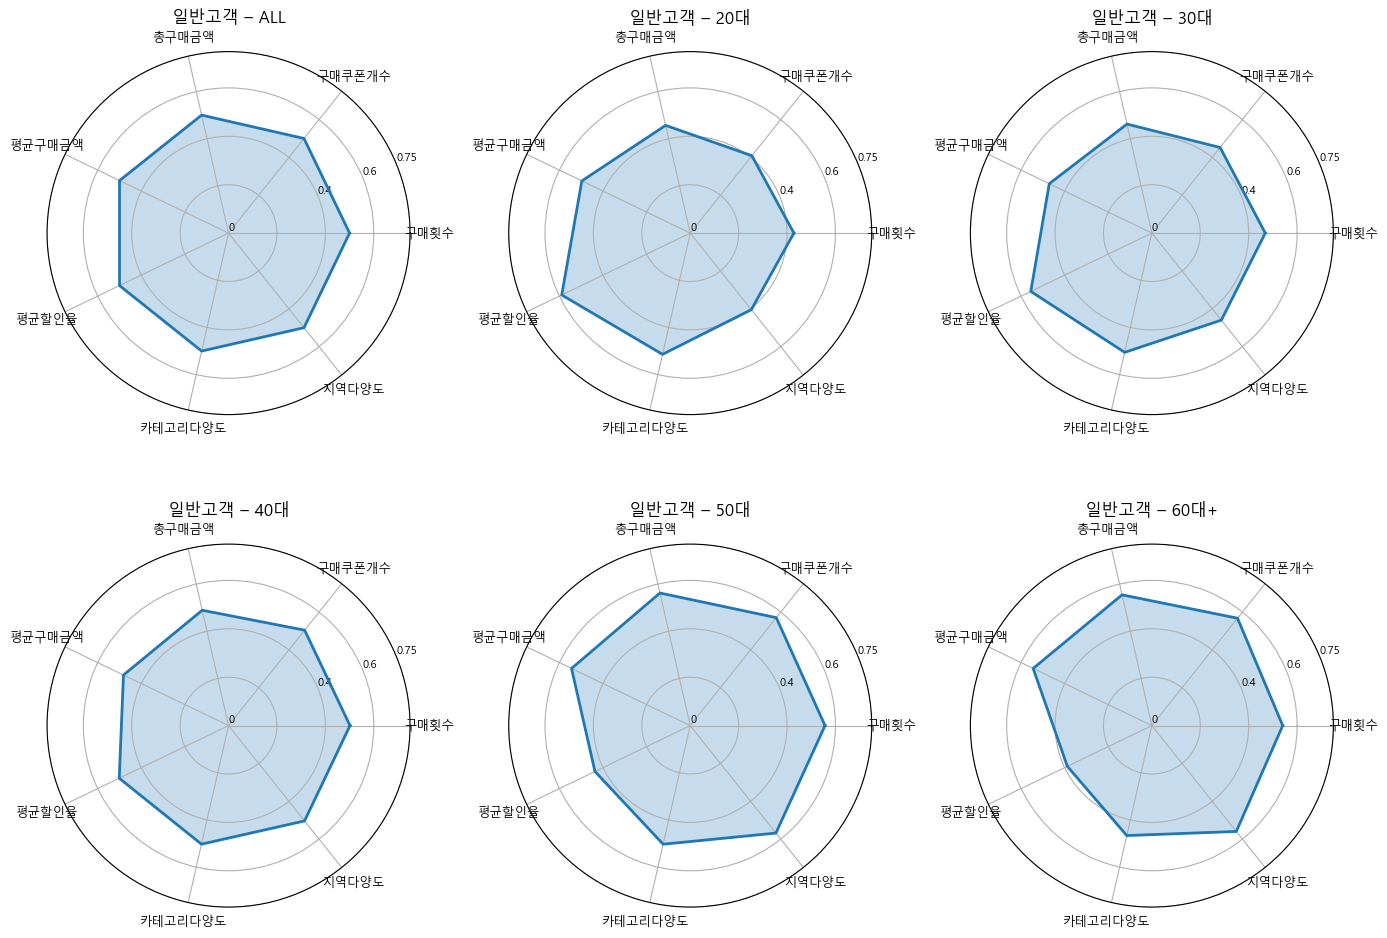

In [155]:
cols_medium = [
    "구매횟수",
    "구매쿠폰개수",
    "총구매금액",
    "평균구매금액",
    "평균할인율",
    "카테고리다양도",
    "지역다양도"
] 

medium_rader = medium_df.copy()
medium_rader["AGE_GROUP2"] = medium_rader["AGE_GROUP"].apply(age_group_func)
groups = ["ALL", "20대", "30대", "40대", "50대", "60대+"]


# 다른 지표간 비교를 위해 Percentile Scaling 적용
for col in cols_medium:
    medium_rader[col + "_pct"] = medium_rader[col].rank(pct=True)

# 새 Scaling 컬럼
cols_pct = [c + "_pct" for c in cols_medium]

fig, axes = plt.subplots(2, 3, figsize=(14, 10), subplot_kw=dict(polar=True))
axes = axes.flatten()


def plot_radar_fixed_range(ax, values, labels, title):
    N = len(labels)

    # 각도 계산
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]

    # 마지막 점을 첫 점으로 반복해서 폴리곤 닫기
    values = np.concatenate((values, [values[0]]))

    # 그리기
    ax.plot(angles, values, linewidth=2)
    ax.fill(angles, values, alpha=0.25)

    # 라벨
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=9)
    ax.set_title(title, fontsize=12)

    # 범위 고정
    ax.set_ylim(0, 0.75)                       # 최소 0, 최대 1로 고정
    ax.set_yticks([0, 0.2, 0.4, 0.6, 0.75]) # 동일 tick
    ax.set_yticklabels(["0", "", "0.4", "0.6", "0.75"], fontsize=8)

for idx, group in enumerate(groups):
    ax = axes[idx]

    if group == "ALL":
        radar_values = medium_rader[cols_pct].mean().values
    else:
        radar_values = medium_rader[medium_rader["AGE_GROUP2"] == group][cols_pct].mean().values

    plot_radar_fixed_range(ax, radar_values, cols_medium, f"일반고객 – {group}")

plt.tight_layout()
plt.show()

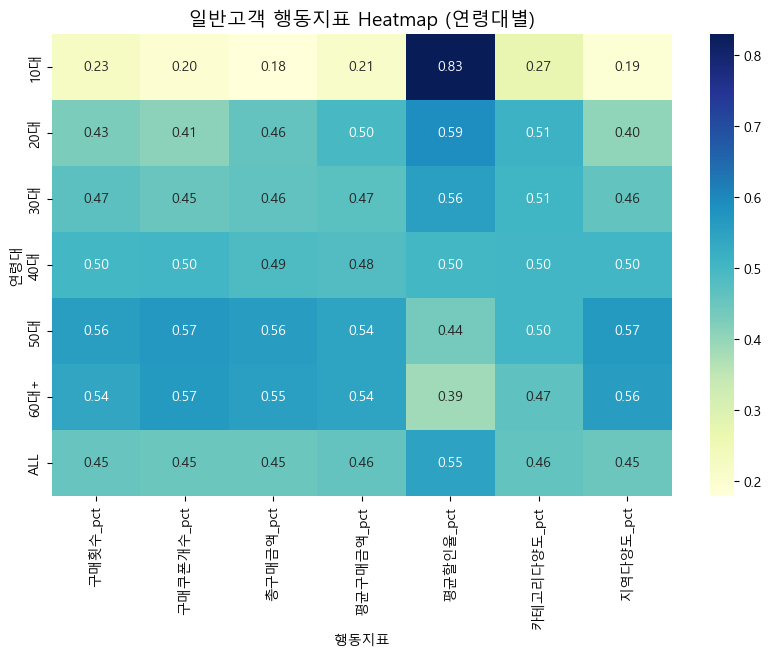

In [156]:
pivot = medium_rader.groupby("AGE_GROUP2")[cols_pct].mean()
pivot.loc["ALL"] = pivot[cols_pct].mean()

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("일반고객 행동지표 Heatmap (연령대별)", fontsize=14)
plt.ylabel("연령대")
plt.xlabel("행동지표")
plt.show()

## 비활성고객 세그먼트 특징

In [157]:
low_df = rfm_df[rfm_df['고객등급']=='저활성고객'][['Recency', 'Frequency', 'Monetary', '고객등급']].copy()

In [158]:
low_df = low_df.reset_index()

### Merging(df_detail, df_list): 구매기록

In [159]:
low_df.shape[0], len(low_df['USER_ID_hash'].unique())

(13113, 13113)

In [160]:
low_purchase = low_df.merge(df_detail[['ITEM_COUNT', 'I_DATE', 'USER_ID_hash', 'COUPON_ID_hash', 'PURCHASEID_hash']], 
                      on='USER_ID_hash', how='left')
low_purchase.shape[0], len(low_purchase['PURCHASEID_hash'].unique())

(32577, 32577)

In [161]:
low_purchase = low_purchase.merge(df_list[['GENRE_NAME', 'PRICE_RATE', 'PURCHASE_PRICE', 'VALIDPERIOD', 'small_area_name', 'COUPON_ID_hash']],
                                 on='COUPON_ID_hash', how='left')
low_purchase.shape[0], len(low_purchase['PURCHASEID_hash'].unique())

(32577, 32577)

In [162]:
low_purchase['GENRE_NAME'] = low_purchase['GENRE_NAME'].map(genre_en)
low_purchase['GENRE_NAME'].unique()

array(['Food', 'Gift card', 'Lesson', 'Other coupon',
       'Hotel and Japanese hotel', 'Leisure', 'Delivery service',
       'Hair salon', 'Nail and eye salon', 'Relaxation', 'Spa', 'Beauty',
       'Health and medical'], dtype=object)

In [163]:
low_purchase['small_area_name'] = low_purchase['small_area_name'].map(small_area_en)
low_purchase['small_area_name'].unique()

array(['Minami area', 'Hokkaido',
       'Shinjuku / Takadanobaba / Nakano / Kichijoji', 'Aichi',
       'Ginza / Shimbashi / Tokyo / Ueno', 'Fukuoka', 'Shizuoka',
       'Yokohama', 'Akasaka / Roppongi / Azabu',
       'Ebisu / Meguro / Shinagawa', 'Nara', 'Kita', 'Hyogo', 'Oita',
       'Kumamoto', 'Kawasaki / Shonan / Hakone', 'Niigata', 'Chiba',
       'Miyagi', 'Saitama', 'Hiroshima', 'Kagawa', 'Ishikawa', 'Nagasaki',
       'Ikebukuro / Kagurazaka / Akabane', 'Fukui',
       'Shibuya / Aoyama / Jiyugaoka', 'Okinawa',
       'Tachikawa / Machida / Hachioji', 'Okayama', 'Shiga', 'Yamaguchi',
       'Kyoto', 'Mie', 'Shimane', 'Yamanashi', 'Gifu', 'Aomori', 'Gunma',
       'Yamagata', 'Tochigi', 'Kagoshima', 'Miyazaki', 'Kochi',
       'Tokushima', 'Toyama', 'Wakayama', 'Nagano', 'Fukushima', 'Ehime',
       'Akita', 'Saga', 'Ibaraki', 'Tottori', 'Iwate'], dtype=object)

In [164]:
low_purchase['I_DATE'].dtype

dtype('<M8[ns]')

In [165]:
low_purchase['I_DATE'] = pd.to_datetime(low_purchase['I_DATE'])
low_purchase['I_DATE'].dtype

dtype('<M8[ns]')

### 비활성고객 연령별 카테고리 구성비중
* 이 세그먼트 고객 중 몇 %가 이 카테고리를 1번이라도 사용했는가?  
  -> 고객들이 어떤 카테고리에 “관심”이 있는지  
* 거래량 & 금액 기준 카테고리 사용률: 실제로 어떤 카테고리에서 돈이 나오는지

In [166]:
low_purchase.shape[0], len(low_purchase['PURCHASEID_hash'].unique())

(32577, 32577)

In [167]:
low_purchase.sample(3).T

8075   \
USER_ID_hash     400b5fa7c6b7ea85fc4973d1411017c3   
Recency                                       213   
Frequency                                       8   
Monetary                                     9796   
고객등급                                        저활성고객   
ITEM_COUNT                                      2   
I_DATE                        2011-10-06 12:47:08   
COUPON_ID_hash   06156935452cea44f3774cae5ac8e01d   
PURCHASEID_hash  bfd7445afb20e2696654f0d24160a2cc   
GENRE_NAME                       Delivery service   
PRICE_RATE                                     54   
PURCHASE_PRICE                               2810   
VALIDPERIOD                                   NaN   
small_area_name                             Iwate   

                                            21893  \
USER_ID_hash     aa641243b7203ec3c0a7d28f131240a4   
Recency                                       128   
Frequency                                       4   
Monetary                                    32410   
고객등급                                        저활성고객   
ITEM_COUNT                                      1   
I_DATE                        2011-12-14 18:35:15   
COUPON_ID_hash   a0e51230c617a650ee91605f0f68287e   
PURCHASEID_hash  1992e7ee7abe6a85184bfc4e20959f01   
GENRE_NAME               Hotel and Japanese hotel   
PRICE_RATE                                     57   
PURCHASE_PRICE                              13390   
VALIDPERIOD                                 132.0   
small_area_name        Kawasaki / Shonan / Hakone   

                                            6214   
USER_ID_hash     30bef94ed063fdb13e717da29f29b31c  
Recency                                       144  
Frequency                                       6  
Monetary                                    10240  
고객등급                                        저활성고객  
ITEM_COUNT                                      2  
I_DATE                        2011-10-19 19:54:08  
COUPON_ID_hash   cf960c9ac5cf05579eb9482f7cb48979  
PURCHASEID_hash  5185ee5f1b00db9003d24bb61d0625ad  
GENRE_NAME                                Leisure  
PRICE_RATE                                     50  
PURCHASE_PRICE                               1010  
VALIDPERIOD                                 127.0  
small_area_name                         Yamanashi

In [168]:
# AGE_GROUP join (연령 정보 추가)
low_purchase = low_purchase.merge(
    df_user[['USER_ID_hash', 'AGE']],
    on='USER_ID_hash',
    how='left'
)
low_purchase.shape[0], len(low_purchase['PURCHASEID_hash'].unique())

(32577, 32577)

In [169]:
low_purchase['AGE_GROUP'] = (low_purchase['AGE']//10)*10

In [170]:
low_purchase.sample(3).T

30145  \
USER_ID_hash     ede79b353fba687eb58226e3aa3985eb   
Recency                                        76   
Frequency                                       5   
Monetary                                    15040   
고객등급                                        저활성고객   
ITEM_COUNT                                      1   
I_DATE                        2012-04-09 11:15:18   
COUPON_ID_hash   a9f9c7dd4000798fe9975d2f5586096a   
PURCHASEID_hash  341c218d5b471ae94a236af1bb5825aa   
GENRE_NAME                       Delivery service   
PRICE_RATE                                     51   
PURCHASE_PRICE                               1700   
VALIDPERIOD                                   NaN   
small_area_name  Ginza / Shimbashi / Tokyo / Ueno   
AGE                                            35   
AGE_GROUP                                      30   

                                            4196   \
USER_ID_hash     20324cf759c5aba3fb5c2b1a0298baa8   
Recency                                       101   
Frequency                                      19   
Monetary                                    42368   
고객등급                                        저활성고객   
ITEM_COUNT                                      2   
I_DATE                        2012-03-15 18:49:47   
COUPON_ID_hash   fcca838f0cd552cca21a0aaac26c7a03   
PURCHASEID_hash  f971211bae154244b1b7ce9eda3daac4   
GENRE_NAME                       Delivery service   
PRICE_RATE                                     52   
PURCHASE_PRICE                               8665   
VALIDPERIOD                                   NaN   
small_area_name  Ginza / Shimbashi / Tokyo / Ueno   
AGE                                            51   
AGE_GROUP                                      50   

                                            31779  
USER_ID_hash     f972d228e410ec346fe0d817e8dbd245  
Recency                                       337  
Frequency                                       2  
Monetary                                    32080  
고객등급                                        저활성고객  
ITEM_COUNT                                      1  
I_DATE                        2011-07-23 17:16:07  
COUPON_ID_hash   0de0f9aa267816ee9d65a34d577996c6  
PURCHASEID_hash  dfc6463bcd3fe5db03b6a0098f6abbff  
GENRE_NAME               Hotel and Japanese hotel  
PRICE_RATE                                     53  
PURCHASE_PRICE                              16040  
VALIDPERIOD                                  66.0  
small_area_name                         Kagoshima  
AGE                                            36  
AGE_GROUP                                      30

In [171]:
# 사용자 기반(User-based) 연령대별 카테고리 관심도 (1번이상  구매)
low_user_category = (
    low_purchase.groupby(['AGE_GROUP', 'USER_ID_hash', 'GENRE_NAME'])['PURCHASEID_hash']
        .nunique()
        .reset_index()
)

low_user_category['used'] = 1

# pivot → 연령대 × 카테고리 (사용자 비율)
low_user_category_interest = (
    low_user_category
        .pivot_table(index=['AGE_GROUP', 'USER_ID_hash'],
                     columns='GENRE_NAME',
                     values='used',
                     fill_value=0)
        .groupby(level=0)  # AGE_GROUP 단위로 묶기
        .mean()            # 사용자 평균 → 사용자 비율(User %)
        .sort_index()
)

In [172]:
print("1번이상 구매한 카테고리들")
low_user_category_interest.loc[50].sort_values(ascending=False)

1번이상 구매한 카테고리들


GENRE_NAME
Delivery service            0.610624
Other coupon                0.334795
Food                        0.237817
Gift card                   0.201267
Hotel and Japanese hotel    0.170565
Leisure                     0.115010
Hair salon                  0.026316
Lesson                      0.024854
Relaxation                  0.024854
Spa                         0.013158
Nail and eye salon          0.008285
Beauty                      0.000975
Health and medical          0.000000
Name: 50, dtype: float64

In [173]:
low_user_category_volume = (
    low_purchase.groupby(['AGE_GROUP', 'GENRE_NAME'])['PURCHASEID_hash']
                .nunique()   # 구매 건수 기준
                .groupby(level=0)
                .apply(lambda x: x / x.sum())   # 연령대별 정규화
)

In [174]:
print("구매량 기준 카테고리 정렬")
low_user_category_volume.loc[50].sort_values(ascending=False)

구매량 기준 카테고리 정렬


AGE_GROUP  GENRE_NAME              
50         Delivery service            0.394195
           Other coupon                0.166605
           Food                        0.163483
           Hotel and Japanese hotel    0.092579
           Gift card                   0.083946
           Leisure                     0.052902
           Relaxation                  0.013042
           Hair salon                  0.012858
           Lesson                      0.010287
           Spa                         0.005511
           Nail and eye salon          0.004225
           Beauty                      0.000367
Name: PURCHASEID_hash, dtype: float64

In [175]:
low_user_category_revenue = (
    low_purchase.groupby(['AGE_GROUP', 'GENRE_NAME'])['PURCHASE_PRICE']
        .sum()
        .reset_index()
)

In [176]:
low_revenue_share = (
    low_user_category_revenue
        .groupby('AGE_GROUP')
        .apply(lambda x: x.set_index('GENRE_NAME')['PURCHASE_PRICE'] /
                        x['PURCHASE_PRICE'].sum())
        .unstack()
        .fillna(0)
)

In [177]:
print("사용금액 기준 카테고리 정렬")
low_revenue_share.loc[50].sort_values(ascending=False)

사용금액 기준 카테고리 정렬


GENRE_NAME
Delivery service            0.374764
Hotel and Japanese hotel    0.250298
Lesson                      0.102571
Food                        0.099523
Other coupon                0.060029
Hair salon                  0.028633
Leisure                     0.021386
Gift card                   0.020172
Spa                         0.019395
Relaxation                  0.014328
Nail and eye salon          0.008549
Beauty                      0.000351
Health and medical          0.000000
Name: 50, dtype: float64

### 비활성고객 구매행동지표 계산
* 구매행동지표 (8가지)  
  구매횟수  
  구매쿠폰개수  
  총구매금액  
  평균구매금액  
  평균할인율  
  카테고리다양도  
  지역다양도  
  재구매주기

In [178]:
low_metrics = get_purchase_metrics(low_purchase)
low_metrics.sample(3).T

1117  \
USER_ID_hash  1581bc388a3cab5352bc5d0bd825ffa6   
구매횟수                                         1   
구매쿠폰개수                                       2   
총구매금액                                    10400   
평균구매금액                                 10400.0   
평균할인율                                     50.0   
카테고리다양도                                      1   
지역다양도                                        1   
재구매주기                                      NaN   

                                          1701  \
USER_ID_hash  20528b3cccdcc90df9859d703ea00cab   
구매횟수                                         1   
구매쿠폰개수                                       1   
총구매금액                                    10300   
평균구매금액                                 10300.0   
평균할인율                                     70.0   
카테고리다양도                                      1   
지역다양도                                        1   
재구매주기                                      NaN   

                                          8573  
USER_ID_hash  a604dc3a0297cbec65d266e204026144  
구매횟수                                         3  
구매쿠폰개수                                       3  
총구매금액                                     3145  
평균구매금액                             1048.333333  
평균할인율                                62.333333  
카테고리다양도                                      3  
지역다양도                                        3  
재구매주기                                      6.0

In [179]:
low_metrics[low_metrics['구매횟수']==0].count()

USER_ID_hash    0
구매횟수            0
구매쿠폰개수          0
총구매금액           0
평균구매금액          0
평균할인율           0
카테고리다양도         0
지역다양도           0
재구매주기           0
dtype: int64

### Merging(df_user): 인구통계 + 구매행동지표(low_metrics)

In [180]:
low_df.shape[0], len(low_df['USER_ID_hash'].unique())

(13113, 13113)

In [181]:
low_df = low_df.merge(df_user[['SEX_ID', 'AGE', 'USER_ID_hash']], 
                     on='USER_ID_hash', how='left')
low_df.shape[0], len(low_df['USER_ID_hash'].unique())

(13113, 13113)

In [182]:
low_df.sample(3)

USER_ID_hash  Recency  Frequency  Monetary   고객등급  \
3067  3bd86ead7b3fd10d2d4d593dbdc9a3f7       81          4      2651  저활성고객   
9176  b19e813bcb5e51c343be23cad503e648      137          1      1000  저활성고객   
9793  bdb5cdbd08fb5ce93585badad13feb2f      214          2      2620  저활성고객   

     SEX_ID  AGE  
3067      m   26  
9176      m   39  
9793      m   52

In [183]:
low_df = low_df.merge(low_metrics, on='USER_ID_hash', how='left')
low_df.shape[0], len(low_df['USER_ID_hash'].unique())

(13113, 13113)

In [184]:
low_df.sample(3).T

11775  \
USER_ID_hash  e583e89508be21172fb1e82dd2b76c45   
Recency                                    205   
Frequency                                    3   
Monetary                                 13228   
고객등급                                     저활성고객   
SEX_ID                                       m   
AGE                                         39   
구매횟수                                         3   
구매쿠폰개수                                       3   
총구매금액                                    13228   
평균구매금액                             4409.333333   
평균할인율                                     77.0   
카테고리다양도                                      2   
지역다양도                                        3   
재구매주기                                     19.0   

                                         8708   \
USER_ID_hash  a8797c754d60dee46f360f91fd9a9a61   
Recency                                    305   
Frequency                                    1   
Monetary                                   890   
고객등급                                     저활성고객   
SEX_ID                                       f   
AGE                                         40   
구매횟수                                         1   
구매쿠폰개수                                       3   
총구매금액                                      890   
평균구매금액                                   890.0   
평균할인율                                     50.0   
카테고리다양도                                      1   
지역다양도                                        1   
재구매주기                                      NaN   

                                         4695   
USER_ID_hash  5a7324b2e3c325513f5de6731445da2c  
Recency                                     93  
Frequency                                    4  
Monetary                                 12700  
고객등급                                     저활성고객  
SEX_ID                                       m  
AGE                                         60  
구매횟수                                         4  
구매쿠폰개수                                       9  
총구매금액                                    12700  
평균구매금액                                  3175.0  
평균할인율                                    65.25  
카테고리다양도                                      2  
지역다양도                                        3  
재구매주기                                      8.0

In [185]:
low_df['AGE_GROUP'] = (low_df['AGE']//10)*10
low_df.sample(3).T

4467  \
USER_ID_hash  5652403ce97a3cdb65c9803112d140db   
Recency                                    120   
Frequency                                    1   
Monetary                                  5300   
고객등급                                     저활성고객   
SEX_ID                                       m   
AGE                                         41   
구매횟수                                         1   
구매쿠폰개수                                       4   
총구매금액                                     5300   
평균구매금액                                  5300.0   
평균할인율                                     60.0   
카테고리다양도                                      1   
지역다양도                                        1   
재구매주기                                      NaN   
AGE_GROUP                                   40   

                                          7450  \
USER_ID_hash  8f730b28755c1111ea560e3548dada66   
Recency                                     54   
Frequency                                    1   
Monetary                                  8925   
고객등급                                     저활성고객   
SEX_ID                                       f   
AGE                                         47   
구매횟수                                         1   
구매쿠폰개수                                       2   
총구매금액                                     8925   
평균구매금액                                  8925.0   
평균할인율                                     50.0   
카테고리다양도                                      1   
지역다양도                                        1   
재구매주기                                      NaN   
AGE_GROUP                                   40   

                                          9535  
USER_ID_hash  b844441c0d28876b2c405f77cf766814  
Recency                                    216  
Frequency                                    1  
Monetary                                  3740  
고객등급                                     저활성고객  
SEX_ID                                       f  
AGE                                         39  
구매횟수                                         1  
구매쿠폰개수                                       1  
총구매금액                                     3740  
평균구매금액                                  3740.0  
평균할인율                                     50.0  
카테고리다양도                                      1  
지역다양도                                        1  
재구매주기                                      NaN  
AGE_GROUP                                   30

In [186]:
low_df["AGE_GROUP"].value_counts()

AGE_GROUP
30    4281
40    3488
20    2133
50    2052
60     899
70     193
10      57
80      10
Name: count, dtype: int64

In [187]:
low_df.groupby('AGE_GROUP')[[
    '구매횟수','구매쿠폰개수','총구매금액','평균구매금액','평균할인율','카테고리다양도','재구매주기'
]].mean().round(2)

구매횟수  구매쿠폰개수     총구매금액   평균구매금액  평균할인율  카테고리다양도  재구매주기
AGE_GROUP                                                        
10         2.33    2.77   3867.07  1824.74  60.51     1.68  32.39
20         2.39    3.09  10220.84  5099.02  63.64     1.78  41.39
30         2.43    3.14   9490.17  4518.61  62.94     1.76  41.08
40         2.48    3.42   9321.56  4317.30  62.07     1.73  39.90
50         2.65    3.79  10496.73  4395.84  62.42     1.77  39.53
60         2.66    3.96  10066.64  4142.95  60.35     1.74  38.83
70         2.21    3.05   6881.02  3260.86  60.59     1.60  39.66
80         1.60    2.20   1748.20  1131.27  56.22     1.30  22.25

### 비활성고객 분석 시각화
1. Rader Chart
2. Heat Map

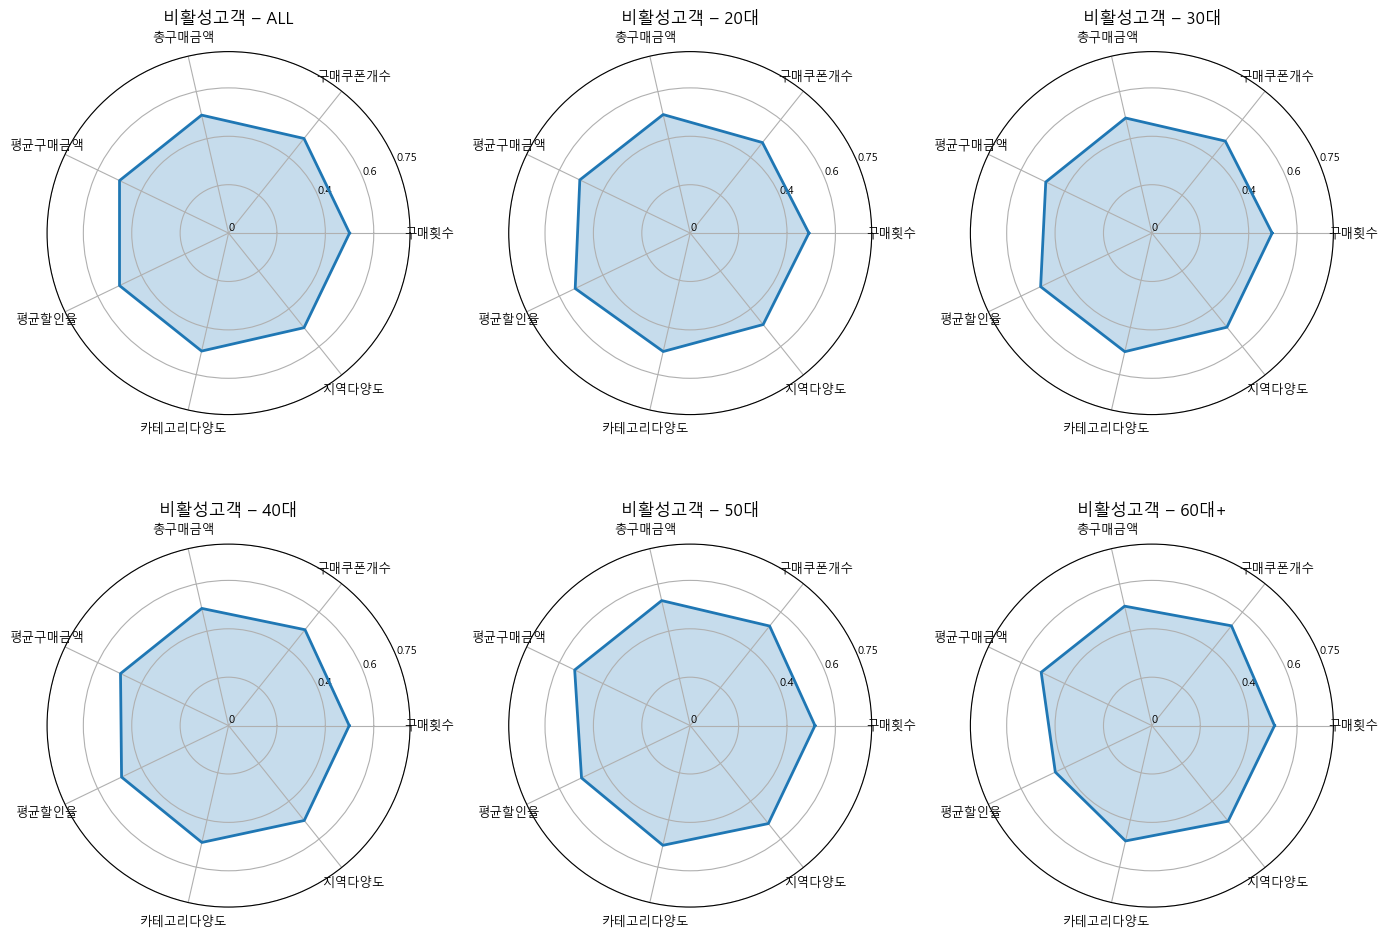

In [188]:
cols_low = [
    "구매횟수",
    "구매쿠폰개수",
    "총구매금액",
    "평균구매금액",
    "평균할인율",
    "카테고리다양도",
    "지역다양도"
] 

low_rader = low_df.copy()
low_rader["AGE_GROUP2"] = low_rader["AGE_GROUP"].apply(age_group_func)
groups = ["ALL", "20대", "30대", "40대", "50대", "60대+"]


# 다른 지표간 비교를 위해 Percentile Scaling 적용
for col in cols_low:
    low_rader[col + "_pct"] = low_rader[col].rank(pct=True)

# 새 Scaling 컬럼
cols_pct = [c + "_pct" for c in cols_low]

fig, axes = plt.subplots(2, 3, figsize=(14, 10), subplot_kw=dict(polar=True))
axes = axes.flatten()


for idx, group in enumerate(groups):
    ax = axes[idx]

    if group == "ALL":
        radar_values = low_rader[cols_pct].mean().values
    else:
        radar_values = low_rader[low_rader["AGE_GROUP2"] == group][cols_pct].mean().values

    plot_radar_fixed_range(ax, radar_values, cols_low, f"비활성고객 – {group}")

plt.tight_layout()
plt.show()

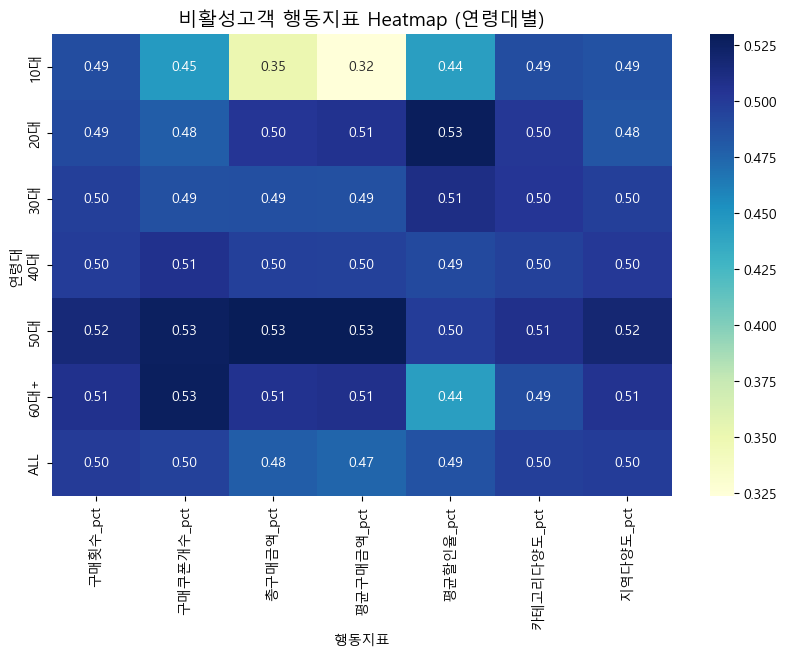

In [189]:
pivot = low_rader.groupby("AGE_GROUP2")[cols_pct].mean()
pivot.loc["ALL"] = pivot[cols_pct].mean()

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("비활성고객 행동지표 Heatmap (연령대별)", fontsize=14)
plt.ylabel("연령대")
plt.xlabel("행동지표")
plt.show()

## 세그먼트별 전체 비교

In [190]:
vip_rader["고객등급"] = "VIP"
medium_rader["고객등급"] = "일반고객"
low_rader["고객등급"] = "저활성고객"

all_rader=  pd.concat([vip_rader, medium_rader, low_rader], axis=0, ignore_index=True)

In [191]:
all_rader.sample(3).T

3326   \
USER_ID_hash  5335681f57a5599c666f6e7711aecbc8   
Recency                                     19   
Frequency                                   12   
Monetary                                 22634   
고객등급                                      일반고객   
SEX_ID                                       f   
AGE                                         37   
구매횟수                                        12   
구매쿠폰개수                                      16   
총구매금액                                    22634   
평균구매금액                             1886.166667   
평균할인율                                    55.75   
카테고리다양도                                      6   
지역다양도                                        8   
재구매주기                                27.636364   
AGE_GROUP                                   30   
AGE_GROUP2                                 30대   
총구매금액_log                                  NaN   
평균구매금액_log                                 NaN   
구매쿠폰개수_log                                 NaN   
구매횟수_pct                              0.564828   
구매쿠폰개수_pct                            0.541108   
총구매금액_pct                             0.337448   
평균구매금액_pct                            0.225502   
평균할인율_pct                             0.134324   
카테고리다양도_pct                           0.894709   
지역다양도_pct                             0.719599   

                                         18965  \
USER_ID_hash  b3f765a343c2225a820103ed3ad95506   
Recency                                    230   
Frequency                                    1   
Monetary                                  1680   
고객등급                                     저활성고객   
SEX_ID                                       m   
AGE                                         64   
구매횟수                                         1   
구매쿠폰개수                                       1   
총구매금액                                     1680   
평균구매금액                                  1680.0   
평균할인율                                     50.0   
카테고리다양도                                      1   
지역다양도                                        1   
재구매주기                                      NaN   
AGE_GROUP                                   60   
AGE_GROUP2                                60대+   
총구매금액_log                                  NaN   
평균구매금액_log                                 NaN   
구매쿠폰개수_log                                 NaN   
구매횟수_pct                              0.220964   
구매쿠폰개수_pct                            0.156791   
총구매금액_pct                             0.210364   
평균구매금액_pct                            0.402349   
평균할인율_pct                             0.113818   
카테고리다양도_pct                           0.259247   
지역다양도_pct                             0.243537   

                                         22334  
USER_ID_hash  f6f0d03baf146c98b4450396da6bdd67  
Recency                                    142  
Frequency                                   27  
Monetary                                 49070  
고객등급                                     저활성고객  
SEX_ID                                       m  
AGE                                         65  
구매횟수                                        27  
구매쿠폰개수                                      31  
총구매금액                                    49070  
평균구매금액                             1817.407407  
평균할인율                                60.222222  
카테고리다양도                                      3  
지역다양도                                       13  
재구매주기                                 7.884615  
AGE_GROUP                                   60  
AGE_GROUP2                                60대+  
총구매금액_log                                  NaN  
평균구매금액_log                                 NaN  
구매쿠폰개수_log                                 NaN  
구매횟수_pct                              0.999695  
구매쿠폰개수_pct                            0.998055  
총구매금액_pct                             0.965607  
평균구매금액_pct                            0.436208  
평균할인율_pct     

In [192]:
cols_pct = [c+"_pct" for c in cols_low]
all_rader.drop(columns=cols_pct, axis=1, errors='ignore', inplace=True)
all_rader.sample(3).T

13568  \
USER_ID_hash  4bdbd440b9295f1ea0482a61b338957a   
Recency                                    241   
Frequency                                    3   
Monetary                                  2745   
고객등급                                     저활성고객   
SEX_ID                                       f   
AGE                                         65   
구매횟수                                         3   
구매쿠폰개수                                       3   
총구매금액                                     2745   
평균구매금액                                   915.0   
평균할인율                                     60.0   
카테고리다양도                                      3   
지역다양도                                        3   
재구매주기                                     52.0   
AGE_GROUP                                   60   
AGE_GROUP2                                60대+   
총구매금액_log                                  NaN   
평균구매금액_log                                 NaN   
구매쿠폰개수_log                                 NaN   

                                         10656  \
USER_ID_hash  12e8cb024797247c89923782ae5930f5   
Recency                                     57   
Frequency                                    1   
Monetary                                  1250   
고객등급                                     저활성고객   
SEX_ID                                       f   
AGE                                         47   
구매횟수                                         1   
구매쿠폰개수                                       2   
총구매금액                                     1250   
평균구매금액                                  1250.0   
평균할인율                                     51.0   
카테고리다양도                                      1   
지역다양도                                        1   
재구매주기                                      NaN   
AGE_GROUP                                   40   
AGE_GROUP2                                 40대   
총구매금액_log                                  NaN   
평균구매금액_log                                 NaN   
구매쿠폰개수_log                                 NaN   

                                         8307   
USER_ID_hash  d9a15c09c1af7e0ec8748a7be76d4e66  
Recency                                     19  
Frequency                                    4  
Monetary                                  7360  
고객등급                                      일반고객  
SEX_ID                                       f  
AGE                                         42  
구매횟수                                         4  
구매쿠폰개수                                       4  
총구매금액                                     7360  
평균구매금액                                  1840.0  
평균할인율                                     60.0  
카테고리다양도                                      3  
지역다양도                                        3  
재구매주기                                    112.0  
AGE_GROUP                                   40  
AGE_GROUP2                                 40대  
총구매금액_log                                  NaN  
평균구매금액_log                                 NaN  
구매쿠폰개수_log                                 NaN

In [193]:
cols_all = [
    "구매횟수",
    "구매쿠폰개수",
    "총구매금액",
    "평균구매금액",
    "평균할인율",
    "카테고리다양도",
    "지역다양도"
]

for col in cols_all:
    all_rader[col + "_pct"] = all_rader[col].rank(pct=True)

all_rader.sample(3).T

16963  \
USER_ID_hash  8cad0be07946829b414a05ddbed494d2   
Recency                                    268   
Frequency                                    1   
Monetary                                  1150   
고객등급                                     저활성고객   
SEX_ID                                       f   
AGE                                         29   
구매횟수                                         1   
구매쿠폰개수                                       2   
총구매금액                                     1150   
평균구매금액                                  1150.0   
평균할인율                                     50.0   
카테고리다양도                                      1   
지역다양도                                        1   
재구매주기                                      NaN   
AGE_GROUP                                   20   
AGE_GROUP2                                 20대   
총구매금액_log                                  NaN   
평균구매금액_log                                 NaN   
구매쿠폰개수_log                                 NaN   
구매횟수_pct                              0.134734   
구매쿠폰개수_pct                            0.275481   
총구매금액_pct                             0.067509   
평균구매금액_pct                             0.16546   
평균할인율_pct                             0.070802   
카테고리다양도_pct                           0.164274   
지역다양도_pct                             0.151435   

                                         7722   \
USER_ID_hash  c9b4fe9127cd606beeecc281642a2af2   
Recency                                      3   
Frequency                                   31   
Monetary                                264980   
고객등급                                      일반고객   
SEX_ID                                       m   
AGE                                         58   
구매횟수                                        31   
구매쿠폰개수                                      73   
총구매금액                                   264980   
평균구매금액                             8547.741935   
평균할인율                                 57.83871   
카테고리다양도                                      3   
지역다양도                                       10   
재구매주기                                 5.633333   
AGE_GROUP                                   50   
AGE_GROUP2                                 50대   
총구매금액_log                                  NaN   
평균구매금액_log                                 NaN   
구매쿠폰개수_log                                 NaN   
구매횟수_pct                              0.960846   
구매쿠폰개수_pct                            0.989597   
총구매금액_pct                             0.991265   
평균구매금액_pct                            0.884909   
평균할인율_pct                             0.322052   
카테고리다양도_pct                           0.658524   
지역다양도_pct                             0.916667   

                                         9017   
USER_ID_hash  ed370ce7aebf437c769e3e2f9e8a38b4  
Recency                                     19  
Frequency                                   24  
Monetary                                 91211  
고객등급                                      일반고객  
SEX_ID                                       f  
AGE                                         43  
구매횟수                                        24  
구매쿠폰개수                                      53  
총구매금액                                    91211  
평균구매금액                             3800.458333  
평균할인율                                   58.375  
카테고리다양도                                      6  
지역다양도                                        6  
재구매주기                                13.782609  
AGE_GROUP                                   40  
AGE_GROUP2                                 40대  
총구매금액_log                                  NaN  
평균구매금액_log                                 NaN  
구매쿠폰개수_log                                 NaN  
구매횟수_pct                              0.930362  
구매쿠폰개수_pct                            0.972193  
총구매금액_pct                             0.894785  
평균구매금액_pct                            0.639716  
평균할인율_pct     

In [194]:
all_pivot = all_rader.groupby("고객등급")[cols_pct].mean()
all_pivot

구매횟수_pct  구매쿠폰개수_pct  총구매금액_pct  평균구매금액_pct  평균할인율_pct  카테고리다양도_pct  \
고객등급                                                                         
VIP    0.988397    0.982751   0.974770    0.680629   0.430933     0.882081   
일반고객   0.724726    0.717615   0.685770    0.563216   0.542354     0.693708   
저활성고객  0.327256    0.332460   0.355301    0.450274   0.471799     0.352149   

       지역다양도_pct  
고객등급              
VIP     0.953518  
일반고객    0.708430  
저활성고객   0.339771

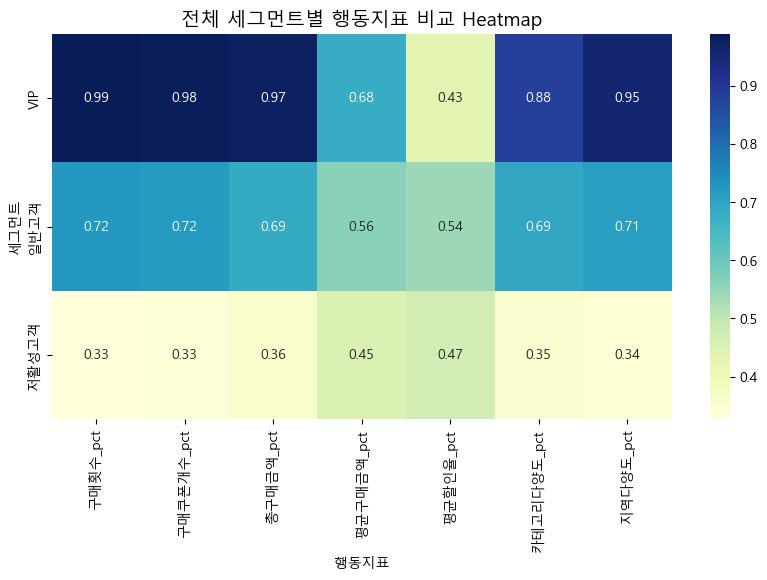

In [195]:
plt.figure(figsize=(10,5))
sns.heatmap(all_pivot, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("전체 세그먼트별 행동지표 비교 Heatmap", fontsize=14)
plt.xlabel("행동지표")
plt.ylabel("세그먼트")
plt.show()

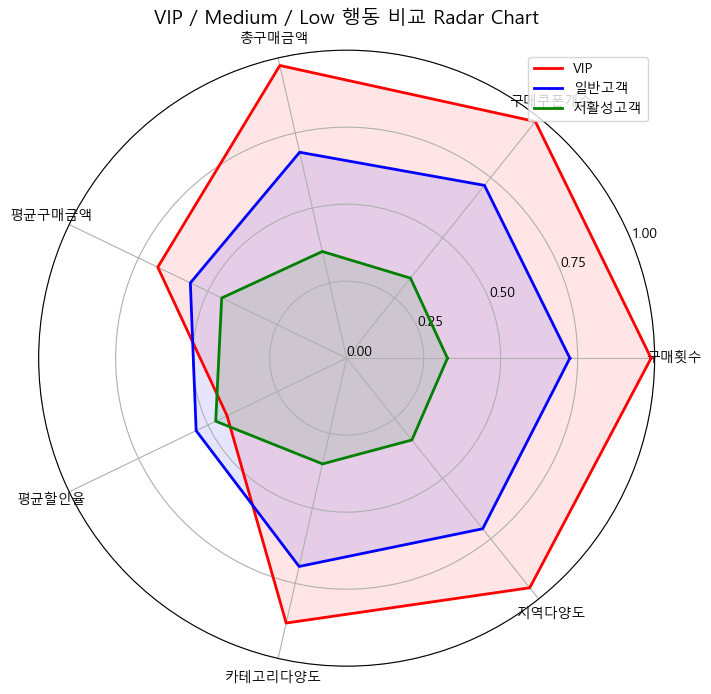

In [196]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

# 값
angles = np.linspace(0, 2*np.pi, len(cols_all), endpoint=False).tolist()
angles += angles[:1]

# 범위 고정
ax.set_ylim(0, 1)
ax.set_yticks([0, 0.25, 0.5, 0.75, 1])

for seg, color in zip(["VIP", "일반고객", "저활성고객"], ["red", "blue", "green"]):
    values = all_pivot.loc[seg].values
    values = np.concatenate((values, [values[0]]))

    ax.plot(angles, values, linewidth=2, label=seg, color=color)
    ax.fill(angles, values, alpha=0.1, color=color)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(cols_all, fontsize=10)
plt.legend(loc="upper right")
plt.title("VIP / Medium / Low 행동 비교 Radar Chart", fontsize=14)
plt.show()


## Cohort 분석(Retention)
* Cohort 분석 주의점  
  연속해석 X: 연속 생존율 (이번달 생존인원|저번달 생존인원) 아님  
  각달 개별 해석 O: 기준 그룹대비 각 달별로 다시 돌아온 비율 (100%/40%/30% = 100/40/12 아니고 100/40/30)

## 전체고객의 Cohort(Retention)
* 전체 유저의 최초 구매월을 기준으로 묶은 cohort 분석  
  → “가입일(REG_DATE) 이후 첫 구매월을 기준으로, 그 이후의 재구매 패턴을 본다”

In [197]:
df.sample(3).T

65862   \
ITEM_COUNT                                      1   
I_DATE                        2012-05-01 19:57:49   
I_MONTH                                   2012-05   
SMALL_AREA_NAME                        立川・町田・八王子他   
USER_ID_hash     2c99d142f9e2851a986e9fd4ade85e59   
COUPON_ID_hash   7e1a539f42ed0a6675e3219a465e5d5b   
PURCHASEID_hash  0f134384c3f6d037271d97d80d8019ca   
GENRE_NAME                                     宅配   
PRICE_RATE                                     62   
PURCHASE_PRICE                               1620   
SEX_ID                                          f   
AGE                                            48   

                                           34061   \
ITEM_COUNT                                      1   
I_DATE                        2011-11-10 23:14:39   
I_MONTH                                   2011-11   
SMALL_AREA_NAME                              ミナミ他   
USER_ID_hash     9e3868ace7572f1c30859260272836e1   
COUPON_ID_hash   e56a866487df621415a59241af970ada   
PURCHASEID_hash  d5a4b4acb1df3ee9b7f70f44199a77ed   
GENRE_NAME                                    グルメ   
PRICE_RATE                                     50   
PURCHASE_PRICE                                630   
SEX_ID                                          f   
AGE                                            51   

                                           145188  
ITEM_COUNT                                      2  
I_DATE                        2012-05-19 21:52:41  
I_MONTH                                   2012-05  
SMALL_AREA_NAME                                キタ  
USER_ID_hash     a26c35580e87fc1a19e4924e4105c6a8  
COUPON_ID_hash   bb196090ee1be068fa7b7ba3db850b0e  
PURCHASEID_hash  a13a4d379dfea6d05286fcc20fd5f1be  
GENRE_NAME                                    グルメ  
PRICE_RATE                                     52  
PURCHASE_PRICE                               2200  
SEX_ID                                          f  
AGE                                            38

In [198]:
df_cohort = df.copy()
df_cohort = df_cohort.merge(df_user[['USER_ID_hash', 'REG_DATE']], on='USER_ID_hash', how='left') # 가입일 정보 추가

In [199]:
df_cohort.sample(3).T

13177  \
ITEM_COUNT                                      1   
I_DATE                        2011-12-02 00:44:22   
I_MONTH                                   2011-12   
SMALL_AREA_NAME                                福岡   
USER_ID_hash     eee7ebd7ffd4285ffb29911c01e23604   
COUPON_ID_hash   5f660d68986313c6bd05fb7a67bd8fa8   
PURCHASEID_hash  e38e06356fd3c00c97257e0ae4e86cb0   
GENRE_NAME                                 ホテル・旅館   
PRICE_RATE                                     51   
PURCHASE_PRICE                              10770   
SEX_ID                                          m   
AGE                                            64   
REG_DATE                      2011-03-03 22:01:55   

                                            37602  \
ITEM_COUNT                                      2   
I_DATE                        2011-09-01 23:38:24   
I_MONTH                                   2011-09   
SMALL_AREA_NAME                         恵比寿・目黒・品川   
USER_ID_hash     1a1350d2099feeda4f99208e2ed3d913   
COUPON_ID_hash   76a46d957a033782818b19ead189fc1a   
PURCHASEID_hash  3e999473320e2bde88d6930c46e99562   
GENRE_NAME                                   レジャー   
PRICE_RATE                                     50   
PURCHASE_PRICE                               1200   
SEX_ID                                          f   
AGE                                            42   
REG_DATE                      2011-06-20 10:31:14   

                                            5921   
ITEM_COUNT                                      1  
I_DATE                        2011-10-26 08:44:49  
I_MONTH                                   2011-10  
SMALL_AREA_NAME                         池袋・神楽坂・赤羽  
USER_ID_hash     71886b09867e76c99e65d992afe01c37  
COUPON_ID_hash   81a7da1e08017c7dddd7db72f6262194  
PURCHASEID_hash  56114a48fa23b33ab726451dda6e17be  
GENRE_NAME                                     宅配  
PRICE_RATE                                     50  
PURCHASE_PRICE                               1380  
SEX_ID                                          f  
AGE                                            46  
REG_DATE                      2010-11-12 19:00:52

In [200]:
# 코호트 기준월(가입월) 추가
df_cohort['cohort_month'] = df_cohort['REG_DATE'].dt.to_period('M')

In [201]:
# 주문발생 연/월 설정 (기존 I_MONTH를 이용)
df_cohort = df_cohort.rename(columns={'I_MONTH':'order_month'})

In [202]:
# period 타입 → 숫자 차이(개월) 계산
def cohort_period_to_index(row):
    cohort = row['cohort_month']
    order  = row['order_month']
    return (order.year - cohort.year) * 12 + (order.month - cohort.month)

df_cohort['cohort_index'] = df_cohort.apply(cohort_period_to_index, axis=1)

In [203]:
# 1) 코호트월 × 경과개월별 active user 수
all_retention_data = (
    df_cohort
    .groupby(['cohort_month', 'cohort_index'])['USER_ID_hash']
    .nunique()
    .reset_index(name='active_users')
)

# 2) 각 코호트의 초기 유저 수 (0개월차 기준)
all_retention_sizes = (
    all_retention_data[all_retention_data['cohort_index'] == 0]
    [['cohort_month', 'active_users']]
    .rename(columns={'active_users': 'cohort_size'})
)

# 3) Merge 리텐션 계산
all_retention_data = all_retention_data.merge(all_retention_sizes, on='cohort_month')
all_retention_data['retention'] = all_retention_data['active_users'] / all_retention_data['cohort_size']

# 4) 히트맵용 피벗 (행: 코호트월, 열: 경과개월)
all_retention_pivot = all_retention_data.pivot(
    index='cohort_month',
    columns='cohort_index',
    values='retention'
)

# 보기 좋게 index를 문자열로 바꾸고 싶으면 (선택)
all_retention_pivot.index = all_retention_pivot.index.astype(str)

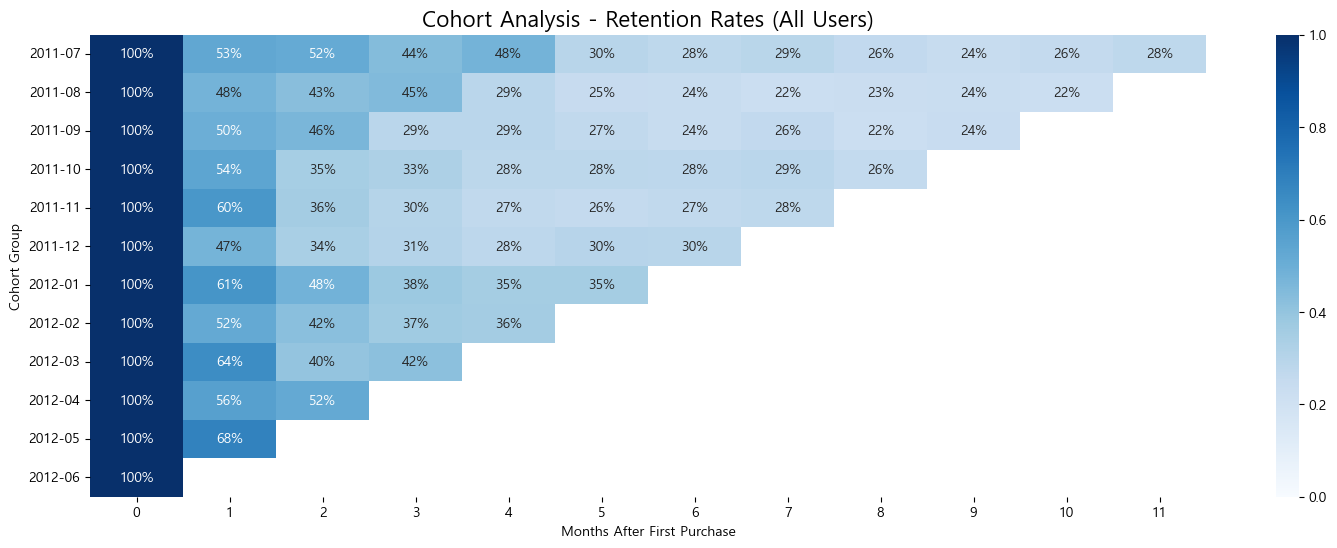

In [204]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 6))
sns.heatmap(
    all_retention_pivot,
    annot=True,          # 각 칸에 숫자 표시
    fmt='.0%',           # 0.12 → '12%'
    cmap='Blues',        # 색상
    vmin=0, vmax=1       # 0~1 스케일 고정
)

plt.title('Cohort Analysis - Retention Rates (All Users)', fontsize=16)
plt.ylabel('Cohort Group')
plt.xlabel('Months After First Purchase')
plt.yticks(rotation=0)
plt.show()

### 전체고객 Cohort 신뢰도 확인
* 리텐션의 신뢰구간 폭 계산  
  리텐션은 “성공/실패” 비율이라 이항분포로 간주  
  표본 비율 𝑝^=𝑘/𝑛  
  표준오차(SE) ≈ squr{𝑝^(1−𝑝^)/𝑛}  
  95% 신뢰구간 = 𝑝^±1.96×𝑆𝐸
* 신뢰구간 해석: ‘이 정도 범위 안에서 실제값이 있을 가능성이 높다’는 근거 있는 가이드라인
* |표본 크기 (n)|조사 시점|오차범위 (약)|
  |---|---|---|
  |≈ 1,500~1,800명 | 2011-07~08                   | ±2%p       |
  |≈ 900~1,300명   | 2011-09, 2011-12, 2012-01~03 | ±2.5~3.3%p |
  |≈ 700~800명     | 2011-10~11, 2012-04          | ±3~3.7%p   |
  |≈ 500~600명     | 2012-05                      | ±3.8%p     |
  |≈ 400명         | 2012-06                      | ±4.8%p     |

In [205]:
# 기준월별 표본이 충분한지 확인 (표본이 적으면 조금만 변해도 출렁임)
cohort_users = (
    df_cohort.groupby('cohort_month')['USER_ID_hash']
      .nunique()
      .rename('cohort_size')
)

print(cohort_users.sort_index())

cohort_month
2010-07      27
2010-08      47
2010-09     318
2010-10     354
2010-11    2647
2010-12     795
2011-01     434
2011-02    1354
2011-03     698
2011-04     852
2011-05    2558
2011-06    1124
2011-07    1509
2011-08    1862
2011-09     896
2011-10     698
2011-11     797
2011-12    1259
2012-01     835
2012-02    1007
2012-03     956
2012-04     776
2012-05     566
2012-06     413
Freq: M, Name: cohort_size, dtype: int64


## VIP의 Cohort(Retention)
* 기준시점(2012-06) VIP인 유저들을 최초 구매월을 기준으로 묶은 cohort 분석  
  → “가입일(REG_DATE) 이후 첫 구매월을 기준으로, 그 이후의 재구매 패턴을 본다”

In [206]:
df_cohort_vip = df_cohort[
    df_cohort['USER_ID_hash'].isin(vip_purchase['USER_ID_hash'])
]

df_cohort_vip.sample(3).T

148317  \
ITEM_COUNT                                      2   
I_DATE                        2012-06-06 18:51:20   
order_month                               2012-06   
SMALL_AREA_NAME                    新宿・高田馬場・中野・吉祥寺   
USER_ID_hash     f48b6fbc9ca4ef09a98a5b760254db93   
COUPON_ID_hash   3c310f7531bb76be42171bfad14fcd57   
PURCHASEID_hash  5810afe0411399cf64aab22cfbb85f77   
GENRE_NAME                                    グルメ   
PRICE_RATE                                     62   
PURCHASE_PRICE                               3354   
SEX_ID                                          m   
AGE                                            26   
REG_DATE                      2011-02-12 23:40:27   
cohort_month                              2011-02   
cohort_index                                   16   

                                           80267   \
ITEM_COUNT                                      1   
I_DATE                        2011-08-18 09:11:05   
order_month                               2011-08   
SMALL_AREA_NAME                                横浜   
USER_ID_hash     3e9181d60b09202195e00b4022f3dfbf   
COUPON_ID_hash   48286a242bd3584ae906072f959f11e6   
PURCHASEID_hash  573dca6560e5c2556b028c3f35c262af   
GENRE_NAME                                    グルメ   
PRICE_RATE                                     56   
PURCHASE_PRICE                               1311   
SEX_ID                                          m   
AGE                                            68   
REG_DATE                      2011-07-25 12:17:57   
cohort_month                              2011-07   
cohort_index                                    1   

                                           40571   
ITEM_COUNT                                      3  
I_DATE                        2012-04-15 08:14:58  
order_month                               2012-04  
SMALL_AREA_NAME                                長崎  
USER_ID_hash     6fc958f36c7e1ed5a13cc70cbb01f66a  
COUPON_ID_hash   1b3ffbb6e1d1efe3aae52d0fddbdba8d  
PURCHASEID_hash  fe4e63b1d4600c699a0095ec43ae6af1  
GENRE_NAME                                     宅配  
PRICE_RATE                                     50  
PURCHASE_PRICE                               1575  
SEX_ID                                          f  
AGE                                            36  
REG_DATE                      2011-01-27 16:58:36  
cohort_month                              2011-01  
cohort_index                                   15

In [207]:
df_cohort_vip.shape[0], df_cohort_vip['PURCHASEID_hash'].nunique()

(18144, 18144)

In [208]:
df_cohort_vip['USER_ID_hash'].nunique(), vip_purchase['USER_ID_hash'].nunique()

(352, 352)

In [209]:
# 1) 코호트월 × 경과개월별 active user 수
vip_retention_data = (
    df_cohort_vip
    .groupby(['cohort_month', 'cohort_index'])['USER_ID_hash']
    .nunique()
    .reset_index(name='active_users')
)
# 이때 가입일자인 cohort 기준 month는 첫 주문날짜와 동일하거나 그 이후인 경우만 고려
# 아니면 2010-07 가입자를 2011-07 이후의 결제부터만 고려하게 됨. 공백이 발생
vip_retention_data = vip_retention_data[
    vip_retention_data['cohort_month'] >= df_cohort_vip['order_month'].min()
]

# 2) 각 코호트의 초기 유저 수 (0개월차 기준)
vip_retention_sizes = (
    df_cohort_vip.groupby('cohort_month')['USER_ID_hash'] # cohort_month인 가입일 기준으로 초기유저 설정
    .nunique()
    .reset_index(name='cohort_size')
)

# 3) Merge 리텐션 계산
vip_retention_data = vip_retention_data.merge(vip_retention_sizes, on='cohort_month')
vip_retention_data['retention'] = vip_retention_data['active_users'] / vip_retention_data['cohort_size']

# 4) 히트맵용 피벗 (행: 코호트월, 열: 경과개월)
vip_retention_pivot = vip_retention_data.pivot(
    index='cohort_month',
    columns='cohort_index',
    values='retention'
)

# 보기 좋게 index를 문자열로 바꾸고 싶으면 (선택)
vip_retention_pivot.index = vip_retention_pivot.index.astype(str)

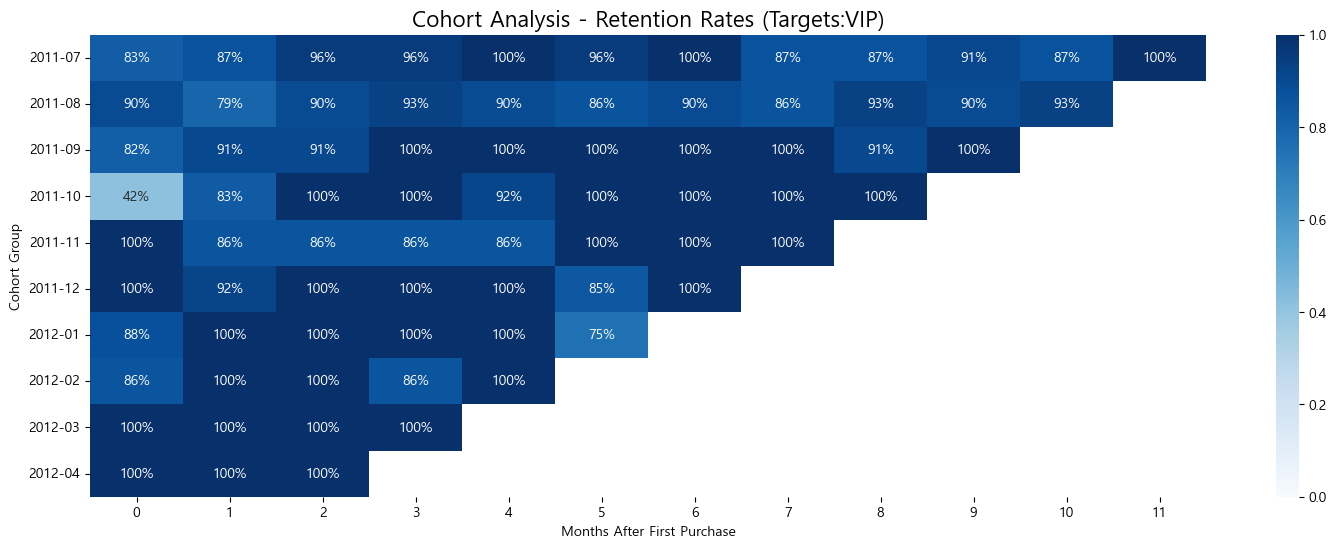

In [210]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 6))
sns.heatmap(
    vip_retention_pivot,
    annot=True,          # 각 칸에 숫자 표시
    fmt='.0%',           # 0.12 → '12%'
    cmap='Blues',        # 색상
    vmin=0, vmax=1       # 0~1 스케일 고정
)

plt.title('Cohort Analysis - Retention Rates (Targets:VIP)', fontsize=16)
plt.ylabel('Cohort Group')
plt.xlabel('Months After First Purchase')
plt.yticks(rotation=0)
plt.show()

### VIP Cohort 신뢰도 확인
* 색깔이 거의 다 진파랑(80\~100%)이지만,  
  샘플이 워낙 작아서 코호트 간 5\~10%p 정도 차이는 충분히 노이즈일 수 있고,  
  20%p 이상 차이가 꾸준히 반복될 때만 “진짜 차이”로 보는 게 안전하다
* |표본 크기 (n)|조사 시점|오차범위 (약)|
  |---|---|---|
  |≈ 20~30명 | 2011-07~08 | ±10~15%p |
  |≈ 10~15명 | 2011-09~12 | ±15~25%p |
  |≤ 8명     | 2012-01~04 | ±2-~30%p |

In [211]:
# 기준월별 표본이 충분한지 확인 (표본이 적으면 조금만 변해도 출렁임)
cohort_users_vip = (
    df_cohort_vip.groupby('cohort_month')['USER_ID_hash']
      .nunique()
      .rename('cohort_size')
)

print(cohort_users_vip.sort_index())

cohort_month
2010-08     1
2010-09     9
2010-10     8
2010-11    57
2010-12    17
2011-01    12
2011-02    36
2011-03    20
2011-04    17
2011-05    29
2011-06    26
2011-07    23
2011-08    29
2011-09    11
2011-10    12
2011-11     7
2011-12    13
2012-01     8
2012-02     7
2012-03     6
2012-04     4
Freq: M, Name: cohort_size, dtype: int64


## 일반고객의 Cohort(Retention)
* 기준시점(2012-06) 일반고객인 유저들을 최초 구매월을 기준으로 묶은 cohort 분석  
  → “가입일(REG_DATE) 이후 첫 구매월을 기준으로, 그 이후의 재구매 패턴을 본다”

In [212]:
df_cohort.sample(3).T

21365   \
ITEM_COUNT                                      1   
I_DATE                        2012-06-18 13:07:35   
order_month                               2012-06   
SMALL_AREA_NAME                                三重   
USER_ID_hash     611d227e667a8b3c95647ba83c9098f7   
COUPON_ID_hash   f92675274d817d07ce2768eefb9eb52e   
PURCHASEID_hash  082452be29a151de08fec79c1ffed28f   
GENRE_NAME                                     宅配   
PRICE_RATE                                     61   
PURCHASE_PRICE                               5200   
SEX_ID                                          m   
AGE                                            55   
REG_DATE                      2012-04-15 21:40:14   
cohort_month                              2012-04   
cohort_index                                    2   

                                           3430    \
ITEM_COUNT                                      1   
I_DATE                        2011-11-28 17:12:47   
order_month                               2011-11   
SMALL_AREA_NAME                    新宿・高田馬場・中野・吉祥寺   
USER_ID_hash     f36c1446e9305169f625b4bded22f1e0   
COUPON_ID_hash   a262c7ff56a5cd3de3c5c40443f3018c   
PURCHASEID_hash  f2877488e29731b6c18433bb657952c7   
GENRE_NAME                               その他のクーポン   
PRICE_RATE                                     80   
PURCHASE_PRICE                                400   
SEX_ID                                          m   
AGE                                            31   
REG_DATE                      2011-11-28 17:11:45   
cohort_month                              2011-11   
cohort_index                                    0   

                                           100258  
ITEM_COUNT                                      6  
I_DATE                        2012-02-18 14:04:45  
order_month                               2012-02  
SMALL_AREA_NAME                                千葉  
USER_ID_hash     2fe3c18fa6d5961740622d9131da4b2f  
COUPON_ID_hash   1a5490efbe803687867f44f649c63a05  
PURCHASEID_hash  69cf7d64d21470a6d3ccd21acab7c48c  
GENRE_NAME                                     宅配  
PRICE_RATE                                     67  
PURCHASE_PRICE                               2000  
SEX_ID                                          f  
AGE                                            45  
REG_DATE                      2011-11-12 11:48:27  
cohort_month                              2011-11  
cohort_index                                    3

In [213]:
df_cohort_medium = df_cohort[
    df_cohort['USER_ID_hash'].isin(medium_purchase['USER_ID_hash'])
]

df_cohort_medium.sample(3).T

109599  \
ITEM_COUNT                                      1   
I_DATE                        2011-09-27 02:15:06   
order_month                               2011-09   
SMALL_AREA_NAME                                福岡   
USER_ID_hash     6060e52e3177c4b4d933ddd85ed057f1   
COUPON_ID_hash   ad9f8a79ec0cb793900cc7963b46f70c   
PURCHASEID_hash  72b8052db8aef762809fdfa0150ee8ad   
GENRE_NAME                               その他のクーポン   
PRICE_RATE                                     30   
PURCHASE_PRICE                               3225   
SEX_ID                                          f   
AGE                                            41   
REG_DATE                      2011-01-17 17:02:14   
cohort_month                              2011-01   
cohort_index                                    8   

                                           122651  \
ITEM_COUNT                                      1   
I_DATE                        2012-04-15 19:06:51   
order_month                               2012-04   
SMALL_AREA_NAME                                奈良   
USER_ID_hash     ca686c75cda97310fe077189d86d5a66   
COUPON_ID_hash   c9cfc5beeedf4d49a8a42b283c840b4e   
PURCHASEID_hash  7dbf72818eb498db734b1ac8218fbfa5   
GENRE_NAME                                     宅配   
PRICE_RATE                                     87   
PURCHASE_PRICE                              21820   
SEX_ID                                          m   
AGE                                            28   
REG_DATE                      2012-01-12 19:50:46   
cohort_month                              2012-01   
cohort_index                                    3   

                                           136529  
ITEM_COUNT                                      1  
I_DATE                        2011-08-26 12:03:08  
order_month                               2011-08  
SMALL_AREA_NAME                                福岡  
USER_ID_hash     a08942aebfaf3bfb8fa402a280aa13ba  
COUPON_ID_hash   2e43dffe32ab7aacf206068d06d17002  
PURCHASEID_hash  24f81531596a13ac126a0c495298189f  
GENRE_NAME                                 ギフトカード  
PRICE_RATE                                     50  
PURCHASE_PRICE                               2500  
SEX_ID                                          m  
AGE                                            39  
REG_DATE                      2011-05-24 18:54:39  
cohort_month                              2011-05  
cohort_index                                    3

In [214]:
df_cohort_medium.shape[0], df_cohort_medium['PURCHASEID_hash'].nunique()

(118275, 118275)

In [215]:
df_cohort_medium['USER_ID_hash'].nunique(), medium_purchase['USER_ID_hash'].nunique()

(9317, 9317)

In [216]:
# 1) 코호트월 × 경과개월별 active user 수
medium_retention_data = (
    df_cohort_medium
    .groupby(['cohort_month', 'cohort_index'])['USER_ID_hash']
    .nunique()
    .reset_index(name='active_users')
)
# 이때 가입일자인 cohort 기준 month는 첫 주문날짜와 동일하거나 그 이후인 경우만 고려
# 아니면 2010-07 가입자를 2011-07 이후의 결제부터만 고려하게 됨. 공백이 발생
medium_retention_data = medium_retention_data[
    medium_retention_data['cohort_month'] >= df_cohort_medium['order_month'].min()
]

# 2) 각 코호트의 초기 유저 수 (0개월차 기준)
medium_retention_sizes = (
    df_cohort_medium.groupby('cohort_month')['USER_ID_hash'] # cohort_month인 가입일 기준으로 초기유저 설정
    .nunique()
    .reset_index(name='cohort_size')
)

# 3) Merge 리텐션 계산
medium_retention_data = medium_retention_data.merge(medium_retention_sizes, on='cohort_month')
medium_retention_data['retention'] = medium_retention_data['active_users'] / medium_retention_data['cohort_size']

# 4) 히트맵용 피벗 (행: 코호트월, 열: 경과개월)
medium_retention_pivot = medium_retention_data.pivot(
    index='cohort_month',
    columns='cohort_index',
    values='retention'
)

# 보기 좋게 index를 문자열로 바꾸고 싶으면 (선택)
medium_retention_pivot.index = medium_retention_pivot.index.astype(str)

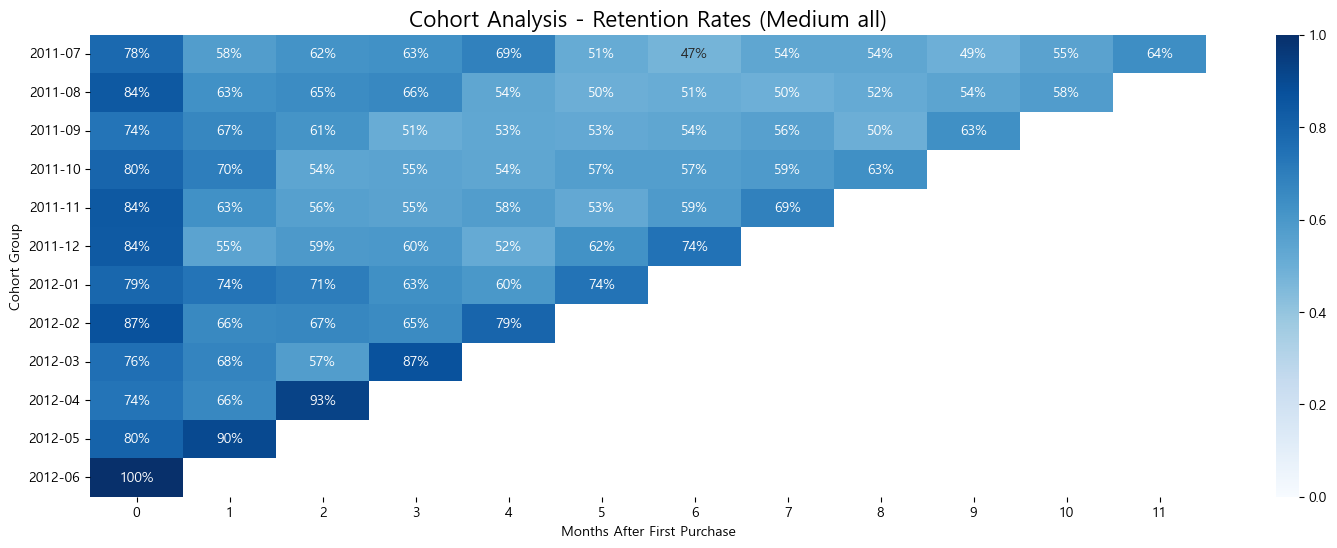

In [217]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 6))
sns.heatmap(
    medium_retention_pivot,
    annot=True,          # 각 칸에 숫자 표시
    fmt='.0%',           # 0.12 → '12%'
    cmap='Blues',        # 색상
    vmin=0, vmax=1       # 0~1 스케일 고정
)

plt.title('Cohort Analysis - Retention Rates (Medium all)', fontsize=16)
plt.ylabel('Cohort Group')
plt.xlabel('Months After First Purchase')
plt.yticks(rotation=0)
plt.show()

### 일반고객 Cohort 신뢰도 확인
* 코호트 간 2~3%p 차이는 샘플 변동(노이즈)일 수 있고  
  5%p 이상 차이가 일관되게 나올 때 “실제 차이일 가능성이 높다.
* |표본 크기 (n)|조사 시점|오차범위 (약)|
  |---|---|---|
  |≈ 400~600명 | Most of cohort      | ±3~5%p |
  |≈ 200~300명 | 2011-09~11, 2012-01 | ±5~6%p |

In [218]:
# 기준월별 표본이 충분한지 확인 (표본이 적으면 조금만 변해도 출렁임)
cohort_users_medium = (
    df_cohort_medium.groupby('cohort_month')['USER_ID_hash']
      .nunique()
      .rename('cohort_size')
)

print(cohort_users_medium.sort_index())

cohort_month
2010-07      14
2010-08      30
2010-09     158
2010-10     187
2010-11    1325
2010-12     364
2011-01     214
2011-02     625
2011-03     320
2011-04     389
2011-05     937
2011-06     428
2011-07     455
2011-08     569
2011-09     251
2011-10     220
2011-11     266
2011-12     387
2012-01     313
2012-02     384
2012-03     341
2012-04     354
2012-05     373
2012-06     413
Freq: M, Name: cohort_size, dtype: int64


## 타겟고객(일반고객 50/60+)의 Cohort(Retention)
* 기준시점(2012-06) 타깃고객(일반고객 50/60+)인 유저들을 최초 구매월을 기준으로 묶은 cohort 분석  
  → “가입일(REG_DATE) 이후 첫 구매월을 기준으로, 그 이후의 재구매 패턴을 본다”

In [219]:
medium_purchase_above_50 = medium_purchase[
    medium_purchase['AGE_GROUP'].isin(['50대', '60대+'])
]
df_cohort_medium_above_50 = df_cohort[
    df_cohort['USER_ID_hash'].isin(medium_purchase_above_50['USER_ID_hash'])
]

df_cohort_medium_above_50.sample(3).T

48316  \
ITEM_COUNT                                      1   
I_DATE                        2011-08-08 17:54:06   
order_month                               2011-08   
SMALL_AREA_NAME                                岐阜   
USER_ID_hash     1b31144371a05cfe7f93bb5d69a1b19a   
COUPON_ID_hash   917f52e96ce74535a0c9a4344cf998f5   
PURCHASEID_hash  c3a93476c38979f8938e86f1548f31c3   
GENRE_NAME                                     宅配   
PRICE_RATE                                     92   
PURCHASE_PRICE                              37010   
SEX_ID                                          m   
AGE                                            52   
REG_DATE                      2011-06-11 16:38:01   
cohort_month                              2011-06   
cohort_index                                    2   

                                            84173  \
ITEM_COUNT                                      1   
I_DATE                        2012-01-11 11:14:59   
order_month                               2012-01   
SMALL_AREA_NAME                       銀座・新橋・東京・上野   
USER_ID_hash     fbff2159d4057188d39807afbdc1c3ce   
COUPON_ID_hash   c679d02ba8fbac9a360c42d0bcd130c2   
PURCHASEID_hash  6652ff327cb86188df4faf21fe15fd96   
GENRE_NAME                                     宅配   
PRICE_RATE                                     73   
PURCHASE_PRICE                               2190   
SEX_ID                                          f   
AGE                                            52   
REG_DATE                      2010-11-14 02:24:38   
cohort_month                              2010-11   
cohort_index                                   14   

                                            96494  
ITEM_COUNT                                      2  
I_DATE                        2012-01-09 09:44:25  
order_month                               2012-01  
SMALL_AREA_NAME                         川崎・湘南・箱根他  
USER_ID_hash     21229a26b787a5fff2f5fbdf7de2022b  
COUPON_ID_hash   26162e4dbcbc00f6b4935a5b6c528037  
PURCHASEID_hash  8b5b9844f55bc0f448f4eaf946eb1ffb  
GENRE_NAME                                   レジャー  
PRICE_RATE                                     50  
PURCHASE_PRICE                               1200  
SEX_ID                                          m  
AGE                                            58  
REG_DATE                      2010-11-18 23:28:47  
cohort_month                              2010-11  
cohort_index                                   14

In [220]:
df_cohort_medium_above_50['USER_ID_hash'].nunique(), medium_purchase_above_50['USER_ID_hash'].nunique()

(2992, 2992)

In [221]:
# 1) 코호트월 × 경과개월별 active user 수
target_retention_data = (
    df_cohort_medium_above_50
    .groupby(['cohort_month', 'cohort_index'])['USER_ID_hash']
    .nunique()
    .reset_index(name='active_users')
)
# 이때 가입일자인 cohort 기준 month는 첫 주문날짜와 동일하거나 그 이후인 경우만 고려
# 아니면 2010-07 가입자를 2011-07 이후의 결제부터만 고려하게 됨. 공백이 발생
target_retention_data = target_retention_data[
    target_retention_data['cohort_month'] >= df_cohort_medium_above_50['order_month'].min()
]

# 2) 각 코호트의 초기 유저 수 (0개월차 기준)
target_retention_sizes = (
    df_cohort_medium_above_50.groupby('cohort_month')['USER_ID_hash'] # cohort_month인 가입일 기준으로 초기유저 설정
    .nunique()
    .reset_index(name='cohort_size')
)

# 3) Merge 리텐션 계산
target_retention_data = target_retention_data.merge(target_retention_sizes, on='cohort_month')
target_retention_data['retention'] = target_retention_data['active_users'] / target_retention_data['cohort_size']

# 4) 히트맵용 피벗 (행: 코호트월, 열: 경과개월)
target_retention_pivot = target_retention_data.pivot(
    index='cohort_month',
    columns='cohort_index',
    values='retention'
)

# 보기 좋게 index를 문자열로 바꾸고 싶으면 (선택)
target_retention_pivot.index = target_retention_pivot.index.astype(str)

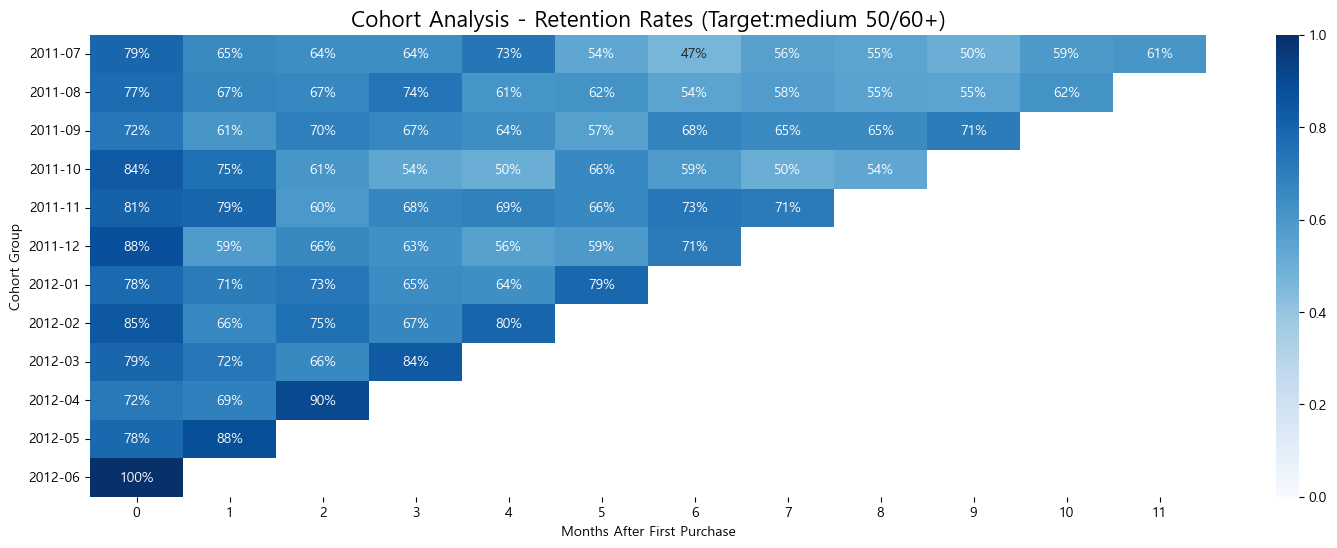

In [222]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 6))
sns.heatmap(
    target_retention_pivot,
    annot=True,          # 각 칸에 숫자 표시
    fmt='.0%',           # 0.12 → '12%'
    cmap='Blues',        # 색상
    vmin=0, vmax=1       # 0~1 스케일 고정
)

plt.title('Cohort Analysis - Retention Rates (Target:medium 50/60+)', fontsize=16)
plt.ylabel('Cohort Group')
plt.xlabel('Months After First Purchase')
plt.yticks(rotation=0)
plt.show()

### 타깃고객(일반 50/60+) Cohort 신뢰도 확인
* 코호트 간 3~5%p 차이는 충분히 노이즈일 수 있고,  
  10%p 안팎 이상의 차이가 여러 기간에서 반복될 때 진짜 행동 차이일 가능성이 높다
* |표본 크기 (n)|조사 시점|오차범위 (약)|
  |---|---|---|
  |≈ 130~190명 | 2011-07\~08, 11\~12, 2012-02\~04  | ±6~9%p  |
  |≈ 100명 전후 | 2012-01, 05~06                    | ±4%p    |
  |≈ 50~80명   | 2011-09~11                        | ±9~12%p |

In [223]:
# 기준월별 표본이 충분한지 확인 (표본이 적으면 조금만 변해도 출렁임)
cohort_users_medium_above_50 = (
    df_cohort_medium_above_50.groupby('cohort_month')['USER_ID_hash']
      .nunique()
      .rename('cohort_size')
)

print(cohort_users_medium_above_50.sort_index())

cohort_month
2010-07      4
2010-08     11
2010-09     38
2010-10     52
2010-11    376
2010-12    104
2011-01     75
2011-02    286
2011-03    118
2011-04    153
2011-05    305
2011-06    159
2011-07    130
2011-08    186
2011-09     69
2011-10     56
2011-11     77
2011-12    140
2012-01     99
2012-02    137
2012-03    105
2012-04    114
2012-05    101
2012-06     97
Freq: M, Name: cohort_size, dtype: int64
